# 測試資料 


## boston-側連續數值演算法


In [394]:
from sklearn import datasets
from sklearn.cross_validation import train_test_split
boston=datasets.load_boston()
X=boston.data
Y=boston.target
#將資料分成訓練、測試集 其中測試集佔三成
XX_train, XX_test, YY_train, YY_test =train_test_split(X,Y,test_size=0.3,random_state=1)

## iris-測分類演算法用

In [395]:
iris = datasets.load_iris()
xx=iris.data
typeY=iris.target
from sklearn.cross_validation import train_test_split
#將資料分成訓練、測試集 其中測試集佔三成
xx_train, xx_test, Y_train, Y_test =train_test_split(xx,typeY,test_size=0.3,random_state=1)

# 載入資料

In [396]:
import pymongo
client=pymongo.MongoClient('192.168.1.113',27017,username="j122085",password="850605")
db=client.rawData
print(db.collection_names())
collection=db.wowprimediendata
wowDatas=list(collection.find({"ADGC_weekday":{"$gte":0},"avgDailyNet":{"$gte":0},"costPower_Analyze":{"$gte":0}}))

['Watsons', 'busData', 'HRdata104', 'wowprimediendata', 'info591', 'departmentStore', 'websites591', 'taiwanInfo', 'smallStyleCount', 'addressCoordinate', 'Nhuman', 'ipeenWebsite', 'bigStyleCount', 'ipeenInfo', 'conStore', 'CostPower']


In [397]:
wowDatas=[i for i in wowDatas if i['NcostData_Analyze']>5]

In [399]:
import numpy as np
import pandas as pd
df=pd.DataFrame(wowDatas)
df.salary = df.avgDailyCustomer.astype(float)                   #traform into float type
df.working = df.avgDailyNet.astype(float)                 #traform into float type
X = df[['costPower_Analyze','Nhuman_Analyze',"NsimCostDien",'NbusStation_Analyze','NconStore_Analyze','Nstar_Analyze', 'Nmc_Analyze', 'Nken_Analyze','Nwa_Analyze','Nwatson_Analyze']].values                   #tranform DataFrame to ndarray Matrix  為了predict輸入的方式
# xx=X
#將每個欄位的數值都變成0-1(除以最大的數做正規化、並只留下該數值List) 
# x=[]
# for i in range(len(X.T)):
#     x.append(X.T[i]/max(X.T[i]))

#用zscore正規化
x=[]
def zscore(x, axis = None):
    x=np.array(x)
    xmean = x.mean(axis=axis, keepdims=True)
    xstd  = np.std(x, axis=axis, keepdims=True)
    zscore = (x-xmean)/xstd
    return zscore    

for i in range(len(X.T)):
    x.append(zscore(X.T[i]))

x=np.array(x)
xx=x.T

Y=df['ADGC_weekday'].values


#分類
Calls=set(i["Called"] for i in wowDatas)
for Call in Calls:
    mean=np.mean([i["ADGC_weekday"] for i in wowDatas if i["Called"]==Call and 'ADGC_weekday' in i])
    if not np.isnan(mean):
        for j in wowDatas:
            if j["Called"]==Call and 'ADGC_weekday' in j:
                if j["ADGC_weekday"]>mean*1.15:
                    j['type']=0#"good"
                elif j["ADGC_weekday"]<mean*0.85:
                    j['type']=2#"bad"
                else:
                    j['type']=1#"normal"
            if 'avgDailyCustomer' in j:
                aC=j["avgDailyNet"]/j["avgDailyCustomer"]
                if aC<290:
                    j['typeP']="低"
                elif aC<450:
                    j['typeP']="中"
                elif aC<800:
                    j['typeP']="中高"
                else:
                    j['typeP']="高"
                    
typeY= np.array([i['type'] for i in wowDatas if 'NbusStation_Analyze' in i and 'ADGC_weekday' in i and 'costPower_Analyze' in i
            ])

# xx為zscore正規化資料 
# X為原始資料

#### 都為262筆8維度

# Y為平均來客數>>(訓練預測數值)
# typeY為店家來客數表現>>(訓練預測類型)

In [400]:
xx.shape,X.shape

((250, 10), (250, 10))

In [401]:
Y.shape,Y

((250,),
 array([ 92, 101, 112, 133, 139,  89, 115, 103, 128,  75,  61, 102,  88,
         83, 112, 125,  63,  65, 117,  86, 100,  91,  63, 115,  63,  79,
         76, 114,  61,  80,  70,  87, 142, 235, 260, 117,  91, 157,  76,
         89, 110, 100, 176, 190, 105, 114, 123, 105, 127,  99, 122,  84,
         87,  82,  79,  73, 127, 114,  89,  81,  69, 141, 133,  93, 232,
        184, 104, 242, 156, 117, 110, 102,  96, 154, 167, 144, 199, 268,
        181, 201, 132, 214, 235, 114, 259, 191, 217, 171, 195, 261, 151,
        189, 195, 173, 179, 167, 187, 215, 149, 129, 148, 175, 127, 154,
        123, 114, 179, 179, 185, 147, 205, 121, 141, 160, 156, 117, 132,
        119, 108, 164, 179, 146, 118, 110, 147, 104, 132, 130, 147, 137,
         94, 165, 117,  93, 122, 174, 158, 129,  99,  89, 286, 133,  99,
        144, 123, 111, 128, 106, 122, 126, 177, 120, 103, 138, 145, 126,
        114, 117,  92, 114, 166, 162, 179, 145, 196, 219, 161, 186, 250,
        268, 220, 279, 265, 203, 229, 294,

In [402]:
typeY.shape,typeY

((250,),
 array([1, 1, 1, 0, 0, 1, 1, 1, 0, 2, 2, 1, 1, 2, 1, 0, 2, 2, 0, 1, 0, 1,
        2, 0, 2, 1, 1, 0, 2, 1, 2, 1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 0, 0,
        2, 2, 1, 2, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0, 1, 1, 2, 1, 1, 2, 0, 0,
        2, 0, 1, 2, 2, 2, 2, 1, 1, 2, 1, 0, 1, 1, 2, 0, 0, 2, 0, 1, 0, 1,
        1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2,
        1, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 0,
        1, 2, 1, 0, 0, 1, 2, 2, 0, 1, 2, 0, 1, 1, 1, 2, 1, 1, 0, 1, 2, 1,
        0, 1, 1, 1, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1,
        2, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2, 2, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
        0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 2, 1, 1, 2, 0, 1, 0, 0, 1, 2, 0,
        2, 1, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 2, 0, 2, 0, 1, 1,
        2, 1, 1, 2, 0, 1, 1, 1]))

# 表現好的店家資料(GoodData)
#### newDataXG為原始資料 newDataxxG為正規化後的資料

In [403]:
bestData="""74	247984	9	89	8	6	1	2
52	137707	10	78	0	2	0	0
76	355419	10	287	31	15	5	1
54	382333	16	203	9	4	2	3
54	286210	14	136	0	2	2	0
77	238522	10	96	8	7	1	2
57	229368	28	122	2	4	4	0
52	99568	0	45	3	5	2	0
56	365344	8	184	9	6	3	3
63	282141	22	187	16	15	2	1"""

newDataXG=np.array([[int(j)for j in i.split("\t")] for i in bestData.split('\n')])

newDataxxG=[]
for i in range(len(newDataXG.T)):
    newDataxxG.append(zscore(newDataXG.T[i]))
newDataxxG=np.array(newDataxxG).T

YG=np.array([int(s) for s in """389
393
394
397
399
414
424
430
460
512""".split("\n")])

# 表現差的店家資料(BadData)
#### newDataXB為原始資料 newDataxxB為正規化後的資料



In [404]:
badData="""56	178949	12	125	5	8	5	3
70	353804	11	252	33	14	4	2
64	233683	13	154	11	7	3	1
67	373797	11	229	34	16	2	3
60	185182	42	134	4	7	4	1
52	102316	0	49	3	5	2	0
51	106274	7	39	1	2	2	0
65	342102	20	171	13	12	3	2
52	292044	8	124	8	6	1	0
58	185640	39	132	4	6	3	1"""


newDataXB=np.array([[int(j)for j in i.split("\t")] for i in badData.split('\n')])

newDataxxB=[]
for i in range(len(newDataXB.T)):
    newDataxxB.append(zscore(newDataXB.T[i]))
newDataxxB=np.array(newDataxxB).T
YB=np.array([int(s) for s in """81
87
93
95
96
97
98
98
101
104""".split("\n")])

# ====================預測數值====================

In [405]:
XX_train, XX_test, YY_train, YY_test =train_test_split(X,Y,test_size=0.3,random_state=1)

In [406]:
#畫圖用
import matplotlib.pyplot as plt
def plotPaint(predict,Y,R=0,title=""):
    plt.scatter(predict,Y,s=2)
    if R==1:
        plt.plot(predict, predict, 'ro')
#         plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=2)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Measured')
    plt.show()

# 引入sklearn模型

# 試跑LinearRegression

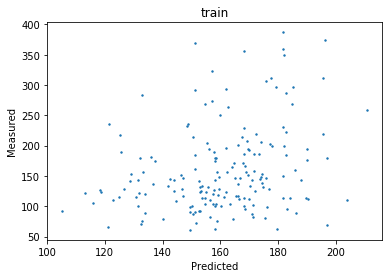

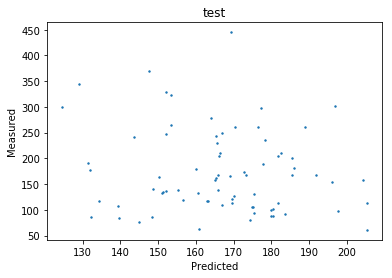

In [407]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(XX_train, YY_train)
# features="消費力	人口數	公車站數	四大超商數	星巴克數	麥當勞數	肯德基數	瓦城數".split("\t")

# print("參數")
# for i,j in zip(features,lm.coef_):
#     print(i,j)

    
    
predict=lm.predict(XX_train)
plotPaint(predict,YY_train,title="train")
predict=lm.predict(XX_test)
plotPaint(predict,YY_test,title="test")

In [408]:
# predicted_sales = lm.predict(newDataXG)
# print("好店家預測")
# print(predicted_sales)

# predicted_sales = lm.predict(newDataXB)
# print("差店家預測")
# print(predicted_sales)

# 試跑SVR

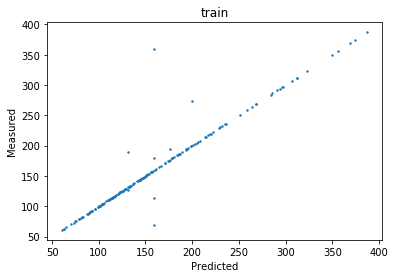

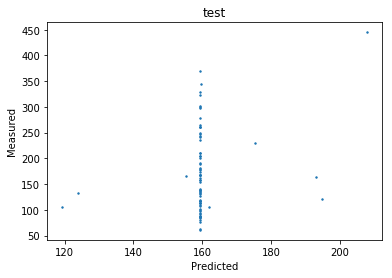

In [409]:

from sklearn import datasets
from sklearn.svm import SVR
import matplotlib.pyplot as plt
clf = SVR(kernel='rbf', C=1e3, gamma=0.1)
clf.fit(XX_train, YY_train)
# predicted_sales = clf.predict(newDataXG)
# print("好店家預測")
# print(predicted_sales)

# predicted_sales = clf.predict(newDataXB)
# print("差店家預測")
# print(predicted_sales)

predict=clf.predict(XX_train)
plotPaint(predict,YY_train,title="train")
predict=clf.predict(XX_test)
plotPaint(predict,YY_test,title="test")

In [410]:
# predict=clf.predict(newDataXB)
# plotPaint(predict,YB,R=1)

In [411]:
# predict=clf.predict(newDataXG)
# plotPaint(predict,YG,R=1)

In [412]:
# TryData="""63	333451	13	148	10	8	2	2
# 62	205551	12	127	2	5	3	1
# 58	174562	26	128	4	6	3	1
# 72	137555	12	100	4	9	1	1
# 79	223146	12	128	11	12	2	2
# 63	282141	22	187	16	15	2	1
# 52	157180	4	83	5	4	2	1
# 71	128373	8	52	1	3	3	0"""

# #"消費力	人口數	公車站數	四大超商數	星巴克數	麥當勞數	肯德基數	瓦城數"
# newDataXTry=np.array([[int(j) for j in i.split("\t")] for i in TryData.split('\n')])


# newDataxxTry=[]
# for i in range(len(newDataXTry.T)):
#     newDataxxTry.append(zscore(newDataXTry.T[i]))
# newDataxxTry=np.array(newDataxxTry).T


# clf.predict(newDataXTry)


# 引入keras模型

In [413]:
# from keras.datasets import mnist
from keras.models import Sequential # 序慣模型(可一層一層加入)
from keras.layers.core import Dense,Activation # 緊密層、啟動函數
from keras.layers import Dropout #減少overfitting的方法
from keras.utils import np_utils #one-hot 僅分類時使用

# 淺層神經網路(NN)

In [414]:
input_size=len(XX_train[0])#feature數量
batch_size=50#每批樣本大小
epochs=5000#處理幾輪

model=Sequential()  #定義model
model.add(Dense(40,input_dim=input_size)) #加入層(緊密層) 產出個數40 輸入個數8 次元
model.add(Activation('relu')) #啟動函數
# model.add(Dense(3))  
# model.add(Activation('linear')) #啟動函數
model.add(Dense(1))  
model.add(Activation('linear')) #啟動函數

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
train_history=model.fit(XX_train,YY_train,batch_size=batch_size,epochs=epochs,validation_split=0.2,verbose=1)
#劃出準確度歷程
import matplotlib.pyplot as plt
def show_tarin_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel("Epoch")
    plt.legend(['train','validation'],loc="upper left")
    plt.show()
# show_tarin_history(train_history,'loss','loss')

Train on 140 samples, validate on 35 samples
Epoch 1/5000
140/140 [==============================] - 1s 10ms/step - loss: 957138336.0000 - mean_absolute_error: 27238.0381 - val_loss: 870281216.0000 - val_mean_absolute_error: 26781.2500
Epoch 2/5000
140/140 [==============================] - 0s 64us/step - loss: 680816635.4286 - mean_absolute_error: 23073.1879 - val_loss: 607654400.0000 - val_mean_absolute_error: 22374.2500
Epoch 3/5000
140/140 [==============================] - 0s 50us/step - loss: 468865817.1429 - mean_absolute_error: 19071.7496 - val_loss: 393515200.0000 - val_mean_absolute_error: 18000.3652
Epoch 4/5000
140/140 [==============================] - 0s 57us/step - loss: 297479068.5714 - mean_absolute_error: 15169.3058 - val_loss: 231096672.0000 - val_mean_absolute_error: 13788.2715
Epoch 5/5000
140/140 [==============================] - 0s 57us/step - loss: 164530266.2857 - mean_absolute_error: 11323.6961 - val_loss: 118721696.0000 - val_mean_absolute_error: 9875.4990
E

140/140 [==============================] - 0s 50us/step - loss: 10939.4088 - mean_absolute_error: 80.7769 - val_loss: 7202.9604 - val_mean_absolute_error: 62.8615
Epoch 46/5000
140/140 [==============================] - 0s 50us/step - loss: 11186.6078 - mean_absolute_error: 81.0476 - val_loss: 7187.9922 - val_mean_absolute_error: 63.1288
Epoch 47/5000
140/140 [==============================] - 0s 50us/step - loss: 11444.2973 - mean_absolute_error: 81.7666 - val_loss: 7214.6860 - val_mean_absolute_error: 63.3524
Epoch 48/5000
140/140 [==============================] - 0s 57us/step - loss: 11489.5687 - mean_absolute_error: 81.8987 - val_loss: 7195.0571 - val_mean_absolute_error: 63.2073
Epoch 49/5000
140/140 [==============================] - 0s 57us/step - loss: 11366.7813 - mean_absolute_error: 81.4421 - val_loss: 7179.1694 - val_mean_absolute_error: 62.8788
Epoch 50/5000
140/140 [==============================] - 0s 64us/step - loss: 11217.1878 - mean_absolute_error: 81.1995 - val_los

140/140 [==============================] - 0s 57us/step - loss: 11015.2223 - mean_absolute_error: 81.5621 - val_loss: 7476.8813 - val_mean_absolute_error: 63.8977
Epoch 92/5000
140/140 [==============================] - 0s 171us/step - loss: 11036.9028 - mean_absolute_error: 81.7357 - val_loss: 7543.8394 - val_mean_absolute_error: 64.1238
Epoch 93/5000
140/140 [==============================] - 0s 64us/step - loss: 11020.1848 - mean_absolute_error: 81.8008 - val_loss: 7529.8179 - val_mean_absolute_error: 64.0775
Epoch 94/5000
140/140 [==============================] - 0s 50us/step - loss: 11032.3957 - mean_absolute_error: 81.7673 - val_loss: 7485.2598 - val_mean_absolute_error: 63.9258
Epoch 95/5000
140/140 [==============================] - 0s 64us/step - loss: 11016.1562 - mean_absolute_error: 81.6702 - val_loss: 7499.2017 - val_mean_absolute_error: 63.9741
Epoch 96/5000
140/140 [==============================] - 0s 57us/step - loss: 11014.6468 - mean_absolute_error: 81.6653 - val_lo

140/140 [==============================] - 0s 57us/step - loss: 11000.5243 - mean_absolute_error: 81.5740 - val_loss: 7492.9609 - val_mean_absolute_error: 63.9318
Epoch 137/5000
140/140 [==============================] - 0s 64us/step - loss: 11020.4597 - mean_absolute_error: 81.8265 - val_loss: 7548.3623 - val_mean_absolute_error: 64.1120
Epoch 138/5000
140/140 [==============================] - 0s 57us/step - loss: 11006.5832 - mean_absolute_error: 81.8069 - val_loss: 7530.4355 - val_mean_absolute_error: 64.0545
Epoch 139/5000
140/140 [==============================] - 0s 64us/step - loss: 11013.4143 - mean_absolute_error: 81.7505 - val_loss: 7425.2734 - val_mean_absolute_error: 63.6880
Epoch 140/5000
140/140 [==============================] - 0s 57us/step - loss: 11001.1705 - mean_absolute_error: 81.3774 - val_loss: 7381.3320 - val_mean_absolute_error: 63.5131
Epoch 141/5000
140/140 [==============================] - 0s 57us/step - loss: 11023.9877 - mean_absolute_error: 81.4581 - va

140/140 [==============================] - 0s 50us/step - loss: 11014.4233 - mean_absolute_error: 81.4761 - val_loss: 7391.1553 - val_mean_absolute_error: 63.5374
Epoch 182/5000
140/140 [==============================] - 0s 57us/step - loss: 10979.1779 - mean_absolute_error: 81.3582 - val_loss: 7439.8545 - val_mean_absolute_error: 63.7196
Epoch 183/5000
140/140 [==============================] - 0s 71us/step - loss: 10972.3940 - mean_absolute_error: 81.4446 - val_loss: 7479.2354 - val_mean_absolute_error: 63.8572
Epoch 184/5000
140/140 [==============================] - 0s 57us/step - loss: 11006.7514 - mean_absolute_error: 81.6736 - val_loss: 7546.1885 - val_mean_absolute_error: 64.0723
Epoch 185/5000
140/140 [==============================] - 0s 64us/step - loss: 10980.8398 - mean_absolute_error: 81.6585 - val_loss: 7495.5820 - val_mean_absolute_error: 63.9096
Epoch 186/5000
140/140 [==============================] - 0s 57us/step - loss: 10968.9803 - mean_absolute_error: 81.5178 - va

140/140 [==============================] - 0s 79us/step - loss: 10952.4167 - mean_absolute_error: 81.1344 - val_loss: 7368.9473 - val_mean_absolute_error: 63.4253
Epoch 227/5000
140/140 [==============================] - 0s 57us/step - loss: 10948.8782 - mean_absolute_error: 81.1760 - val_loss: 7409.9624 - val_mean_absolute_error: 63.5820
Epoch 228/5000
140/140 [==============================] - 0s 64us/step - loss: 10946.3567 - mean_absolute_error: 81.2383 - val_loss: 7433.4971 - val_mean_absolute_error: 63.6670
Epoch 229/5000
140/140 [==============================] - 0s 50us/step - loss: 10952.9226 - mean_absolute_error: 81.4109 - val_loss: 7485.5566 - val_mean_absolute_error: 63.8422
Epoch 230/5000
140/140 [==============================] - 0s 64us/step - loss: 10951.0505 - mean_absolute_error: 81.4419 - val_loss: 7454.2949 - val_mean_absolute_error: 63.7376
Epoch 231/5000
140/140 [==============================] - 0s 71us/step - loss: 10956.8838 - mean_absolute_error: 81.3318 - va

140/140 [==============================] - 0s 57us/step - loss: 10922.0873 - mean_absolute_error: 81.1602 - val_loss: 7446.7715 - val_mean_absolute_error: 63.6771
Epoch 272/5000
140/140 [==============================] - 0s 57us/step - loss: 10934.6270 - mean_absolute_error: 81.3748 - val_loss: 7490.2617 - val_mean_absolute_error: 63.8181
Epoch 273/5000
140/140 [==============================] - 0s 57us/step - loss: 10933.2008 - mean_absolute_error: 81.2604 - val_loss: 7395.8726 - val_mean_absolute_error: 63.4981
Epoch 274/5000
140/140 [==============================] - 0s 57us/step - loss: 10929.5391 - mean_absolute_error: 81.1151 - val_loss: 7354.5796 - val_mean_absolute_error: 63.3416
Epoch 275/5000
140/140 [==============================] - 0s 64us/step - loss: 10938.3300 - mean_absolute_error: 81.1553 - val_loss: 7435.2627 - val_mean_absolute_error: 63.6344
Epoch 276/5000
140/140 [==============================] - 0s 50us/step - loss: 10916.4540 - mean_absolute_error: 81.2528 - va

Epoch 317/5000
140/140 [==============================] - 0s 50us/step - loss: 10886.1369 - mean_absolute_error: 80.8304 - val_loss: 7367.9253 - val_mean_absolute_error: 63.3602
Epoch 318/5000
140/140 [==============================] - 0s 50us/step - loss: 10912.5944 - mean_absolute_error: 80.9704 - val_loss: 7363.1143 - val_mean_absolute_error: 63.3411
Epoch 319/5000
140/140 [==============================] - 0s 50us/step - loss: 10883.3260 - mean_absolute_error: 81.1244 - val_loss: 7484.6279 - val_mean_absolute_error: 63.7512
Epoch 320/5000
140/140 [==============================] - 0s 50us/step - loss: 10924.7802 - mean_absolute_error: 81.2591 - val_loss: 7444.9165 - val_mean_absolute_error: 63.6240
Epoch 321/5000
140/140 [==============================] - 0s 57us/step - loss: 10910.2681 - mean_absolute_error: 81.2860 - val_loss: 7454.9341 - val_mean_absolute_error: 63.6543
Epoch 322/5000
140/140 [==============================] - 0s 57us/step - loss: 10880.8513 - mean_absolute_erro

Epoch 363/5000
140/140 [==============================] - 0s 50us/step - loss: 10847.6825 - mean_absolute_error: 80.9259 - val_loss: 7377.7070 - val_mean_absolute_error: 63.3506
Epoch 364/5000
140/140 [==============================] - 0s 50us/step - loss: 10843.0906 - mean_absolute_error: 80.8194 - val_loss: 7321.1611 - val_mean_absolute_error: 63.1432
Epoch 365/5000
140/140 [==============================] - 0s 50us/step - loss: 10845.0729 - mean_absolute_error: 80.7069 - val_loss: 7310.3530 - val_mean_absolute_error: 63.1006
Epoch 366/5000
140/140 [==============================] - 0s 50us/step - loss: 10850.1842 - mean_absolute_error: 80.6503 - val_loss: 7305.9795 - val_mean_absolute_error: 63.0828
Epoch 367/5000
140/140 [==============================] - 0s 57us/step - loss: 10844.0294 - mean_absolute_error: 80.7146 - val_loss: 7372.4736 - val_mean_absolute_error: 63.3276
Epoch 368/5000
140/140 [==============================] - 0s 64us/step - loss: 10840.0080 - mean_absolute_erro

Epoch 409/5000
140/140 [==============================] - 0s 71us/step - loss: 10879.6077 - mean_absolute_error: 80.6628 - val_loss: 7203.4058 - val_mean_absolute_error: 62.6150
Epoch 410/5000
140/140 [==============================] - 0s 71us/step - loss: 10828.2190 - mean_absolute_error: 80.5609 - val_loss: 7329.1860 - val_mean_absolute_error: 63.1278
Epoch 411/5000
140/140 [==============================] - 0s 71us/step - loss: 10810.2835 - mean_absolute_error: 80.6745 - val_loss: 7400.3931 - val_mean_absolute_error: 63.3681
Epoch 412/5000
140/140 [==============================] - 0s 64us/step - loss: 10807.7062 - mean_absolute_error: 80.8856 - val_loss: 7385.5654 - val_mean_absolute_error: 63.3188
Epoch 413/5000
140/140 [==============================] - 0s 57us/step - loss: 10816.7577 - mean_absolute_error: 80.7005 - val_loss: 7265.3872 - val_mean_absolute_error: 62.8827
Epoch 414/5000
140/140 [==============================] - 0s 50us/step - loss: 10842.0106 - mean_absolute_erro

140/140 [==============================] - 0s 57us/step - loss: 10756.3463 - mean_absolute_error: 80.2289 - val_loss: 7221.1348 - val_mean_absolute_error: 62.6659
Epoch 456/5000
140/140 [==============================] - 0s 57us/step - loss: 10767.9637 - mean_absolute_error: 80.1735 - val_loss: 7207.2471 - val_mean_absolute_error: 62.6056
Epoch 457/5000
140/140 [==============================] - 0s 57us/step - loss: 10773.9187 - mean_absolute_error: 80.2635 - val_loss: 7330.7993 - val_mean_absolute_error: 63.0760
Epoch 458/5000
140/140 [==============================] - 0s 79us/step - loss: 10764.3267 - mean_absolute_error: 80.4630 - val_loss: 7319.9771 - val_mean_absolute_error: 63.0384
Epoch 459/5000
140/140 [==============================] - 0s 50us/step - loss: 10750.3704 - mean_absolute_error: 80.4823 - val_loss: 7344.2847 - val_mean_absolute_error: 63.1186
Epoch 460/5000
140/140 [==============================] - 0s 57us/step - loss: 10762.6500 - mean_absolute_error: 80.4634 - va

Epoch 501/5000
140/140 [==============================] - 0s 57us/step - loss: 10721.7258 - mean_absolute_error: 80.0994 - val_loss: 7142.1636 - val_mean_absolute_error: 62.2838
Epoch 502/5000
140/140 [==============================] - 0s 71us/step - loss: 10724.4012 - mean_absolute_error: 79.8270 - val_loss: 7150.0337 - val_mean_absolute_error: 62.3199
Epoch 503/5000
140/140 [==============================] - 0s 79us/step - loss: 10706.1993 - mean_absolute_error: 79.9000 - val_loss: 7233.2832 - val_mean_absolute_error: 62.6658
Epoch 504/5000
140/140 [==============================] - 0s 57us/step - loss: 10693.1785 - mean_absolute_error: 80.0526 - val_loss: 7320.3628 - val_mean_absolute_error: 62.9728
Epoch 505/5000
140/140 [==============================] - 0s 50us/step - loss: 10700.1334 - mean_absolute_error: 80.3253 - val_loss: 7383.1035 - val_mean_absolute_error: 63.1761
Epoch 506/5000
140/140 [==============================] - 0s 50us/step - loss: 10712.2607 - mean_absolute_erro

140/140 [==============================] - 0s 57us/step - loss: 10649.5979 - mean_absolute_error: 79.8830 - val_loss: 7194.3301 - val_mean_absolute_error: 62.4629
Epoch 547/5000
140/140 [==============================] - 0s 50us/step - loss: 10649.1111 - mean_absolute_error: 79.7976 - val_loss: 7197.0132 - val_mean_absolute_error: 62.4716
Epoch 548/5000
140/140 [==============================] - 0s 57us/step - loss: 10664.2640 - mean_absolute_error: 79.9783 - val_loss: 7258.5063 - val_mean_absolute_error: 62.6926
Epoch 549/5000
140/140 [==============================] - 0s 64us/step - loss: 10643.3805 - mean_absolute_error: 79.9537 - val_loss: 7219.5259 - val_mean_absolute_error: 62.5532
Epoch 550/5000
140/140 [==============================] - 0s 64us/step - loss: 10643.9922 - mean_absolute_error: 79.7799 - val_loss: 7165.9062 - val_mean_absolute_error: 62.3457
Epoch 551/5000
140/140 [==============================] - 0s 64us/step - loss: 10648.9259 - mean_absolute_error: 79.7579 - va

Epoch 591/5000
140/140 [==============================] - 0s 64us/step - loss: 10597.5366 - mean_absolute_error: 80.1749 - val_loss: 7158.8394 - val_mean_absolute_error: 62.2655
Epoch 592/5000
140/140 [==============================] - 0s 57us/step - loss: 10732.4737 - mean_absolute_error: 79.7957 - val_loss: 6956.4976 - val_mean_absolute_error: 61.4211
Epoch 593/5000
140/140 [==============================] - 0s 57us/step - loss: 10674.7165 - mean_absolute_error: 79.2617 - val_loss: 7151.3384 - val_mean_absolute_error: 62.2330
Epoch 594/5000
140/140 [==============================] - 0s 50us/step - loss: 10636.8661 - mean_absolute_error: 79.8303 - val_loss: 7375.1187 - val_mean_absolute_error: 63.0509
Epoch 595/5000
140/140 [==============================] - 0s 57us/step - loss: 10615.8955 - mean_absolute_error: 80.0214 - val_loss: 7229.6445 - val_mean_absolute_error: 62.5130
Epoch 596/5000
140/140 [==============================] - 0s 57us/step - loss: 10637.6863 - mean_absolute_erro

140/140 [==============================] - 0s 57us/step - loss: 10543.2944 - mean_absolute_error: 79.7779 - val_loss: 7113.9165 - val_mean_absolute_error: 62.0254
Epoch 637/5000
140/140 [==============================] - 0s 64us/step - loss: 10573.3730 - mean_absolute_error: 79.1794 - val_loss: 6994.9453 - val_mean_absolute_error: 61.4936
Epoch 638/5000
140/140 [==============================] - 0s 50us/step - loss: 10550.0573 - mean_absolute_error: 78.9528 - val_loss: 7155.2358 - val_mean_absolute_error: 62.1769
Epoch 639/5000
140/140 [==============================] - 0s 57us/step - loss: 10530.2864 - mean_absolute_error: 79.3942 - val_loss: 7261.8472 - val_mean_absolute_error: 62.5481
Epoch 640/5000
140/140 [==============================] - 0s 64us/step - loss: 10554.3722 - mean_absolute_error: 79.7847 - val_loss: 7237.5977 - val_mean_absolute_error: 62.4496
Epoch 641/5000
140/140 [==============================] - 0s 57us/step - loss: 10610.1191 - mean_absolute_error: 79.7146 - va

Epoch 682/5000
140/140 [==============================] - 0s 50us/step - loss: 10501.7501 - mean_absolute_error: 79.2490 - val_loss: 7064.9443 - val_mean_absolute_error: 61.7628
Epoch 683/5000
140/140 [==============================] - 0s 57us/step - loss: 10468.6083 - mean_absolute_error: 78.8730 - val_loss: 7077.7515 - val_mean_absolute_error: 61.8108
Epoch 684/5000
140/140 [==============================] - 0s 50us/step - loss: 10461.1937 - mean_absolute_error: 79.0620 - val_loss: 7198.7109 - val_mean_absolute_error: 62.2352
Epoch 685/5000
140/140 [==============================] - 0s 50us/step - loss: 10497.0245 - mean_absolute_error: 79.4301 - val_loss: 7260.4668 - val_mean_absolute_error: 62.4860
Epoch 686/5000
140/140 [==============================] - 0s 64us/step - loss: 10477.9690 - mean_absolute_error: 79.5393 - val_loss: 7165.2720 - val_mean_absolute_error: 62.1144
Epoch 687/5000
140/140 [==============================] - 0s 64us/step - loss: 10466.7503 - mean_absolute_erro

140/140 [==============================] - 0s 64us/step - loss: 10513.7577 - mean_absolute_error: 79.4926 - val_loss: 6977.7266 - val_mean_absolute_error: 61.3382
Epoch 728/5000
140/140 [==============================] - 0s 57us/step - loss: 10400.0640 - mean_absolute_error: 78.6382 - val_loss: 7090.8413 - val_mean_absolute_error: 61.7691
Epoch 729/5000
140/140 [==============================] - 0s 64us/step - loss: 10403.1063 - mean_absolute_error: 78.7623 - val_loss: 7083.0415 - val_mean_absolute_error: 61.7395
Epoch 730/5000
140/140 [==============================] - 0s 64us/step - loss: 10389.9380 - mean_absolute_error: 78.7336 - val_loss: 7130.3013 - val_mean_absolute_error: 61.8958
Epoch 731/5000
140/140 [==============================] - 0s 64us/step - loss: 10464.2955 - mean_absolute_error: 79.6886 - val_loss: 7302.2700 - val_mean_absolute_error: 62.6594
Epoch 732/5000
140/140 [==============================] - 0s 64us/step - loss: 10392.4152 - mean_absolute_error: 79.0613 - va

140/140 [==============================] - 0s 50us/step - loss: 10370.0967 - mean_absolute_error: 79.1871 - val_loss: 7052.7173 - val_mean_absolute_error: 61.5308
Epoch 774/5000
140/140 [==============================] - ETA: 0s - loss: 8234.5439 - mean_absolute_error: 68.825 - 0s 57us/step - loss: 10312.4824 - mean_absolute_error: 78.4127 - val_loss: 6979.8828 - val_mean_absolute_error: 61.2654
Epoch 775/5000
140/140 [==============================] - 0s 57us/step - loss: 10331.3421 - mean_absolute_error: 78.1874 - val_loss: 6873.7573 - val_mean_absolute_error: 60.8039
Epoch 776/5000
140/140 [==============================] - 0s 57us/step - loss: 10397.6209 - mean_absolute_error: 78.2037 - val_loss: 6895.4888 - val_mean_absolute_error: 60.9072
Epoch 777/5000
140/140 [==============================] - 0s 57us/step - loss: 10403.9263 - mean_absolute_error: 78.7264 - val_loss: 7357.1333 - val_mean_absolute_error: 62.8481
Epoch 778/5000
140/140 [==============================] - 0s 50us/s

Epoch 819/5000
140/140 [==============================] - 0s 64us/step - loss: 10231.7608 - mean_absolute_error: 77.8984 - val_loss: 6884.2139 - val_mean_absolute_error: 60.7955
Epoch 820/5000
140/140 [==============================] - 0s 57us/step - loss: 10256.0896 - mean_absolute_error: 77.7515 - val_loss: 6835.7314 - val_mean_absolute_error: 60.5761
Epoch 821/5000
140/140 [==============================] - 0s 57us/step - loss: 10235.0753 - mean_absolute_error: 77.8613 - val_loss: 7011.0464 - val_mean_absolute_error: 61.2627
Epoch 822/5000
140/140 [==============================] - 0s 50us/step - loss: 10307.6895 - mean_absolute_error: 78.6110 - val_loss: 7098.4268 - val_mean_absolute_error: 61.6886
Epoch 823/5000
140/140 [==============================] - 0s 50us/step - loss: 10251.7623 - mean_absolute_error: 78.3864 - val_loss: 6962.9614 - val_mean_absolute_error: 61.0914
Epoch 824/5000
140/140 [==============================] - ETA: 0s - loss: 10339.5977 - mean_absolute_error: 72

Epoch 865/5000
140/140 [==============================] - 0s 50us/step - loss: 10157.9187 - mean_absolute_error: 77.3471 - val_loss: 6840.9561 - val_mean_absolute_error: 60.5262
Epoch 866/5000
140/140 [==============================] - 0s 57us/step - loss: 10167.6372 - mean_absolute_error: 77.3609 - val_loss: 6876.6919 - val_mean_absolute_error: 60.6660
Epoch 867/5000
140/140 [==============================] - 0s 64us/step - loss: 10131.9302 - mean_absolute_error: 77.4624 - val_loss: 7075.6821 - val_mean_absolute_error: 61.5670
Epoch 868/5000
140/140 [==============================] - 0s 64us/step - loss: 10393.6097 - mean_absolute_error: 79.5020 - val_loss: 7273.2676 - val_mean_absolute_error: 62.4832
Epoch 869/5000
140/140 [==============================] - 0s 57us/step - loss: 10275.6787 - mean_absolute_error: 78.5345 - val_loss: 6651.3887 - val_mean_absolute_error: 59.5812
Epoch 870/5000
140/140 [==============================] - 0s 57us/step - loss: 10248.3970 - mean_absolute_erro

140/140 [==============================] - 0s 64us/step - loss: 10134.0214 - mean_absolute_error: 76.5436 - val_loss: 6820.6221 - val_mean_absolute_error: 60.3367
Epoch 912/5000
140/140 [==============================] - 0s 64us/step - loss: 10100.0128 - mean_absolute_error: 77.5435 - val_loss: 7238.9976 - val_mean_absolute_error: 62.3869
Epoch 913/5000
140/140 [==============================] - 0s 57us/step - loss: 10100.8427 - mean_absolute_error: 77.8510 - val_loss: 6873.9243 - val_mean_absolute_error: 60.5472
Epoch 914/5000
140/140 [==============================] - 0s 64us/step - loss: 10109.1953 - mean_absolute_error: 77.2026 - val_loss: 6655.2827 - val_mean_absolute_error: 59.5569
Epoch 915/5000
140/140 [==============================] - 0s 71us/step - loss: 10083.4985 - mean_absolute_error: 76.7285 - val_loss: 6796.4731 - val_mean_absolute_error: 60.2328
Epoch 916/5000
140/140 [==============================] - 0s 64us/step - loss: 10106.5729 - mean_absolute_error: 78.1204 - va

140/140 [==============================] - 0s 57us/step - loss: 9973.9918 - mean_absolute_error: 76.7656 - val_loss: 6680.5513 - val_mean_absolute_error: 59.6500
Epoch 957/5000
140/140 [==============================] - 0s 50us/step - loss: 9977.9484 - mean_absolute_error: 76.4592 - val_loss: 6702.5312 - val_mean_absolute_error: 59.7452
Epoch 958/5000
140/140 [==============================] - 0s 57us/step - loss: 10027.5160 - mean_absolute_error: 76.9302 - val_loss: 6832.0356 - val_mean_absolute_error: 60.3290
Epoch 959/5000
140/140 [==============================] - 0s 64us/step - loss: 9962.6289 - mean_absolute_error: 76.6311 - val_loss: 6714.9751 - val_mean_absolute_error: 59.7933
Epoch 960/5000
140/140 [==============================] - 0s 50us/step - loss: 9959.5010 - mean_absolute_error: 76.5357 - val_loss: 6788.8320 - val_mean_absolute_error: 60.1078
Epoch 961/5000
140/140 [==============================] - 0s 57us/step - loss: 9960.6792 - mean_absolute_error: 76.7976 - val_los

Epoch 1002/5000
140/140 [==============================] - 0s 50us/step - loss: 9999.9520 - mean_absolute_error: 76.8064 - val_loss: 6511.5352 - val_mean_absolute_error: 58.6853
Epoch 1003/5000
140/140 [==============================] - 0s 50us/step - loss: 9934.5535 - mean_absolute_error: 75.9188 - val_loss: 6684.9688 - val_mean_absolute_error: 59.5713
Epoch 1004/5000
140/140 [==============================] - 0s 64us/step - loss: 9951.9223 - mean_absolute_error: 76.2333 - val_loss: 6725.2578 - val_mean_absolute_error: 59.7629
Epoch 1005/5000
140/140 [==============================] - 0s 57us/step - loss: 9845.6616 - mean_absolute_error: 76.2007 - val_loss: 6917.1631 - val_mean_absolute_error: 60.8682
Epoch 1006/5000
140/140 [==============================] - 0s 50us/step - loss: 9895.8970 - mean_absolute_error: 76.7345 - val_loss: 6781.6167 - val_mean_absolute_error: 60.0939
Epoch 1007/5000
140/140 [==============================] - 0s 50us/step - loss: 9873.0978 - mean_absolute_erro

140/140 [==============================] - 0s 57us/step - loss: 9794.2899 - mean_absolute_error: 76.3346 - val_loss: 6614.1641 - val_mean_absolute_error: 59.1831
Epoch 1048/5000
140/140 [==============================] - 0s 64us/step - loss: 9775.6989 - mean_absolute_error: 75.3121 - val_loss: 6423.5850 - val_mean_absolute_error: 58.1184
Epoch 1049/5000
140/140 [==============================] - 0s 57us/step - loss: 9885.5833 - mean_absolute_error: 75.2354 - val_loss: 6467.5581 - val_mean_absolute_error: 58.4281
Epoch 1050/5000
140/140 [==============================] - 0s 57us/step - loss: 9904.2848 - mean_absolute_error: 76.5633 - val_loss: 7291.2471 - val_mean_absolute_error: 62.8736
Epoch 1051/5000
140/140 [==============================] - 0s 71us/step - loss: 9904.6433 - mean_absolute_error: 76.9598 - val_loss: 6634.1118 - val_mean_absolute_error: 59.2906
Epoch 1052/5000
140/140 [==============================] - 0s 64us/step - loss: 10067.0263 - mean_absolute_error: 75.8272 - va

140/140 [==============================] - 0s 57us/step - loss: 9816.8560 - mean_absolute_error: 75.3417 - val_loss: 6352.8335 - val_mean_absolute_error: 57.6746
Epoch 1094/5000
140/140 [==============================] - 0s 64us/step - loss: 9678.0733 - mean_absolute_error: 74.6781 - val_loss: 6806.4453 - val_mean_absolute_error: 60.4095
Epoch 1095/5000
140/140 [==============================] - 0s 50us/step - loss: 9901.7028 - mean_absolute_error: 77.3791 - val_loss: 7133.3618 - val_mean_absolute_error: 62.1682
Epoch 1096/5000
140/140 [==============================] - 0s 50us/step - loss: 9696.2316 - mean_absolute_error: 75.9791 - val_loss: 6347.4731 - val_mean_absolute_error: 57.6401
Epoch 1097/5000
140/140 [==============================] - 0s 57us/step - loss: 9754.6546 - mean_absolute_error: 75.1206 - val_loss: 6405.8042 - val_mean_absolute_error: 58.0436
Epoch 1098/5000
140/140 [==============================] - 0s 64us/step - loss: 9680.2974 - mean_absolute_error: 74.7468 - val

140/140 [==============================] - 0s 57us/step - loss: 9530.7426 - mean_absolute_error: 75.0167 - val_loss: 6359.8931 - val_mean_absolute_error: 57.7413
Epoch 1140/5000
140/140 [==============================] - 0s 50us/step - loss: 9553.2743 - mean_absolute_error: 74.0631 - val_loss: 6265.0928 - val_mean_absolute_error: 57.0880
Epoch 1141/5000
140/140 [==============================] - 0s 50us/step - loss: 9605.4049 - mean_absolute_error: 74.1206 - val_loss: 6446.5322 - val_mean_absolute_error: 58.3504
Epoch 1142/5000
140/140 [==============================] - 0s 50us/step - loss: 9531.5692 - mean_absolute_error: 74.5964 - val_loss: 6722.7949 - val_mean_absolute_error: 60.0352
Epoch 1143/5000
140/140 [==============================] - 0s 50us/step - loss: 9544.0088 - mean_absolute_error: 75.0842 - val_loss: 6573.1025 - val_mean_absolute_error: 59.1839
Epoch 1144/5000
140/140 [==============================] - 0s 57us/step - loss: 9570.9089 - mean_absolute_error: 74.5037 - val

140/140 [==============================] - 0s 57us/step - loss: 9581.3037 - mean_absolute_error: 75.6877 - val_loss: 6697.5610 - val_mean_absolute_error: 59.9850
Epoch 1186/5000
140/140 [==============================] - 0s 57us/step - loss: 9393.5931 - mean_absolute_error: 73.8938 - val_loss: 6166.6152 - val_mean_absolute_error: 56.5245
Epoch 1187/5000
140/140 [==============================] - 0s 43us/step - loss: 9537.5340 - mean_absolute_error: 73.5628 - val_loss: 6282.6938 - val_mean_absolute_error: 57.3516
Epoch 1188/5000
140/140 [==============================] - 0s 50us/step - loss: 9583.5089 - mean_absolute_error: 74.7378 - val_loss: 6968.5703 - val_mean_absolute_error: 61.4880
Epoch 1189/5000
140/140 [==============================] - 0s 57us/step - loss: 9514.8176 - mean_absolute_error: 74.5833 - val_loss: 6244.5552 - val_mean_absolute_error: 57.0486
Epoch 1190/5000
140/140 [==============================] - 0s 57us/step - loss: 9544.5157 - mean_absolute_error: 73.7662 - val

140/140 [==============================] - 0s 64us/step - loss: 9293.8955 - mean_absolute_error: 73.4026 - val_loss: 6383.7896 - val_mean_absolute_error: 58.2428
Epoch 1232/5000
140/140 [==============================] - 0s 57us/step - loss: 9371.9024 - mean_absolute_error: 73.6231 - val_loss: 6334.6865 - val_mean_absolute_error: 57.9053
Epoch 1233/5000
140/140 [==============================] - 0s 64us/step - loss: 9335.3918 - mean_absolute_error: 73.7039 - val_loss: 6507.4194 - val_mean_absolute_error: 58.9994
Epoch 1234/5000
140/140 [==============================] - 0s 57us/step - loss: 9309.1655 - mean_absolute_error: 73.4389 - val_loss: 6241.7905 - val_mean_absolute_error: 57.2668
Epoch 1235/5000
140/140 [==============================] - 0s 64us/step - loss: 9334.5542 - mean_absolute_error: 72.9189 - val_loss: 6287.7031 - val_mean_absolute_error: 57.5844
Epoch 1236/5000
140/140 [==============================] - 0s 57us/step - loss: 9314.0574 - mean_absolute_error: 73.5269 - val

140/140 [==============================] - 0s 50us/step - loss: 9286.2066 - mean_absolute_error: 73.2699 - val_loss: 6062.2129 - val_mean_absolute_error: 55.9512
Epoch 1277/5000
140/140 [==============================] - 0s 57us/step - loss: 9189.9758 - mean_absolute_error: 72.0541 - val_loss: 6370.2993 - val_mean_absolute_error: 58.2900
Epoch 1278/5000
140/140 [==============================] - 0s 57us/step - loss: 9337.2543 - mean_absolute_error: 74.1173 - val_loss: 6634.1963 - val_mean_absolute_error: 59.8900
Epoch 1279/5000
140/140 [==============================] - 0s 57us/step - loss: 9118.2849 - mean_absolute_error: 73.2155 - val_loss: 6021.0693 - val_mean_absolute_error: 55.5207
Epoch 1280/5000
140/140 [==============================] - ETA: 0s - loss: 12589.3447 - mean_absolute_error: 84.16 - 0s 57us/step - loss: 9366.7353 - mean_absolute_error: 72.5921 - val_loss: 6116.7217 - val_mean_absolute_error: 56.5195
Epoch 1281/5000
140/140 [==============================] - 0s 50us/s

Epoch 1321/5000
140/140 [==============================] - 0s 64us/step - loss: 9123.1710 - mean_absolute_error: 73.0642 - val_loss: 6236.5391 - val_mean_absolute_error: 57.5688
Epoch 1322/5000
140/140 [==============================] - 0s 50us/step - loss: 9087.4463 - mean_absolute_error: 72.8245 - val_loss: 6236.7661 - val_mean_absolute_error: 57.5734
Epoch 1323/5000
140/140 [==============================] - 0s 50us/step - loss: 9013.3547 - mean_absolute_error: 71.8397 - val_loss: 5984.4019 - val_mean_absolute_error: 55.6020
Epoch 1324/5000
140/140 [==============================] - 0s 57us/step - loss: 9092.0658 - mean_absolute_error: 71.7987 - val_loss: 6131.3501 - val_mean_absolute_error: 56.8313
Epoch 1325/5000
140/140 [==============================] - 0s 57us/step - loss: 9128.7116 - mean_absolute_error: 72.7411 - val_loss: 6191.4097 - val_mean_absolute_error: 57.2786
Epoch 1326/5000
140/140 [==============================] - 0s 57us/step - loss: 9016.6355 - mean_absolute_erro

140/140 [==============================] - 0s 64us/step - loss: 9141.6219 - mean_absolute_error: 71.7782 - val_loss: 5885.3076 - val_mean_absolute_error: 54.9511
Epoch 1367/5000
140/140 [==============================] - 0s 64us/step - loss: 9206.3734 - mean_absolute_error: 72.3332 - val_loss: 6608.7896 - val_mean_absolute_error: 60.1460
Epoch 1368/5000
140/140 [==============================] - 0s 71us/step - loss: 8943.8739 - mean_absolute_error: 72.0820 - val_loss: 5882.3423 - val_mean_absolute_error: 54.9409
Epoch 1369/5000
140/140 [==============================] - 0s 71us/step - loss: 8976.4201 - mean_absolute_error: 71.1096 - val_loss: 6060.7358 - val_mean_absolute_error: 56.5196
Epoch 1370/5000
140/140 [==============================] - 0s 64us/step - loss: 8914.8798 - mean_absolute_error: 71.4904 - val_loss: 6188.1450 - val_mean_absolute_error: 57.3910
Epoch 1371/5000
140/140 [==============================] - 0s 57us/step - loss: 8963.6704 - mean_absolute_error: 71.9363 - val

140/140 [==============================] - 0s 64us/step - loss: 9128.7185 - mean_absolute_error: 73.8344 - val_loss: 6092.2900 - val_mean_absolute_error: 56.8875
Epoch 1412/5000
140/140 [==============================] - 0s 64us/step - loss: 8779.8499 - mean_absolute_error: 70.2968 - val_loss: 5749.9932 - val_mean_absolute_error: 54.2579
Epoch 1413/5000
140/140 [==============================] - 0s 64us/step - loss: 8884.0074 - mean_absolute_error: 70.3939 - val_loss: 6403.2778 - val_mean_absolute_error: 59.1121
Epoch 1414/5000
140/140 [==============================] - 0s 64us/step - loss: 9078.1025 - mean_absolute_error: 73.5386 - val_loss: 6702.8418 - val_mean_absolute_error: 60.8245
Epoch 1415/5000
140/140 [==============================] - 0s 57us/step - loss: 9261.7125 - mean_absolute_error: 71.4414 - val_loss: 5759.8306 - val_mean_absolute_error: 54.3182
Epoch 1416/5000
140/140 [==============================] - 0s 64us/step - loss: 9069.2366 - mean_absolute_error: 70.9408 - val

140/140 [==============================] - 0s 64us/step - loss: 8961.4067 - mean_absolute_error: 72.8526 - val_loss: 6113.3066 - val_mean_absolute_error: 57.3741
Epoch 1457/5000
140/140 [==============================] - 0s 57us/step - loss: 9375.5863 - mean_absolute_error: 73.1901 - val_loss: 5672.6582 - val_mean_absolute_error: 53.7772
Epoch 1458/5000
140/140 [==============================] - 0s 57us/step - loss: 9158.0385 - mean_absolute_error: 71.9479 - val_loss: 7393.8804 - val_mean_absolute_error: 64.5245
Epoch 1459/5000
140/140 [==============================] - 0s 43us/step - loss: 8839.2556 - mean_absolute_error: 72.1852 - val_loss: 5661.8096 - val_mean_absolute_error: 53.6694
Epoch 1460/5000
140/140 [==============================] - 0s 57us/step - loss: 8881.0471 - mean_absolute_error: 70.3481 - val_loss: 5674.0044 - val_mean_absolute_error: 53.7535
Epoch 1461/5000
140/140 [==============================] - 0s 64us/step - loss: 8630.1965 - mean_absolute_error: 69.9194 - val

140/140 [==============================] - 0s 57us/step - loss: 8688.7584 - mean_absolute_error: 71.6248 - val_loss: 5572.3545 - val_mean_absolute_error: 53.1162
Epoch 1502/5000
140/140 [==============================] - 0s 64us/step - loss: 8815.7182 - mean_absolute_error: 69.5260 - val_loss: 5679.8247 - val_mean_absolute_error: 54.1252
Epoch 1503/5000
140/140 [==============================] - 0s 57us/step - loss: 9191.1847 - mean_absolute_error: 73.1734 - val_loss: 6459.9795 - val_mean_absolute_error: 59.8199
Epoch 1504/5000
140/140 [==============================] - 0s 50us/step - loss: 8687.1933 - mean_absolute_error: 68.6664 - val_loss: 5690.2661 - val_mean_absolute_error: 53.5913
Epoch 1505/5000
140/140 [==============================] - 0s 50us/step - loss: 8844.5527 - mean_absolute_error: 70.2781 - val_loss: 6672.6753 - val_mean_absolute_error: 61.0600
Epoch 1506/5000
140/140 [==============================] - 0s 64us/step - loss: 8881.3929 - mean_absolute_error: 71.6177 - val

140/140 [==============================] - 0s 71us/step - loss: 9412.5956 - mean_absolute_error: 73.7196 - val_loss: 5496.2500 - val_mean_absolute_error: 52.6221
Epoch 1548/5000
140/140 [==============================] - 0s 57us/step - loss: 9593.2240 - mean_absolute_error: 74.9120 - val_loss: 8176.2197 - val_mean_absolute_error: 69.4557
Epoch 1549/5000
140/140 [==============================] - 0s 64us/step - loss: 8409.6642 - mean_absolute_error: 70.7543 - val_loss: 5896.8882 - val_mean_absolute_error: 55.5512
Epoch 1550/5000
140/140 [==============================] - 0s 64us/step - loss: 9267.3022 - mean_absolute_error: 71.9378 - val_loss: 6002.4775 - val_mean_absolute_error: 57.1821
Epoch 1551/5000
140/140 [==============================] - 0s 64us/step - loss: 8925.3759 - mean_absolute_error: 73.1580 - val_loss: 6784.6060 - val_mean_absolute_error: 61.8062
Epoch 1552/5000
140/140 [==============================] - 0s 57us/step - loss: 8879.5512 - mean_absolute_error: 71.3955 - val

140/140 [==============================] - 0s 57us/step - loss: 8399.5926 - mean_absolute_error: 68.9643 - val_loss: 5587.3267 - val_mean_absolute_error: 54.0538
Epoch 1593/5000
140/140 [==============================] - 0s 57us/step - loss: 8340.7742 - mean_absolute_error: 68.8027 - val_loss: 5705.6772 - val_mean_absolute_error: 55.1451
Epoch 1594/5000
140/140 [==============================] - 0s 64us/step - loss: 8179.8336 - mean_absolute_error: 66.9582 - val_loss: 5405.1519 - val_mean_absolute_error: 52.3200
Epoch 1595/5000
140/140 [==============================] - 0s 57us/step - loss: 8455.1830 - mean_absolute_error: 68.9893 - val_loss: 5884.1997 - val_mean_absolute_error: 56.6047
Epoch 1596/5000
140/140 [==============================] - 0s 57us/step - loss: 8262.2326 - mean_absolute_error: 67.5154 - val_loss: 5492.6484 - val_mean_absolute_error: 53.0594
Epoch 1597/5000
140/140 [==============================] - 0s 50us/step - loss: 8259.4688 - mean_absolute_error: 67.1727 - val

140/140 [==============================] - 0s 57us/step - loss: 8288.1471 - mean_absolute_error: 67.2370 - val_loss: 5392.3076 - val_mean_absolute_error: 52.4318
Epoch 1639/5000
140/140 [==============================] - 0s 50us/step - loss: 8083.3546 - mean_absolute_error: 66.7730 - val_loss: 6525.6104 - val_mean_absolute_error: 60.7281
Epoch 1640/5000
140/140 [==============================] - 0s 50us/step - loss: 8154.5559 - mean_absolute_error: 68.1146 - val_loss: 5314.1865 - val_mean_absolute_error: 51.8018
Epoch 1641/5000
140/140 [==============================] - 0s 57us/step - loss: 8340.0165 - mean_absolute_error: 68.2458 - val_loss: 5822.8931 - val_mean_absolute_error: 56.4234
Epoch 1642/5000
140/140 [==============================] - 0s 50us/step - loss: 8062.6187 - mean_absolute_error: 67.4714 - val_loss: 5668.1729 - val_mean_absolute_error: 55.2465
Epoch 1643/5000
140/140 [==============================] - 0s 57us/step - loss: 8113.2664 - mean_absolute_error: 67.1388 - val

140/140 [==============================] - 0s 64us/step - loss: 8131.2904 - mean_absolute_error: 69.4316 - val_loss: 5244.5078 - val_mean_absolute_error: 50.8539
Epoch 1685/5000
140/140 [==============================] - 0s 64us/step - loss: 8428.9289 - mean_absolute_error: 68.1837 - val_loss: 6166.3608 - val_mean_absolute_error: 58.8843
Epoch 1686/5000
140/140 [==============================] - 0s 57us/step - loss: 8124.6761 - mean_absolute_error: 67.9983 - val_loss: 5216.8447 - val_mean_absolute_error: 51.2151
Epoch 1687/5000
140/140 [==============================] - 0s 64us/step - loss: 7943.9557 - mean_absolute_error: 65.0031 - val_loss: 6406.4658 - val_mean_absolute_error: 60.2297
Epoch 1688/5000
140/140 [==============================] - 0s 64us/step - loss: 8098.0760 - mean_absolute_error: 68.6784 - val_loss: 5392.1172 - val_mean_absolute_error: 53.0722
Epoch 1689/5000
140/140 [==============================] - 0s 71us/step - loss: 7982.2555 - mean_absolute_error: 65.9200 - val

140/140 [==============================] - 0s 57us/step - loss: 7897.0540 - mean_absolute_error: 67.3053 - val_loss: 5766.1924 - val_mean_absolute_error: 56.4987
Epoch 1731/5000
140/140 [==============================] - 0s 57us/step - loss: 8173.1808 - mean_absolute_error: 68.0818 - val_loss: 5176.8726 - val_mean_absolute_error: 51.1437
Epoch 1732/5000
140/140 [==============================] - 0s 57us/step - loss: 7981.4412 - mean_absolute_error: 67.1523 - val_loss: 6069.3813 - val_mean_absolute_error: 58.4813
Epoch 1733/5000
140/140 [==============================] - 0s 64us/step - loss: 8354.7286 - mean_absolute_error: 68.4270 - val_loss: 5124.4629 - val_mean_absolute_error: 50.7090
Epoch 1734/5000
140/140 [==============================] - 0s 64us/step - loss: 8062.9714 - mean_absolute_error: 66.3952 - val_loss: 6284.2710 - val_mean_absolute_error: 59.6944
Epoch 1735/5000
140/140 [==============================] - 0s 71us/step - loss: 7825.8352 - mean_absolute_error: 66.1344 - val

140/140 [==============================] - 0s 57us/step - loss: 8008.5293 - mean_absolute_error: 67.3643 - val_loss: 5099.2563 - val_mean_absolute_error: 50.2931
Epoch 1775/5000
140/140 [==============================] - 0s 50us/step - loss: 8395.4747 - mean_absolute_error: 66.7101 - val_loss: 6966.9673 - val_mean_absolute_error: 63.0786
Epoch 1776/5000
140/140 [==============================] - 0s 57us/step - loss: 8755.4088 - mean_absolute_error: 73.3793 - val_loss: 5034.2910 - val_mean_absolute_error: 50.0697
Epoch 1777/5000
140/140 [==============================] - 0s 50us/step - loss: 9129.3112 - mean_absolute_error: 71.1884 - val_loss: 5546.6543 - val_mean_absolute_error: 55.1333
Epoch 1778/5000
140/140 [==============================] - 0s 50us/step - loss: 7607.5768 - mean_absolute_error: 67.4704 - val_loss: 7874.7563 - val_mean_absolute_error: 68.0138
Epoch 1779/5000
140/140 [==============================] - 0s 50us/step - loss: 8086.1132 - mean_absolute_error: 70.0261 - val

140/140 [==============================] - 0s 50us/step - loss: 10122.6644 - mean_absolute_error: 75.9855 - val_loss: 5388.1138 - val_mean_absolute_error: 54.1143
Epoch 1820/5000
140/140 [==============================] - 0s 50us/step - loss: 10112.6805 - mean_absolute_error: 78.6572 - val_loss: 5368.4214 - val_mean_absolute_error: 53.9646
Epoch 1821/5000
140/140 [==============================] - 0s 64us/step - loss: 9214.9310 - mean_absolute_error: 72.4625 - val_loss: 4972.8638 - val_mean_absolute_error: 49.4751
Epoch 1822/5000
140/140 [==============================] - 0s 50us/step - loss: 9680.0388 - mean_absolute_error: 74.8552 - val_loss: 8736.9824 - val_mean_absolute_error: 73.0232
Epoch 1823/5000
140/140 [==============================] - 0s 57us/step - loss: 11061.6668 - mean_absolute_error: 82.2549 - val_loss: 5781.0850 - val_mean_absolute_error: 55.6076
Epoch 1824/5000
140/140 [==============================] - 0s 57us/step - loss: 9447.2345 - mean_absolute_error: 74.4024 - 

140/140 [==============================] - 0s 57us/step - loss: 7494.5770 - mean_absolute_error: 64.0866 - val_loss: 5708.8271 - val_mean_absolute_error: 56.6970
Epoch 1865/5000
140/140 [==============================] - 0s 64us/step - loss: 7446.3141 - mean_absolute_error: 65.5435 - val_loss: 5013.1055 - val_mean_absolute_error: 50.7809
Epoch 1866/5000
140/140 [==============================] - 0s 64us/step - loss: 7539.2852 - mean_absolute_error: 63.8746 - val_loss: 5351.3179 - val_mean_absolute_error: 54.1150
Epoch 1867/5000
140/140 [==============================] - 0s 71us/step - loss: 7469.3323 - mean_absolute_error: 65.2022 - val_loss: 5175.5601 - val_mean_absolute_error: 52.5866
Epoch 1868/5000
140/140 [==============================] - 0s 57us/step - loss: 7431.6502 - mean_absolute_error: 63.4993 - val_loss: 5103.1958 - val_mean_absolute_error: 51.8830
Epoch 1869/5000
140/140 [==============================] - 0s 50us/step - loss: 7437.8135 - mean_absolute_error: 64.8772 - val

140/140 [==============================] - 0s 50us/step - loss: 7858.0610 - mean_absolute_error: 65.0415 - val_loss: 5316.9561 - val_mean_absolute_error: 54.1870
Epoch 1910/5000
140/140 [==============================] - 0s 57us/step - loss: 7540.2818 - mean_absolute_error: 67.3467 - val_loss: 4993.4146 - val_mean_absolute_error: 51.0703
Epoch 1911/5000
140/140 [==============================] - 0s 50us/step - loss: 7783.9892 - mean_absolute_error: 64.7196 - val_loss: 5505.0723 - val_mean_absolute_error: 55.6563
Epoch 1912/5000
140/140 [==============================] - 0s 57us/step - loss: 7401.3938 - mean_absolute_error: 66.0716 - val_loss: 5062.9351 - val_mean_absolute_error: 51.8329
Epoch 1913/5000
140/140 [==============================] - 0s 50us/step - loss: 7915.1925 - mean_absolute_error: 64.7021 - val_loss: 5513.2505 - val_mean_absolute_error: 55.7304
Epoch 1914/5000
140/140 [==============================] - 0s 79us/step - loss: 7797.1076 - mean_absolute_error: 67.9697 - val

140/140 [==============================] - 0s 64us/step - loss: 7647.9885 - mean_absolute_error: 64.3428 - val_loss: 5384.1572 - val_mean_absolute_error: 55.1198
Epoch 1956/5000
140/140 [==============================] - 0s 57us/step - loss: 8436.8500 - mean_absolute_error: 70.5415 - val_loss: 5665.1172 - val_mean_absolute_error: 57.0262
Epoch 1957/5000
140/140 [==============================] - 0s 57us/step - loss: 7806.0403 - mean_absolute_error: 69.6714 - val_loss: 4731.0244 - val_mean_absolute_error: 48.5090
Epoch 1958/5000
140/140 [==============================] - 0s 57us/step - loss: 7752.3387 - mean_absolute_error: 64.2400 - val_loss: 6021.6406 - val_mean_absolute_error: 59.0733
Epoch 1959/5000
140/140 [==============================] - 0s 57us/step - loss: 8048.4229 - mean_absolute_error: 70.1624 - val_loss: 5204.6494 - val_mean_absolute_error: 51.6966
Epoch 1960/5000
140/140 [==============================] - 0s 64us/step - loss: 9048.1179 - mean_absolute_error: 70.9620 - val

140/140 [==============================] - 0s 50us/step - loss: 8957.7629 - mean_absolute_error: 73.3785 - val_loss: 5245.3066 - val_mean_absolute_error: 52.0611
Epoch 2002/5000
140/140 [==============================] - 0s 50us/step - loss: 10619.1747 - mean_absolute_error: 77.7543 - val_loss: 4913.0034 - val_mean_absolute_error: 51.3176
Epoch 2003/5000
140/140 [==============================] - 0s 50us/step - loss: 9896.9481 - mean_absolute_error: 74.7091 - val_loss: 5775.9976 - val_mean_absolute_error: 57.9122
Epoch 2004/5000
140/140 [==============================] - 0s 50us/step - loss: 10199.3581 - mean_absolute_error: 77.0491 - val_loss: 5724.5420 - val_mean_absolute_error: 55.0976
Epoch 2005/5000
140/140 [==============================] - 0s 64us/step - loss: 8630.5772 - mean_absolute_error: 69.7264 - val_loss: 8895.8750 - val_mean_absolute_error: 75.1957
Epoch 2006/5000
140/140 [==============================] - 0s 50us/step - loss: 8449.2508 - mean_absolute_error: 70.2133 - v

140/140 [==============================] - 0s 64us/step - loss: 7805.0805 - mean_absolute_error: 68.2514 - val_loss: 5332.0249 - val_mean_absolute_error: 55.3388
Epoch 2047/5000
140/140 [==============================] - 0s 86us/step - loss: 7397.8768 - mean_absolute_error: 64.3535 - val_loss: 4889.9678 - val_mean_absolute_error: 51.6052
Epoch 2048/5000
140/140 [==============================] - 0s 64us/step - loss: 8785.8616 - mean_absolute_error: 73.3255 - val_loss: 6262.0962 - val_mean_absolute_error: 57.6492
Epoch 2049/5000
140/140 [==============================] - 0s 64us/step - loss: 9548.5900 - mean_absolute_error: 72.0629 - val_loss: 7296.9976 - val_mean_absolute_error: 66.6764
Epoch 2050/5000
140/140 [==============================] - 0s 57us/step - loss: 7792.0748 - mean_absolute_error: 68.8696 - val_loss: 5000.0244 - val_mean_absolute_error: 50.4417
Epoch 2051/5000
140/140 [==============================] - 0s 71us/step - loss: 7358.4157 - mean_absolute_error: 62.9906 - val

140/140 [==============================] - 0s 64us/step - loss: 7058.0016 - mean_absolute_error: 63.1807 - val_loss: 4511.9263 - val_mean_absolute_error: 48.0633
Epoch 2092/5000
140/140 [==============================] - 0s 57us/step - loss: 6674.7103 - mean_absolute_error: 61.0812 - val_loss: 6117.4663 - val_mean_absolute_error: 60.2558
Epoch 2093/5000
140/140 [==============================] - 0s 50us/step - loss: 7061.1119 - mean_absolute_error: 62.2865 - val_loss: 4525.0981 - val_mean_absolute_error: 47.8810
Epoch 2094/5000
140/140 [==============================] - 0s 57us/step - loss: 6905.3303 - mean_absolute_error: 61.4457 - val_loss: 4680.6899 - val_mean_absolute_error: 49.6304
Epoch 2095/5000
140/140 [==============================] - 0s 50us/step - loss: 6805.5514 - mean_absolute_error: 60.2625 - val_loss: 5054.9722 - val_mean_absolute_error: 53.5575
Epoch 2096/5000
140/140 [==============================] - 0s 50us/step - loss: 6800.3698 - mean_absolute_error: 61.3114 - val

140/140 [==============================] - 0s 57us/step - loss: 7637.9372 - mean_absolute_error: 64.0223 - val_loss: 5478.8379 - val_mean_absolute_error: 56.8178
Epoch 2137/5000
140/140 [==============================] - 0s 57us/step - loss: 6941.0674 - mean_absolute_error: 61.2418 - val_loss: 4947.8931 - val_mean_absolute_error: 52.9238
Epoch 2138/5000
140/140 [==============================] - 0s 50us/step - loss: 6630.3336 - mean_absolute_error: 61.1811 - val_loss: 4939.6016 - val_mean_absolute_error: 52.8575
Epoch 2139/5000
140/140 [==============================] - 0s 50us/step - loss: 6605.7016 - mean_absolute_error: 61.1358 - val_loss: 4492.7578 - val_mean_absolute_error: 47.9758
Epoch 2140/5000
140/140 [==============================] - 0s 57us/step - loss: 6585.4149 - mean_absolute_error: 59.3060 - val_loss: 6563.1133 - val_mean_absolute_error: 63.0225
Epoch 2141/5000
140/140 [==============================] - 0s 50us/step - loss: 7323.7819 - mean_absolute_error: 65.2136 - val

Epoch 2182/5000
140/140 [==============================] - 0s 64us/step - loss: 7964.3546 - mean_absolute_error: 68.7907 - val_loss: 4525.0234 - val_mean_absolute_error: 48.6549
Epoch 2183/5000
140/140 [==============================] - ETA: 0s - loss: 5088.7471 - mean_absolute_error: 56.542 - 0s 57us/step - loss: 10009.5499 - mean_absolute_error: 76.0186 - val_loss: 14339.5166 - val_mean_absolute_error: 99.9611
Epoch 2184/5000
140/140 [==============================] - 0s 186us/step - loss: 11950.7063 - mean_absolute_error: 88.5572 - val_loss: 12710.1826 - val_mean_absolute_error: 92.1563
Epoch 2185/5000
140/140 [==============================] - 0s 64us/step - loss: 13834.2243 - mean_absolute_error: 96.4263 - val_loss: 5684.5020 - val_mean_absolute_error: 58.3999
Epoch 2186/5000
140/140 [==============================] - 0s 64us/step - loss: 7493.5482 - mean_absolute_error: 63.4244 - val_loss: 5260.5820 - val_mean_absolute_error: 55.6516
Epoch 2187/5000
140/140 [=====================

140/140 [==============================] - 0s 50us/step - loss: 9367.3115 - mean_absolute_error: 75.0783 - val_loss: 11762.4951 - val_mean_absolute_error: 86.9244
Epoch 2228/5000
140/140 [==============================] - 0s 64us/step - loss: 11714.8088 - mean_absolute_error: 83.7356 - val_loss: 9528.4971 - val_mean_absolute_error: 79.5041
Epoch 2229/5000
140/140 [==============================] - 0s 64us/step - loss: 10010.9934 - mean_absolute_error: 76.7266 - val_loss: 5910.2666 - val_mean_absolute_error: 59.9990
Epoch 2230/5000
140/140 [==============================] - 0s 64us/step - loss: 7517.4213 - mean_absolute_error: 68.5240 - val_loss: 4646.2515 - val_mean_absolute_error: 50.6054
Epoch 2231/5000
140/140 [==============================] - 0s 50us/step - loss: 6359.7945 - mean_absolute_error: 59.9796 - val_loss: 4982.1108 - val_mean_absolute_error: 53.8493
Epoch 2232/5000
140/140 [==============================] - 0s 50us/step - loss: 6445.0699 - mean_absolute_error: 61.0966 - 

140/140 [==============================] - 0s 64us/step - loss: 9134.4907 - mean_absolute_error: 76.7611 - val_loss: 5601.8320 - val_mean_absolute_error: 53.9170
Epoch 2274/5000
140/140 [==============================] - 0s 57us/step - loss: 8051.3138 - mean_absolute_error: 69.7281 - val_loss: 4991.9585 - val_mean_absolute_error: 54.1666
Epoch 2275/5000
140/140 [==============================] - 0s 79us/step - loss: 7395.0594 - mean_absolute_error: 62.8552 - val_loss: 10285.5010 - val_mean_absolute_error: 83.3599
Epoch 2276/5000
140/140 [==============================] - 0s 57us/step - loss: 8636.6120 - mean_absolute_error: 72.7443 - val_loss: 5214.2300 - val_mean_absolute_error: 52.3083
Epoch 2277/5000
140/140 [==============================] - 0s 64us/step - loss: 8917.1409 - mean_absolute_error: 75.6918 - val_loss: 5388.6733 - val_mean_absolute_error: 53.0687
Epoch 2278/5000
140/140 [==============================] - 0s 50us/step - loss: 9151.5182 - mean_absolute_error: 71.9269 - va

140/140 [==============================] - 0s 50us/step - loss: 7445.4145 - mean_absolute_error: 65.0927 - val_loss: 13751.6973 - val_mean_absolute_error: 98.9159
Epoch 2320/5000
140/140 [==============================] - 0s 57us/step - loss: 9028.0217 - mean_absolute_error: 74.5546 - val_loss: 4314.2080 - val_mean_absolute_error: 48.2892
Epoch 2321/5000
140/140 [==============================] - 0s 57us/step - loss: 6929.0424 - mean_absolute_error: 65.0710 - val_loss: 4275.2480 - val_mean_absolute_error: 47.7740
Epoch 2322/5000
140/140 [==============================] - 0s 57us/step - loss: 6912.0935 - mean_absolute_error: 60.8165 - val_loss: 13001.2822 - val_mean_absolute_error: 95.8911
Epoch 2323/5000
140/140 [==============================] - 0s 64us/step - loss: 10353.4787 - mean_absolute_error: 80.6422 - val_loss: 5060.8535 - val_mean_absolute_error: 51.6434
Epoch 2324/5000
140/140 [==============================] - 0s 57us/step - loss: 8813.7247 - mean_absolute_error: 74.0274 - 

140/140 [==============================] - 0s 64us/step - loss: 6788.1392 - mean_absolute_error: 62.6779 - val_loss: 8371.0420 - val_mean_absolute_error: 74.2920
Epoch 2366/5000
140/140 [==============================] - 0s 64us/step - loss: 7969.1199 - mean_absolute_error: 70.6564 - val_loss: 4406.1426 - val_mean_absolute_error: 48.7694
Epoch 2367/5000
140/140 [==============================] - 0s 57us/step - loss: 7855.2312 - mean_absolute_error: 67.9900 - val_loss: 6759.5547 - val_mean_absolute_error: 58.9856
Epoch 2368/5000
140/140 [==============================] - 0s 57us/step - loss: 7422.6775 - mean_absolute_error: 62.5739 - val_loss: 8826.7920 - val_mean_absolute_error: 76.6163
Epoch 2369/5000
140/140 [==============================] - 0s 57us/step - loss: 7698.9703 - mean_absolute_error: 69.4281 - val_loss: 4324.9839 - val_mean_absolute_error: 48.2136
Epoch 2370/5000
140/140 [==============================] - 0s 71us/step - loss: 7601.5449 - mean_absolute_error: 67.4622 - val

140/140 [==============================] - 0s 50us/step - loss: 6453.5110 - mean_absolute_error: 62.5140 - val_loss: 5558.2222 - val_mean_absolute_error: 53.8136
Epoch 2411/5000
140/140 [==============================] - 0s 50us/step - loss: 7516.3888 - mean_absolute_error: 66.1331 - val_loss: 5114.4150 - val_mean_absolute_error: 55.8701
Epoch 2412/5000
140/140 [==============================] - 0s 57us/step - loss: 6423.8400 - mean_absolute_error: 59.6133 - val_loss: 6114.9766 - val_mean_absolute_error: 62.0325
Epoch 2413/5000
140/140 [==============================] - 0s 50us/step - loss: 6535.4520 - mean_absolute_error: 61.7141 - val_loss: 4222.0654 - val_mean_absolute_error: 47.9045
Epoch 2414/5000
140/140 [==============================] - 0s 50us/step - loss: 6714.4429 - mean_absolute_error: 61.6584 - val_loss: 4942.8198 - val_mean_absolute_error: 54.5474
Epoch 2415/5000
140/140 [==============================] - 0s 50us/step - loss: 7642.9369 - mean_absolute_error: 66.1804 - val

140/140 [==============================] - 0s 50us/step - loss: 6756.1078 - mean_absolute_error: 63.8999 - val_loss: 4192.8267 - val_mean_absolute_error: 47.9513
Epoch 2456/5000
140/140 [==============================] - 0s 57us/step - loss: 6206.6975 - mean_absolute_error: 60.2313 - val_loss: 4188.6421 - val_mean_absolute_error: 47.9239
Epoch 2457/5000
140/140 [==============================] - ETA: 0s - loss: 5449.4155 - mean_absolute_error: 54.403 - 0s 57us/step - loss: 6077.9951 - mean_absolute_error: 58.7803 - val_loss: 4838.4458 - val_mean_absolute_error: 53.9398
Epoch 2458/5000
140/140 [==============================] - 0s 50us/step - loss: 6117.6561 - mean_absolute_error: 59.5712 - val_loss: 4862.1860 - val_mean_absolute_error: 54.1593
Epoch 2459/5000
140/140 [==============================] - 0s 50us/step - loss: 6788.0800 - mean_absolute_error: 60.6172 - val_loss: 11863.1377 - val_mean_absolute_error: 92.0712
Epoch 2460/5000
140/140 [==============================] - 0s 50us/

140/140 [==============================] - 0s 64us/step - loss: 6487.6838 - mean_absolute_error: 60.7867 - val_loss: 4379.3384 - val_mean_absolute_error: 49.4198
Epoch 2501/5000
140/140 [==============================] - 0s 57us/step - loss: 6427.8741 - mean_absolute_error: 61.3459 - val_loss: 4435.1885 - val_mean_absolute_error: 49.1185
Epoch 2502/5000
140/140 [==============================] - 0s 71us/step - loss: 7071.0781 - mean_absolute_error: 64.2971 - val_loss: 5114.8726 - val_mean_absolute_error: 51.9540
Epoch 2503/5000
140/140 [==============================] - 0s 64us/step - loss: 6571.6044 - mean_absolute_error: 59.4848 - val_loss: 11254.9473 - val_mean_absolute_error: 89.6105
Epoch 2504/5000
140/140 [==============================] - 0s 64us/step - loss: 8503.2615 - mean_absolute_error: 70.4971 - val_loss: 5268.3813 - val_mean_absolute_error: 57.6945
Epoch 2505/5000
140/140 [==============================] - 0s 71us/step - loss: 7052.3955 - mean_absolute_error: 65.9020 - va

140/140 [==============================] - 0s 57us/step - loss: 11618.5594 - mean_absolute_error: 83.3491 - val_loss: 8846.8867 - val_mean_absolute_error: 77.9286
Epoch 2546/5000
140/140 [==============================] - 0s 64us/step - loss: 7721.7221 - mean_absolute_error: 69.4751 - val_loss: 4812.5991 - val_mean_absolute_error: 54.4218
Epoch 2547/5000
140/140 [==============================] - 0s 57us/step - loss: 6742.1233 - mean_absolute_error: 65.5246 - val_loss: 13283.1182 - val_mean_absolute_error: 92.5865
Epoch 2548/5000
140/140 [==============================] - 0s 64us/step - loss: 12879.8286 - mean_absolute_error: 87.6384 - val_loss: 4171.7832 - val_mean_absolute_error: 48.5441
Epoch 2549/5000
140/140 [==============================] - ETA: 0s - loss: 5019.5142 - mean_absolute_error: 53.141 - 0s 57us/step - loss: 9932.5165 - mean_absolute_error: 74.4152 - val_loss: 30745.4316 - val_mean_absolute_error: 156.3262
Epoch 2550/5000
140/140 [==============================] - 0s 5

140/140 [==============================] - 0s 64us/step - loss: 9313.4846 - mean_absolute_error: 76.8349 - val_loss: 7225.2910 - val_mean_absolute_error: 69.6530
Epoch 2590/5000
140/140 [==============================] - 0s 50us/step - loss: 6811.5295 - mean_absolute_error: 62.7235 - val_loss: 4770.0132 - val_mean_absolute_error: 54.3415
Epoch 2591/5000
140/140 [==============================] - 0s 50us/step - loss: 6328.6316 - mean_absolute_error: 60.1834 - val_loss: 4453.8174 - val_mean_absolute_error: 51.0484
Epoch 2592/5000
140/140 [==============================] - ETA: 0s - loss: 6812.7788 - mean_absolute_error: 62.196 - 0s 50us/step - loss: 6242.6403 - mean_absolute_error: 61.4362 - val_loss: 4469.2788 - val_mean_absolute_error: 49.4526
Epoch 2593/5000
140/140 [==============================] - 0s 50us/step - loss: 6743.0414 - mean_absolute_error: 63.9151 - val_loss: 4334.2759 - val_mean_absolute_error: 50.0015
Epoch 2594/5000
140/140 [==============================] - 0s 57us/s

140/140 [==============================] - 0s 57us/step - loss: 6955.6583 - mean_absolute_error: 63.7784 - val_loss: 4190.4873 - val_mean_absolute_error: 48.3848
Epoch 2634/5000
140/140 [==============================] - 0s 57us/step - loss: 6072.9170 - mean_absolute_error: 57.5775 - val_loss: 7629.7178 - val_mean_absolute_error: 72.2016
Epoch 2635/5000
140/140 [==============================] - 0s 50us/step - loss: 6974.6276 - mean_absolute_error: 64.4782 - val_loss: 7379.3628 - val_mean_absolute_error: 70.8012
Epoch 2636/5000
140/140 [==============================] - 0s 50us/step - loss: 6941.3056 - mean_absolute_error: 66.8747 - val_loss: 4306.3359 - val_mean_absolute_error: 48.7438
Epoch 2637/5000
140/140 [==============================] - 0s 50us/step - loss: 9236.2995 - mean_absolute_error: 73.6198 - val_loss: 5520.2241 - val_mean_absolute_error: 53.4837
Epoch 2638/5000
140/140 [==============================] - 0s 50us/step - loss: 7596.6078 - mean_absolute_error: 67.3055 - val

Epoch 2679/5000
140/140 [==============================] - 0s 64us/step - loss: 8326.9350 - mean_absolute_error: 70.0306 - val_loss: 4540.4570 - val_mean_absolute_error: 49.9481
Epoch 2680/5000
140/140 [==============================] - 0s 57us/step - loss: 7175.3886 - mean_absolute_error: 63.6705 - val_loss: 15005.9414 - val_mean_absolute_error: 106.1591
Epoch 2681/5000
140/140 [==============================] - 0s 57us/step - loss: 8454.4960 - mean_absolute_error: 71.4710 - val_loss: 4170.9556 - val_mean_absolute_error: 49.6336
Epoch 2682/5000
140/140 [==============================] - 0s 57us/step - loss: 8071.6994 - mean_absolute_error: 69.0799 - val_loss: 6727.3618 - val_mean_absolute_error: 58.9822
Epoch 2683/5000
140/140 [==============================] - 0s 71us/step - loss: 8374.7770 - mean_absolute_error: 72.7845 - val_loss: 5646.2603 - val_mean_absolute_error: 54.0295
Epoch 2684/5000
140/140 [==============================] - 0s 64us/step - loss: 8495.9534 - mean_absolute_er

140/140 [==============================] - 0s 57us/step - loss: 9075.4588 - mean_absolute_error: 76.1564 - val_loss: 9422.9316 - val_mean_absolute_error: 81.6680
Epoch 2725/5000
140/140 [==============================] - 0s 50us/step - loss: 12214.7792 - mean_absolute_error: 90.7038 - val_loss: 4691.1753 - val_mean_absolute_error: 54.2541
Epoch 2726/5000
140/140 [==============================] - ETA: 0s - loss: 4870.1626 - mean_absolute_error: 57.741 - 0s 64us/step - loss: 8476.0369 - mean_absolute_error: 74.8544 - val_loss: 20189.1680 - val_mean_absolute_error: 118.9529
Epoch 2727/5000
140/140 [==============================] - 0s 57us/step - loss: 16455.6080 - mean_absolute_error: 104.4875 - val_loss: 12245.8760 - val_mean_absolute_error: 87.2160
Epoch 2728/5000
140/140 [==============================] - 0s 50us/step - loss: 10438.7418 - mean_absolute_error: 79.3241 - val_loss: 11866.0840 - val_mean_absolute_error: 93.3489
Epoch 2729/5000
140/140 [==============================] - 0

140/140 [==============================] - 0s 50us/step - loss: 7414.6968 - mean_absolute_error: 67.9359 - val_loss: 6343.9590 - val_mean_absolute_error: 65.1405
Epoch 2770/5000
140/140 [==============================] - 0s 57us/step - loss: 8499.1646 - mean_absolute_error: 73.0829 - val_loss: 9941.5830 - val_mean_absolute_error: 84.4177
Epoch 2771/5000
140/140 [==============================] - 0s 57us/step - loss: 7963.8286 - mean_absolute_error: 70.0964 - val_loss: 4263.4458 - val_mean_absolute_error: 50.8365
Epoch 2772/5000
140/140 [==============================] - 0s 50us/step - loss: 11726.1176 - mean_absolute_error: 84.0625 - val_loss: 8426.6475 - val_mean_absolute_error: 67.6373
Epoch 2773/5000
140/140 [==============================] - 0s 57us/step - loss: 10922.5711 - mean_absolute_error: 81.9633 - val_loss: 20107.5645 - val_mean_absolute_error: 118.4477
Epoch 2774/5000
140/140 [==============================] - 0s 79us/step - loss: 17518.4903 - mean_absolute_error: 104.8019

140/140 [==============================] - 0s 50us/step - loss: 6497.6903 - mean_absolute_error: 61.3087 - val_loss: 7741.3633 - val_mean_absolute_error: 73.3120
Epoch 2814/5000
140/140 [==============================] - 0s 64us/step - loss: 6658.0973 - mean_absolute_error: 63.6348 - val_loss: 4136.6694 - val_mean_absolute_error: 50.0673
Epoch 2815/5000
140/140 [==============================] - 0s 50us/step - loss: 6156.6252 - mean_absolute_error: 60.7724 - val_loss: 6193.7529 - val_mean_absolute_error: 64.4700
Epoch 2816/5000
140/140 [==============================] - 0s 57us/step - loss: 6240.9086 - mean_absolute_error: 62.2797 - val_loss: 4392.2324 - val_mean_absolute_error: 51.7580
Epoch 2817/5000
140/140 [==============================] - 0s 43us/step - loss: 6081.9950 - mean_absolute_error: 62.0274 - val_loss: 4752.3335 - val_mean_absolute_error: 51.1095
Epoch 2818/5000
140/140 [==============================] - 0s 57us/step - loss: 6268.1549 - mean_absolute_error: 58.5191 - val

140/140 [==============================] - 0s 64us/step - loss: 12727.7759 - mean_absolute_error: 92.3476 - val_loss: 4264.0625 - val_mean_absolute_error: 51.2868
Epoch 2859/5000
140/140 [==============================] - 0s 50us/step - loss: 10926.8430 - mean_absolute_error: 79.2200 - val_loss: 8226.6963 - val_mean_absolute_error: 66.5076
Epoch 2860/5000
140/140 [==============================] - 0s 64us/step - loss: 9493.5324 - mean_absolute_error: 77.7012 - val_loss: 6998.6509 - val_mean_absolute_error: 60.6755
Epoch 2861/5000
140/140 [==============================] - 0s 57us/step - loss: 8516.7360 - mean_absolute_error: 70.3856 - val_loss: 4147.5825 - val_mean_absolute_error: 50.4401
Epoch 2862/5000
140/140 [==============================] - 0s 71us/step - loss: 6131.5066 - mean_absolute_error: 59.5959 - val_loss: 4578.3975 - val_mean_absolute_error: 53.5755
Epoch 2863/5000
140/140 [==============================] - 0s 57us/step - loss: 6121.9146 - mean_absolute_error: 59.6043 - v

Epoch 2903/5000
140/140 [==============================] - 0s 57us/step - loss: 8038.8835 - mean_absolute_error: 72.7374 - val_loss: 4925.3472 - val_mean_absolute_error: 56.7764
Epoch 2904/5000
140/140 [==============================] - 0s 57us/step - loss: 5941.1512 - mean_absolute_error: 61.2160 - val_loss: 6072.6826 - val_mean_absolute_error: 56.3299
Epoch 2905/5000
140/140 [==============================] - 0s 57us/step - loss: 9174.4910 - mean_absolute_error: 75.7181 - val_loss: 10653.4531 - val_mean_absolute_error: 79.1171
Epoch 2906/5000
140/140 [==============================] - 0s 50us/step - loss: 9869.6410 - mean_absolute_error: 74.4770 - val_loss: 4128.9189 - val_mean_absolute_error: 50.3529
Epoch 2907/5000
140/140 [==============================] - 0s 64us/step - loss: 8020.2005 - mean_absolute_error: 70.7176 - val_loss: 6664.5054 - val_mean_absolute_error: 67.1301
Epoch 2908/5000
140/140 [==============================] - 0s 50us/step - loss: 9633.7241 - mean_absolute_err

140/140 [==============================] - 0s 50us/step - loss: 9351.7558 - mean_absolute_error: 73.3285 - val_loss: 7121.5601 - val_mean_absolute_error: 70.0131
Epoch 2949/5000
140/140 [==============================] - 0s 50us/step - loss: 7938.1836 - mean_absolute_error: 66.4462 - val_loss: 14007.5332 - val_mean_absolute_error: 102.8790
Epoch 2950/5000
140/140 [==============================] - 0s 50us/step - loss: 11100.6695 - mean_absolute_error: 84.7186 - val_loss: 8403.9561 - val_mean_absolute_error: 77.2449
Epoch 2951/5000
140/140 [==============================] - 0s 50us/step - loss: 11146.9739 - mean_absolute_error: 85.0806 - val_loss: 12334.9043 - val_mean_absolute_error: 95.8466
Epoch 2952/5000
140/140 [==============================] - 0s 79us/step - loss: 13016.5902 - mean_absolute_error: 92.9703 - val_loss: 7803.9785 - val_mean_absolute_error: 64.5171
Epoch 2953/5000
140/140 [==============================] - 0s 50us/step - loss: 16617.5616 - mean_absolute_error: 102.46

Epoch 2994/5000
140/140 [==============================] - 0s 50us/step - loss: 9116.5204 - mean_absolute_error: 77.1041 - val_loss: 6572.6611 - val_mean_absolute_error: 59.0697
Epoch 2995/5000
140/140 [==============================] - 0s 71us/step - loss: 11572.4383 - mean_absolute_error: 84.5012 - val_loss: 5166.5181 - val_mean_absolute_error: 52.9702
Epoch 2996/5000
140/140 [==============================] - 0s 64us/step - loss: 7071.9401 - mean_absolute_error: 65.9171 - val_loss: 5740.7944 - val_mean_absolute_error: 54.9173
Epoch 2997/5000
140/140 [==============================] - 0s 71us/step - loss: 9198.3516 - mean_absolute_error: 72.4944 - val_loss: 5841.7271 - val_mean_absolute_error: 55.3998
Epoch 2998/5000
140/140 [==============================] - 0s 71us/step - loss: 9541.4392 - mean_absolute_error: 76.9162 - val_loss: 4496.0796 - val_mean_absolute_error: 53.1769
Epoch 2999/5000
140/140 [==============================] - 0s 71us/step - loss: 5998.8571 - mean_absolute_err

Epoch 3040/5000
140/140 [==============================] - 0s 64us/step - loss: 35675.2657 - mean_absolute_error: 151.9755 - val_loss: 14836.3330 - val_mean_absolute_error: 106.5970
Epoch 3041/5000
140/140 [==============================] - 0s 64us/step - loss: 18982.0515 - mean_absolute_error: 111.1443 - val_loss: 17215.3340 - val_mean_absolute_error: 107.2526
Epoch 3042/5000
140/140 [==============================] - 0s 57us/step - loss: 29399.7645 - mean_absolute_error: 138.5642 - val_loss: 45897.1523 - val_mean_absolute_error: 187.3653
Epoch 3043/5000
140/140 [==============================] - 0s 79us/step - loss: 36176.6669 - mean_absolute_error: 148.9801 - val_loss: 13788.6025 - val_mean_absolute_error: 102.1142
Epoch 3044/5000
140/140 [==============================] - 0s 57us/step - loss: 24223.4882 - mean_absolute_error: 127.0394 - val_loss: 74429.4609 - val_mean_absolute_error: 248.1282
Epoch 3045/5000
140/140 [==============================] - 0s 71us/step - loss: 35152.3988

Epoch 3085/5000
140/140 [==============================] - 0s 50us/step - loss: 68574.2598 - mean_absolute_error: 227.3138 - val_loss: 127297.7578 - val_mean_absolute_error: 325.4967
Epoch 3086/5000
140/140 [==============================] - 0s 50us/step - loss: 96930.9464 - mean_absolute_error: 264.8515 - val_loss: 17312.0820 - val_mean_absolute_error: 107.5415
Epoch 3087/5000
140/140 [==============================] - 0s 43us/step - loss: 37992.6950 - mean_absolute_error: 137.6364 - val_loss: 57172.1289 - val_mean_absolute_error: 210.7789
Epoch 3088/5000
140/140 [==============================] - 0s 64us/step - loss: 36199.6063 - mean_absolute_error: 151.3603 - val_loss: 4217.4463 - val_mean_absolute_error: 49.8257
Epoch 3089/5000
140/140 [==============================] - 0s 50us/step - loss: 17624.6798 - mean_absolute_error: 99.5850 - val_loss: 29074.7129 - val_mean_absolute_error: 153.8671
Epoch 3090/5000
140/140 [==============================] - 0s 86us/step - loss: 17351.4119 -

Epoch 3130/5000
140/140 [==============================] - 0s 57us/step - loss: 44258.1374 - mean_absolute_error: 168.4593 - val_loss: 11814.3691 - val_mean_absolute_error: 93.8054
Epoch 3131/5000
140/140 [==============================] - 0s 50us/step - loss: 46903.8785 - mean_absolute_error: 170.2190 - val_loss: 41822.9375 - val_mean_absolute_error: 177.7936
Epoch 3132/5000
140/140 [==============================] - 0s 50us/step - loss: 39862.2991 - mean_absolute_error: 170.4328 - val_loss: 32886.9336 - val_mean_absolute_error: 155.7740
Epoch 3133/5000
140/140 [==============================] - 0s 50us/step - loss: 29015.2196 - mean_absolute_error: 140.8970 - val_loss: 24166.0039 - val_mean_absolute_error: 139.7454
Epoch 3134/5000
140/140 [==============================] - 0s 57us/step - loss: 24111.9854 - mean_absolute_error: 120.6350 - val_loss: 27938.1562 - val_mean_absolute_error: 150.7839
Epoch 3135/5000
140/140 [==============================] - 0s 57us/step - loss: 24651.0201 

140/140 [==============================] - 0s 57us/step - loss: 7937.8267 - mean_absolute_error: 69.2388 - val_loss: 11078.5654 - val_mean_absolute_error: 90.4931
Epoch 3176/5000
140/140 [==============================] - 0s 57us/step - loss: 8504.6275 - mean_absolute_error: 72.5788 - val_loss: 6032.8657 - val_mean_absolute_error: 64.1952
Epoch 3177/5000
140/140 [==============================] - 0s 79us/step - loss: 8069.7632 - mean_absolute_error: 71.2030 - val_loss: 4438.0190 - val_mean_absolute_error: 50.7953
Epoch 3178/5000
140/140 [==============================] - 0s 57us/step - loss: 8027.1932 - mean_absolute_error: 72.7303 - val_loss: 7978.4302 - val_mean_absolute_error: 65.8296
Epoch 3179/5000
140/140 [==============================] - 0s 57us/step - loss: 7695.9691 - mean_absolute_error: 67.0715 - val_loss: 7981.3760 - val_mean_absolute_error: 75.3072
Epoch 3180/5000
140/140 [==============================] - 0s 71us/step - loss: 8155.0361 - mean_absolute_error: 69.6127 - va

Epoch 3221/5000
140/140 [==============================] - 0s 50us/step - loss: 5996.7552 - mean_absolute_error: 61.3593 - val_loss: 4331.1919 - val_mean_absolute_error: 50.4938
Epoch 3222/5000
140/140 [==============================] - 0s 50us/step - loss: 6111.9533 - mean_absolute_error: 61.2649 - val_loss: 4302.0630 - val_mean_absolute_error: 52.4606
Epoch 3223/5000
140/140 [==============================] - 0s 57us/step - loss: 5964.1930 - mean_absolute_error: 60.0129 - val_loss: 4130.2114 - val_mean_absolute_error: 50.2732
Epoch 3224/5000
140/140 [==============================] - 0s 50us/step - loss: 5979.9814 - mean_absolute_error: 60.3993 - val_loss: 4208.1943 - val_mean_absolute_error: 50.0230
Epoch 3225/5000
140/140 [==============================] - 0s 57us/step - loss: 6045.6033 - mean_absolute_error: 59.8635 - val_loss: 4341.3774 - val_mean_absolute_error: 52.6365
Epoch 3226/5000
140/140 [==============================] - 0s 43us/step - loss: 5912.0513 - mean_absolute_erro

140/140 [==============================] - 0s 57us/step - loss: 22139.9189 - mean_absolute_error: 123.4992 - val_loss: 17637.1172 - val_mean_absolute_error: 108.5689
Epoch 3267/5000
140/140 [==============================] - 0s 50us/step - loss: 31109.0458 - mean_absolute_error: 142.0938 - val_loss: 42096.5859 - val_mean_absolute_error: 178.1326
Epoch 3268/5000
140/140 [==============================] - 0s 50us/step - loss: 28333.3851 - mean_absolute_error: 132.2972 - val_loss: 6332.1484 - val_mean_absolute_error: 65.8741
Epoch 3269/5000
140/140 [==============================] - 0s 57us/step - loss: 22324.7667 - mean_absolute_error: 109.2003 - val_loss: 58798.1445 - val_mean_absolute_error: 220.3865
Epoch 3270/5000
140/140 [==============================] - 0s 50us/step - loss: 33534.2584 - mean_absolute_error: 147.2480 - val_loss: 22964.8965 - val_mean_absolute_error: 136.1836
Epoch 3271/5000
140/140 [==============================] - 0s 64us/step - loss: 26998.7758 - mean_absolute_e

140/140 [==============================] - 0s 64us/step - loss: 11315.8177 - mean_absolute_error: 86.5384 - val_loss: 6910.5830 - val_mean_absolute_error: 61.2256
Epoch 3312/5000
140/140 [==============================] - 0s 57us/step - loss: 14691.8447 - mean_absolute_error: 95.4713 - val_loss: 15565.2324 - val_mean_absolute_error: 100.6569
Epoch 3313/5000
140/140 [==============================] - 0s 64us/step - loss: 13523.1168 - mean_absolute_error: 88.7776 - val_loss: 5217.2422 - val_mean_absolute_error: 59.4571
Epoch 3314/5000
140/140 [==============================] - 0s 57us/step - loss: 11965.9221 - mean_absolute_error: 81.9459 - val_loss: 43094.4258 - val_mean_absolute_error: 188.3188
Epoch 3315/5000
140/140 [==============================] - 0s 64us/step - loss: 23644.5609 - mean_absolute_error: 122.5533 - val_loss: 4599.7056 - val_mean_absolute_error: 54.5509
Epoch 3316/5000
140/140 [==============================] - 0s 64us/step - loss: 12744.0089 - mean_absolute_error: 84

Epoch 3357/5000
140/140 [==============================] - 0s 57us/step - loss: 16513.8060 - mean_absolute_error: 102.4917 - val_loss: 16665.9688 - val_mean_absolute_error: 104.9148
Epoch 3358/5000
140/140 [==============================] - 0s 64us/step - loss: 14879.7098 - mean_absolute_error: 98.0197 - val_loss: 5578.2275 - val_mean_absolute_error: 54.6733
Epoch 3359/5000
140/140 [==============================] - 0s 71us/step - loss: 17607.9223 - mean_absolute_error: 104.1874 - val_loss: 16962.8203 - val_mean_absolute_error: 115.5135
Epoch 3360/5000
140/140 [==============================] - 0s 57us/step - loss: 15283.4242 - mean_absolute_error: 98.2869 - val_loss: 19012.4805 - val_mean_absolute_error: 123.0541
Epoch 3361/5000
140/140 [==============================] - 0s 64us/step - loss: 13368.4373 - mean_absolute_error: 97.4934 - val_loss: 4306.6621 - val_mean_absolute_error: 50.4887
Epoch 3362/5000
140/140 [==============================] - 0s 57us/step - loss: 7458.1756 - mean_

Epoch 3402/5000
140/140 [==============================] - 0s 50us/step - loss: 7252.8959 - mean_absolute_error: 68.1729 - val_loss: 8741.3438 - val_mean_absolute_error: 69.7930
Epoch 3403/5000
140/140 [==============================] - 0s 50us/step - loss: 12790.3959 - mean_absolute_error: 85.7843 - val_loss: 5300.3564 - val_mean_absolute_error: 60.0608
Epoch 3404/5000
140/140 [==============================] - 0s 57us/step - loss: 8182.6316 - mean_absolute_error: 69.5279 - val_loss: 11454.0195 - val_mean_absolute_error: 92.3325
Epoch 3405/5000
140/140 [==============================] - 0s 64us/step - loss: 7618.0732 - mean_absolute_error: 66.5633 - val_loss: 4135.4790 - val_mean_absolute_error: 50.4393
Epoch 3406/5000
140/140 [==============================] - 0s 50us/step - loss: 6242.3577 - mean_absolute_error: 62.1663 - val_loss: 4155.6094 - val_mean_absolute_error: 50.2881
Epoch 3407/5000
140/140 [==============================] - 0s 50us/step - loss: 6024.0638 - mean_absolute_er

Epoch 3448/5000
140/140 [==============================] - 0s 57us/step - loss: 12542.5079 - mean_absolute_error: 85.9967 - val_loss: 6672.2798 - val_mean_absolute_error: 60.3006
Epoch 3449/5000
140/140 [==============================] - 0s 57us/step - loss: 9962.4740 - mean_absolute_error: 79.0631 - val_loss: 8224.4922 - val_mean_absolute_error: 76.7951
Epoch 3450/5000
140/140 [==============================] - 0s 43us/step - loss: 6733.3013 - mean_absolute_error: 62.3985 - val_loss: 4269.3511 - val_mean_absolute_error: 52.5539
Epoch 3451/5000
140/140 [==============================] - 0s 50us/step - loss: 5798.1705 - mean_absolute_error: 59.7106 - val_loss: 4125.4805 - val_mean_absolute_error: 51.3989
Epoch 3452/5000
140/140 [==============================] - 0s 57us/step - loss: 6041.3819 - mean_absolute_error: 59.0685 - val_loss: 4143.7393 - val_mean_absolute_error: 50.4333
Epoch 3453/5000
140/140 [==============================] - 0s 50us/step - loss: 6152.2286 - mean_absolute_err

140/140 [==============================] - 0s 71us/step - loss: 7632.4353 - mean_absolute_error: 70.0012 - val_loss: 9661.1680 - val_mean_absolute_error: 74.2540
Epoch 3494/5000
140/140 [==============================] - 0s 71us/step - loss: 11379.4545 - mean_absolute_error: 82.1278 - val_loss: 4137.2642 - val_mean_absolute_error: 50.5056
Epoch 3495/5000
140/140 [==============================] - 0s 64us/step - loss: 14646.4566 - mean_absolute_error: 93.8964 - val_loss: 14847.1475 - val_mean_absolute_error: 107.1375
Epoch 3496/5000
140/140 [==============================] - 0s 57us/step - loss: 12009.1733 - mean_absolute_error: 83.9386 - val_loss: 12863.8691 - val_mean_absolute_error: 98.5475
Epoch 3497/5000
140/140 [==============================] - 0s 57us/step - loss: 9697.3909 - mean_absolute_error: 79.4117 - val_loss: 4283.3159 - val_mean_absolute_error: 50.5186
Epoch 3498/5000
140/140 [==============================] - 0s 64us/step - loss: 7632.6288 - mean_absolute_error: 68.0919

140/140 [==============================] - 0s 79us/step - loss: 7178.0281 - mean_absolute_error: 67.4282 - val_loss: 5788.5449 - val_mean_absolute_error: 55.9236
Epoch 3539/5000
140/140 [==============================] - 0s 64us/step - loss: 7502.9950 - mean_absolute_error: 69.3525 - val_loss: 4471.2031 - val_mean_absolute_error: 51.2181
Epoch 3540/5000
140/140 [==============================] - 0s 57us/step - loss: 6797.9900 - mean_absolute_error: 64.6377 - val_loss: 4195.0088 - val_mean_absolute_error: 52.1768
Epoch 3541/5000
140/140 [==============================] - 0s 50us/step - loss: 5942.2428 - mean_absolute_error: 59.7078 - val_loss: 5248.3770 - val_mean_absolute_error: 59.7472
Epoch 3542/5000
140/140 [==============================] - 0s 50us/step - loss: 6901.4176 - mean_absolute_error: 64.2425 - val_loss: 10772.6279 - val_mean_absolute_error: 89.2010
Epoch 3543/5000
140/140 [==============================] - 0s 50us/step - loss: 8116.5834 - mean_absolute_error: 71.6262 - va

140/140 [==============================] - ETA: 0s - loss: 12090.8389 - mean_absolute_error: 87.95 - 0s 64us/step - loss: 9979.4994 - mean_absolute_error: 82.7765 - val_loss: 14021.1211 - val_mean_absolute_error: 94.2083
Epoch 3584/5000
140/140 [==============================] - 0s 57us/step - loss: 14939.4288 - mean_absolute_error: 98.5308 - val_loss: 12244.5410 - val_mean_absolute_error: 86.3167
Epoch 3585/5000
140/140 [==============================] - 0s 50us/step - loss: 11867.7713 - mean_absolute_error: 84.8348 - val_loss: 5035.0781 - val_mean_absolute_error: 53.2322
Epoch 3586/5000
140/140 [==============================] - 0s 57us/step - loss: 6617.1720 - mean_absolute_error: 59.4473 - val_loss: 6173.7788 - val_mean_absolute_error: 65.1735
Epoch 3587/5000
140/140 [==============================] - 0s 50us/step - loss: 6070.8169 - mean_absolute_error: 61.4461 - val_loss: 4464.3848 - val_mean_absolute_error: 53.6518
Epoch 3588/5000
140/140 [==============================] - 0s 57

140/140 [==============================] - 0s 64us/step - loss: 22066.2628 - mean_absolute_error: 116.9767 - val_loss: 17523.3848 - val_mean_absolute_error: 117.7734
Epoch 3629/5000
140/140 [==============================] - 0s 57us/step - loss: 14736.9449 - mean_absolute_error: 99.8099 - val_loss: 4438.9932 - val_mean_absolute_error: 51.1508
Epoch 3630/5000
140/140 [==============================] - 0s 57us/step - loss: 7229.0238 - mean_absolute_error: 67.9512 - val_loss: 11445.5176 - val_mean_absolute_error: 82.7644
Epoch 3631/5000
140/140 [==============================] - 0s 57us/step - loss: 11213.2735 - mean_absolute_error: 82.0832 - val_loss: 8521.5928 - val_mean_absolute_error: 78.4083
Epoch 3632/5000
140/140 [==============================] - 0s 50us/step - loss: 14191.1438 - mean_absolute_error: 90.9104 - val_loss: 15940.2217 - val_mean_absolute_error: 111.6669
Epoch 3633/5000
140/140 [==============================] - 0s 93us/step - loss: 8775.1987 - mean_absolute_error: 75.

140/140 [==============================] - 0s 50us/step - loss: 10440.6557 - mean_absolute_error: 78.1676 - val_loss: 13984.3203 - val_mean_absolute_error: 103.5394
Epoch 3674/5000
140/140 [==============================] - 0s 57us/step - loss: 7309.6329 - mean_absolute_error: 65.6607 - val_loss: 4727.6304 - val_mean_absolute_error: 52.2187
Epoch 3675/5000
140/140 [==============================] - 0s 64us/step - loss: 6453.6765 - mean_absolute_error: 64.9064 - val_loss: 4703.8364 - val_mean_absolute_error: 52.1221
Epoch 3676/5000
140/140 [==============================] - 0s 71us/step - loss: 9436.8363 - mean_absolute_error: 74.9511 - val_loss: 9075.5625 - val_mean_absolute_error: 71.6133
Epoch 3677/5000
140/140 [==============================] - 0s 50us/step - loss: 9928.6626 - mean_absolute_error: 77.4372 - val_loss: 4128.8159 - val_mean_absolute_error: 50.7329
Epoch 3678/5000
140/140 [==============================] - 0s 57us/step - loss: 7890.7958 - mean_absolute_error: 67.4068 - 

140/140 [==============================] - 0s 57us/step - loss: 6546.4202 - mean_absolute_error: 64.1497 - val_loss: 4225.9922 - val_mean_absolute_error: 52.5297
Epoch 3719/5000
140/140 [==============================] - 0s 50us/step - loss: 6026.2646 - mean_absolute_error: 59.1658 - val_loss: 8979.3262 - val_mean_absolute_error: 80.7167
Epoch 3720/5000
140/140 [==============================] - 0s 57us/step - loss: 7276.6146 - mean_absolute_error: 68.1629 - val_loss: 4276.8984 - val_mean_absolute_error: 50.6992
Epoch 3721/5000
140/140 [==============================] - 0s 57us/step - loss: 7956.8269 - mean_absolute_error: 68.1732 - val_loss: 8560.6875 - val_mean_absolute_error: 69.1810
Epoch 3722/5000
140/140 [==============================] - 0s 57us/step - loss: 10375.3119 - mean_absolute_error: 81.5899 - val_loss: 10652.8750 - val_mean_absolute_error: 79.0407
Epoch 3723/5000
140/140 [==============================] - 0s 50us/step - loss: 10890.8063 - mean_absolute_error: 79.0645 - 

140/140 [==============================] - 0s 57us/step - loss: 10017.0901 - mean_absolute_error: 76.4932 - val_loss: 6909.8975 - val_mean_absolute_error: 61.7178
Epoch 3764/5000
140/140 [==============================] - 0s 50us/step - loss: 9886.8931 - mean_absolute_error: 80.1216 - val_loss: 4475.9238 - val_mean_absolute_error: 51.3858
Epoch 3765/5000
140/140 [==============================] - 0s 50us/step - loss: 6938.6175 - mean_absolute_error: 62.6457 - val_loss: 5917.4995 - val_mean_absolute_error: 63.8687
Epoch 3766/5000
140/140 [==============================] - 0s 57us/step - loss: 6216.9376 - mean_absolute_error: 61.5131 - val_loss: 6317.6548 - val_mean_absolute_error: 66.0102
Epoch 3767/5000
140/140 [==============================] - 0s 57us/step - loss: 7591.3599 - mean_absolute_error: 66.7572 - val_loss: 6338.7329 - val_mean_absolute_error: 66.1256
Epoch 3768/5000
140/140 [==============================] - 0s 57us/step - loss: 6310.1894 - mean_absolute_error: 64.5494 - va

Epoch 3809/5000
140/140 [==============================] - ETA: 0s - loss: 8386.5166 - mean_absolute_error: 76.826 - 0s 64us/step - loss: 9167.6980 - mean_absolute_error: 74.5092 - val_loss: 19239.9219 - val_mean_absolute_error: 124.0973
Epoch 3810/5000
140/140 [==============================] - 0s 71us/step - loss: 13041.1488 - mean_absolute_error: 90.5862 - val_loss: 14932.1475 - val_mean_absolute_error: 107.6579
Epoch 3811/5000
140/140 [==============================] - 0s 71us/step - loss: 10671.9236 - mean_absolute_error: 83.3344 - val_loss: 4324.1919 - val_mean_absolute_error: 50.8522
Epoch 3812/5000
140/140 [==============================] - 0s 57us/step - loss: 11529.4942 - mean_absolute_error: 84.4541 - val_loss: 9352.2109 - val_mean_absolute_error: 72.9945
Epoch 3813/5000
140/140 [==============================] - 0s 57us/step - loss: 10196.1274 - mean_absolute_error: 81.0433 - val_loss: 4725.0132 - val_mean_absolute_error: 52.3216
Epoch 3814/5000
140/140 [===================

140/140 [==============================] - 0s 57us/step - loss: 9692.6937 - mean_absolute_error: 80.1633 - val_loss: 4961.7178 - val_mean_absolute_error: 53.2708
Epoch 3855/5000
140/140 [==============================] - 0s 57us/step - loss: 8026.4671 - mean_absolute_error: 70.9922 - val_loss: 15740.6748 - val_mean_absolute_error: 101.1078
Epoch 3856/5000
140/140 [==============================] - ETA: 0s - loss: 21789.5703 - mean_absolute_error: 121.424 - 0s 64us/step - loss: 15629.6071 - mean_absolute_error: 97.7026 - val_loss: 12339.1807 - val_mean_absolute_error: 86.7127
Epoch 3857/5000
140/140 [==============================] - 0s 64us/step - loss: 12569.1112 - mean_absolute_error: 85.8457 - val_loss: 10030.8359 - val_mean_absolute_error: 85.6814
Epoch 3858/5000
140/140 [==============================] - 0s 50us/step - loss: 13252.3496 - mean_absolute_error: 90.1877 - val_loss: 12868.5342 - val_mean_absolute_error: 98.6823
Epoch 3859/5000
140/140 [==============================] -

140/140 [==============================] - 0s 57us/step - loss: 14682.2417 - mean_absolute_error: 94.3086 - val_loss: 25424.9043 - val_mean_absolute_error: 144.0632
Epoch 3899/5000
140/140 [==============================] - 0s 50us/step - loss: 17956.1279 - mean_absolute_error: 103.1528 - val_loss: 14832.7949 - val_mean_absolute_error: 107.2916
Epoch 3900/5000
140/140 [==============================] - 0s 64us/step - loss: 13401.7015 - mean_absolute_error: 96.9814 - val_loss: 4162.6973 - val_mean_absolute_error: 52.1794
Epoch 3901/5000
140/140 [==============================] - 0s 50us/step - loss: 9849.3916 - mean_absolute_error: 77.2104 - val_loss: 14143.8105 - val_mean_absolute_error: 94.5966
Epoch 3902/5000
140/140 [==============================] - 0s 50us/step - loss: 13630.7488 - mean_absolute_error: 94.2846 - val_loss: 11082.1543 - val_mean_absolute_error: 81.1193
Epoch 3903/5000
140/140 [==============================] - 0s 64us/step - loss: 11670.6944 - mean_absolute_error: 8

140/140 [==============================] - 0s 57us/step - loss: 13950.4794 - mean_absolute_error: 93.3903 - val_loss: 6377.8110 - val_mean_absolute_error: 66.5596
Epoch 3944/5000
140/140 [==============================] - 0s 64us/step - loss: 8324.8799 - mean_absolute_error: 70.1168 - val_loss: 20131.6016 - val_mean_absolute_error: 127.2994
Epoch 3945/5000
140/140 [==============================] - 0s 71us/step - loss: 15668.0359 - mean_absolute_error: 99.9271 - val_loss: 17533.2305 - val_mean_absolute_error: 118.0132
Epoch 3946/5000
140/140 [==============================] - 0s 64us/step - loss: 13447.9976 - mean_absolute_error: 94.2133 - val_loss: 9821.0107 - val_mean_absolute_error: 75.2814
Epoch 3947/5000
140/140 [==============================] - 0s 64us/step - loss: 15256.0862 - mean_absolute_error: 100.1126 - val_loss: 22686.8867 - val_mean_absolute_error: 125.2958
Epoch 3948/5000
140/140 [==============================] - 0s 57us/step - loss: 18903.5029 - mean_absolute_error: 1

140/140 [==============================] - 0s 64us/step - loss: 14053.7762 - mean_absolute_error: 91.0196 - val_loss: 21102.1152 - val_mean_absolute_error: 120.2230
Epoch 3989/5000
140/140 [==============================] - 0s 64us/step - loss: 15252.7589 - mean_absolute_error: 99.1396 - val_loss: 4145.2720 - val_mean_absolute_error: 50.8645
Epoch 3990/5000
140/140 [==============================] - 0s 50us/step - loss: 8260.6757 - mean_absolute_error: 68.0248 - val_loss: 23459.4707 - val_mean_absolute_error: 138.1607
Epoch 3991/5000
140/140 [==============================] - 0s 57us/step - loss: 14942.1216 - mean_absolute_error: 94.4085 - val_loss: 10743.6680 - val_mean_absolute_error: 89.1777
Epoch 3992/5000
140/140 [==============================] - 0s 57us/step - loss: 10288.9176 - mean_absolute_error: 80.9452 - val_loss: 4182.3252 - val_mean_absolute_error: 50.7771
Epoch 3993/5000
140/140 [==============================] - 0s 64us/step - loss: 6760.6446 - mean_absolute_error: 63.1

140/140 [==============================] - 0s 64us/step - loss: 6507.0790 - mean_absolute_error: 63.4201 - val_loss: 4150.1753 - val_mean_absolute_error: 52.1418
Epoch 4034/5000
140/140 [==============================] - 0s 57us/step - loss: 6222.1743 - mean_absolute_error: 60.1054 - val_loss: 9031.4414 - val_mean_absolute_error: 81.1195
Epoch 4035/5000
140/140 [==============================] - 0s 57us/step - loss: 7476.5151 - mean_absolute_error: 65.6803 - val_loss: 6395.0654 - val_mean_absolute_error: 66.6954
Epoch 4036/5000
140/140 [==============================] - 0s 57us/step - loss: 6526.3980 - mean_absolute_error: 65.8608 - val_loss: 5578.1240 - val_mean_absolute_error: 55.3738
Epoch 4037/5000
140/140 [==============================] - 0s 57us/step - loss: 8449.5080 - mean_absolute_error: 71.7284 - val_loss: 5220.3369 - val_mean_absolute_error: 59.7487
Epoch 4038/5000
140/140 [==============================] - 0s 57us/step - loss: 5831.2499 - mean_absolute_error: 61.2842 - val

140/140 [==============================] - 0s 57us/step - loss: 14145.0345 - mean_absolute_error: 92.7783 - val_loss: 33503.8008 - val_mean_absolute_error: 166.1998
Epoch 4079/5000
140/140 [==============================] - 0s 71us/step - loss: 21404.6526 - mean_absolute_error: 117.9908 - val_loss: 24662.4512 - val_mean_absolute_error: 141.8734
Epoch 4080/5000
140/140 [==============================] - 0s 64us/step - loss: 22606.6208 - mean_absolute_error: 122.5440 - val_loss: 5866.5693 - val_mean_absolute_error: 56.8281
Epoch 4081/5000
140/140 [==============================] - 0s 57us/step - loss: 14277.6749 - mean_absolute_error: 90.8599 - val_loss: 15071.4531 - val_mean_absolute_error: 98.3831
Epoch 4082/5000
140/140 [==============================] - 0s 57us/step - loss: 12087.7391 - mean_absolute_error: 89.0094 - val_loss: 4406.8184 - val_mean_absolute_error: 51.3605
Epoch 4083/5000
140/140 [==============================] - 0s 64us/step - loss: 8663.1122 - mean_absolute_error: 7

140/140 [==============================] - 0s 64us/step - loss: 6249.4884 - mean_absolute_error: 63.0509 - val_loss: 6367.0752 - val_mean_absolute_error: 59.4897
Epoch 4124/5000
140/140 [==============================] - 0s 64us/step - loss: 6441.8999 - mean_absolute_error: 61.7075 - val_loss: 6417.9712 - val_mean_absolute_error: 66.7899
Epoch 4125/5000
140/140 [==============================] - ETA: 0s - loss: 7635.3765 - mean_absolute_error: 70.296 - 0s 79us/step - loss: 5754.9335 - mean_absolute_error: 59.3148 - val_loss: 4139.0430 - val_mean_absolute_error: 52.0343
Epoch 4126/5000
140/140 [==============================] - 0s 57us/step - loss: 6047.8576 - mean_absolute_error: 60.7011 - val_loss: 4569.1982 - val_mean_absolute_error: 51.9194
Epoch 4127/5000
140/140 [==============================] - 0s 57us/step - loss: 6108.0850 - mean_absolute_error: 61.2327 - val_loss: 5215.0430 - val_mean_absolute_error: 59.6591
Epoch 4128/5000
140/140 [==============================] - 0s 57us/s

140/140 [==============================] - 0s 57us/step - loss: 7779.6648 - mean_absolute_error: 70.3123 - val_loss: 5410.0962 - val_mean_absolute_error: 54.8483
Epoch 4168/5000
140/140 [==============================] - 0s 50us/step - loss: 7219.8845 - mean_absolute_error: 64.9556 - val_loss: 4817.5283 - val_mean_absolute_error: 52.9505
Epoch 4169/5000
140/140 [==============================] - 0s 57us/step - loss: 8026.3341 - mean_absolute_error: 69.7491 - val_loss: 5191.7632 - val_mean_absolute_error: 54.2133
Epoch 4170/5000
140/140 [==============================] - 0s 71us/step - loss: 6251.8543 - mean_absolute_error: 63.9587 - val_loss: 4762.7983 - val_mean_absolute_error: 56.1399
Epoch 4171/5000
140/140 [==============================] - ETA: 0s - loss: 3976.1621 - mean_absolute_error: 52.489 - 0s 64us/step - loss: 7141.4054 - mean_absolute_error: 66.3036 - val_loss: 13657.0479 - val_mean_absolute_error: 102.3174
Epoch 4172/5000
140/140 [==============================] - 0s 57us

Epoch 4212/5000
140/140 [==============================] - 0s 57us/step - loss: 10834.7945 - mean_absolute_error: 82.6556 - val_loss: 5114.1128 - val_mean_absolute_error: 54.0073
Epoch 4213/5000
140/140 [==============================] - 0s 57us/step - loss: 9895.1462 - mean_absolute_error: 75.8250 - val_loss: 5730.0376 - val_mean_absolute_error: 62.8391
Epoch 4214/5000
140/140 [==============================] - 0s 64us/step - loss: 10076.9479 - mean_absolute_error: 74.9573 - val_loss: 17152.9766 - val_mean_absolute_error: 116.5920
Epoch 4215/5000
140/140 [==============================] - 0s 57us/step - loss: 12712.5312 - mean_absolute_error: 87.3213 - val_loss: 19923.1172 - val_mean_absolute_error: 126.5910
Epoch 4216/5000
140/140 [==============================] - 0s 50us/step - loss: 15153.0164 - mean_absolute_error: 105.1437 - val_loss: 4995.0498 - val_mean_absolute_error: 57.9845
Epoch 4217/5000
140/140 [==============================] - 0s 43us/step - loss: 9841.0850 - mean_abso

Epoch 4258/5000
140/140 [==============================] - 0s 57us/step - loss: 13032.5431 - mean_absolute_error: 87.8136 - val_loss: 14860.7275 - val_mean_absolute_error: 107.4469
Epoch 4259/5000
140/140 [==============================] - 0s 57us/step - loss: 12576.7914 - mean_absolute_error: 94.3486 - val_loss: 4202.2344 - val_mean_absolute_error: 50.9777
Epoch 4260/5000
140/140 [==============================] - 0s 57us/step - loss: 7944.7810 - mean_absolute_error: 72.2430 - val_loss: 8531.0410 - val_mean_absolute_error: 69.3505
Epoch 4261/5000
140/140 [==============================] - 0s 57us/step - loss: 9237.4223 - mean_absolute_error: 76.2886 - val_loss: 7310.4712 - val_mean_absolute_error: 63.8743
Epoch 4262/5000
140/140 [==============================] - 0s 64us/step - loss: 11155.8707 - mean_absolute_error: 81.7536 - val_loss: 5566.3833 - val_mean_absolute_error: 61.8223
Epoch 4263/5000
140/140 [==============================] - 0s 57us/step - loss: 8026.5432 - mean_absolute

140/140 [==============================] - 0s 64us/step - loss: 9058.6915 - mean_absolute_error: 74.9671 - val_loss: 5827.3740 - val_mean_absolute_error: 63.3279
Epoch 4304/5000
140/140 [==============================] - 0s 64us/step - loss: 7734.5889 - mean_absolute_error: 71.0201 - val_loss: 7008.6138 - val_mean_absolute_error: 62.5449
Epoch 4305/5000
140/140 [==============================] - 0s 64us/step - loss: 8576.7199 - mean_absolute_error: 75.4793 - val_loss: 5865.4297 - val_mean_absolute_error: 56.9311
Epoch 4306/5000
140/140 [==============================] - 0s 64us/step - loss: 7064.8019 - mean_absolute_error: 63.5562 - val_loss: 4698.1831 - val_mean_absolute_error: 55.5910
Epoch 4307/5000
140/140 [==============================] - 0s 71us/step - loss: 6964.8045 - mean_absolute_error: 65.9984 - val_loss: 7025.8130 - val_mean_absolute_error: 62.6215
Epoch 4308/5000
140/140 [==============================] - 0s 64us/step - loss: 10416.5692 - mean_absolute_error: 80.7633 - va

140/140 [==============================] - 0s 57us/step - loss: 6575.8306 - mean_absolute_error: 64.1131 - val_loss: 6418.6519 - val_mean_absolute_error: 66.6269
Epoch 4349/5000
140/140 [==============================] - 0s 50us/step - loss: 6132.9905 - mean_absolute_error: 63.6805 - val_loss: 4544.3008 - val_mean_absolute_error: 51.9806
Epoch 4350/5000
140/140 [==============================] - 0s 50us/step - loss: 8561.1140 - mean_absolute_error: 73.4353 - val_loss: 4804.7642 - val_mean_absolute_error: 53.0906
Epoch 4351/5000
140/140 [==============================] - 0s 57us/step - loss: 9931.8547 - mean_absolute_error: 74.7546 - val_loss: 10348.8984 - val_mean_absolute_error: 87.1460
Epoch 4352/5000
140/140 [==============================] - 0s 64us/step - loss: 12035.2188 - mean_absolute_error: 86.9476 - val_loss: 22851.3203 - val_mean_absolute_error: 136.1965
Epoch 4353/5000
140/140 [==============================] - 0s 57us/step - loss: 13258.8627 - mean_absolute_error: 85.5594 

140/140 [==============================] - 0s 64us/step - loss: 6341.9674 - mean_absolute_error: 62.0988 - val_loss: 8144.5698 - val_mean_absolute_error: 76.3105
Epoch 4394/5000
140/140 [==============================] - 0s 64us/step - loss: 7418.7886 - mean_absolute_error: 67.9252 - val_loss: 7421.7544 - val_mean_absolute_error: 72.2055
Epoch 4395/5000
140/140 [==============================] - 0s 57us/step - loss: 6877.5361 - mean_absolute_error: 63.2733 - val_loss: 7007.4390 - val_mean_absolute_error: 69.8512
Epoch 4396/5000
140/140 [==============================] - 0s 64us/step - loss: 7131.7559 - mean_absolute_error: 65.0465 - val_loss: 11263.1797 - val_mean_absolute_error: 91.4890
Epoch 4397/5000
140/140 [==============================] - 0s 50us/step - loss: 8195.9173 - mean_absolute_error: 69.7575 - val_loss: 10113.3896 - val_mean_absolute_error: 85.9801
Epoch 4398/5000
140/140 [==============================] - 0s 64us/step - loss: 6886.8652 - mean_absolute_error: 67.7413 - v

140/140 [==============================] - 0s 64us/step - loss: 9364.4319 - mean_absolute_error: 75.8025 - val_loss: 5078.9800 - val_mean_absolute_error: 54.1212
Epoch 4439/5000
140/140 [==============================] - ETA: 0s - loss: 9545.3877 - mean_absolute_error: 73.710 - 0s 71us/step - loss: 10944.7923 - mean_absolute_error: 80.7380 - val_loss: 21846.5742 - val_mean_absolute_error: 122.4871
Epoch 4440/5000
140/140 [==============================] - 0s 71us/step - loss: 21777.8708 - mean_absolute_error: 112.0052 - val_loss: 22885.2969 - val_mean_absolute_error: 125.7558
Epoch 4441/5000
140/140 [==============================] - 0s 64us/step - loss: 34415.5841 - mean_absolute_error: 150.7051 - val_loss: 9199.9668 - val_mean_absolute_error: 81.6766
Epoch 4442/5000
140/140 [==============================] - 0s 57us/step - loss: 16120.9917 - mean_absolute_error: 99.4518 - val_loss: 19572.7891 - val_mean_absolute_error: 125.3277
Epoch 4443/5000
140/140 [==============================]

140/140 [==============================] - 0s 64us/step - loss: 8026.7902 - mean_absolute_error: 69.6708 - val_loss: 4127.1655 - val_mean_absolute_error: 51.6403
Epoch 4484/5000
140/140 [==============================] - 0s 64us/step - loss: 6634.4965 - mean_absolute_error: 63.6312 - val_loss: 9231.4834 - val_mean_absolute_error: 81.8232
Epoch 4485/5000
140/140 [==============================] - 0s 50us/step - loss: 7222.5136 - mean_absolute_error: 66.4426 - val_loss: 8584.0352 - val_mean_absolute_error: 78.6070
Epoch 4486/5000
140/140 [==============================] - 0s 64us/step - loss: 6347.3550 - mean_absolute_error: 64.2911 - val_loss: 4823.3379 - val_mean_absolute_error: 53.2533
Epoch 4487/5000
140/140 [==============================] - 0s 57us/step - loss: 6332.9241 - mean_absolute_error: 62.2678 - val_loss: 4481.7930 - val_mean_absolute_error: 54.1152
Epoch 4488/5000
140/140 [==============================] - 0s 43us/step - loss: 5770.7168 - mean_absolute_error: 58.3698 - val

Epoch 4528/5000
140/140 [==============================] - 0s 50us/step - loss: 13426.2397 - mean_absolute_error: 91.6180 - val_loss: 11369.5049 - val_mean_absolute_error: 82.4028
Epoch 4529/5000
140/140 [==============================] - 0s 57us/step - loss: 13658.7724 - mean_absolute_error: 90.4465 - val_loss: 5733.2183 - val_mean_absolute_error: 56.3804
Epoch 4530/5000
140/140 [==============================] - 0s 50us/step - loss: 12090.7203 - mean_absolute_error: 82.6344 - val_loss: 8560.9736 - val_mean_absolute_error: 78.4669
Epoch 4531/5000
140/140 [==============================] - ETA: 0s - loss: 9295.6211 - mean_absolute_error: 82.631 - 0s 57us/step - loss: 11855.2593 - mean_absolute_error: 84.4791 - val_loss: 43510.3555 - val_mean_absolute_error: 189.5819
Epoch 4532/5000
140/140 [==============================] - 0s 57us/step - loss: 23093.0038 - mean_absolute_error: 119.7205 - val_loss: 15796.7373 - val_mean_absolute_error: 111.2592
Epoch 4533/5000
140/140 [================

Epoch 4573/5000
140/140 [==============================] - 0s 57us/step - loss: 5970.1858 - mean_absolute_error: 59.8868 - val_loss: 6804.1182 - val_mean_absolute_error: 68.7681
Epoch 4574/5000
140/140 [==============================] - 0s 71us/step - loss: 6852.3294 - mean_absolute_error: 66.0264 - val_loss: 5513.9028 - val_mean_absolute_error: 61.4444
Epoch 4575/5000
140/140 [==============================] - 0s 71us/step - loss: 6469.0442 - mean_absolute_error: 60.2074 - val_loss: 11669.6631 - val_mean_absolute_error: 93.3083
Epoch 4576/5000
140/140 [==============================] - 0s 57us/step - loss: 8098.5783 - mean_absolute_error: 73.1299 - val_loss: 4143.7627 - val_mean_absolute_error: 51.3535
Epoch 4577/5000
140/140 [==============================] - 0s 57us/step - loss: 6159.9215 - mean_absolute_error: 61.1870 - val_loss: 5636.0957 - val_mean_absolute_error: 55.9904
Epoch 4578/5000
140/140 [==============================] - 0s 57us/step - loss: 6895.4909 - mean_absolute_err

140/140 [==============================] - 0s 79us/step - loss: 5837.7891 - mean_absolute_error: 60.0248 - val_loss: 5370.6143 - val_mean_absolute_error: 60.5123
Epoch 4619/5000
140/140 [==============================] - 0s 71us/step - loss: 6111.8169 - mean_absolute_error: 61.4153 - val_loss: 6121.5728 - val_mean_absolute_error: 64.8745
Epoch 4620/5000
140/140 [==============================] - ETA: 0s - loss: 5561.4629 - mean_absolute_error: 63.108 - 0s 71us/step - loss: 6465.7243 - mean_absolute_error: 61.4200 - val_loss: 9204.5137 - val_mean_absolute_error: 81.6530
Epoch 4621/5000
140/140 [==============================] - 0s 64us/step - loss: 7717.5167 - mean_absolute_error: 71.1661 - val_loss: 7057.1582 - val_mean_absolute_error: 70.1037
Epoch 4622/5000
140/140 [==============================] - 0s 71us/step - loss: 7031.8903 - mean_absolute_error: 66.1217 - val_loss: 4163.9204 - val_mean_absolute_error: 52.3003
Epoch 4623/5000
140/140 [==============================] - 0s 57us/s

140/140 [==============================] - 0s 57us/step - loss: 6275.7949 - mean_absolute_error: 61.0721 - val_loss: 4179.2280 - val_mean_absolute_error: 51.2118
Epoch 4664/5000
140/140 [==============================] - 0s 57us/step - loss: 6650.2651 - mean_absolute_error: 66.0340 - val_loss: 11200.9766 - val_mean_absolute_error: 81.6400
Epoch 4665/5000
140/140 [==============================] - 0s 71us/step - loss: 10007.8591 - mean_absolute_error: 79.8042 - val_loss: 4379.4038 - val_mean_absolute_error: 51.5345
Epoch 4666/5000
140/140 [==============================] - 0s 50us/step - loss: 6678.7648 - mean_absolute_error: 62.2181 - val_loss: 4247.2041 - val_mean_absolute_error: 52.9184
Epoch 4667/5000
140/140 [==============================] - 0s 57us/step - loss: 7010.1524 - mean_absolute_error: 66.2447 - val_loss: 5232.6543 - val_mean_absolute_error: 54.7155
Epoch 4668/5000
140/140 [==============================] - 0s 50us/step - loss: 7042.7465 - mean_absolute_error: 64.0530 - v

Epoch 4709/5000
140/140 [==============================] - 0s 50us/step - loss: 26624.2443 - mean_absolute_error: 134.7507 - val_loss: 18557.7559 - val_mean_absolute_error: 111.4488
Epoch 4710/5000
140/140 [==============================] - 0s 57us/step - loss: 15175.1533 - mean_absolute_error: 95.6773 - val_loss: 13418.8984 - val_mean_absolute_error: 101.1804
Epoch 4711/5000
140/140 [==============================] - 0s 50us/step - loss: 8695.3302 - mean_absolute_error: 71.1572 - val_loss: 8507.0098 - val_mean_absolute_error: 78.1764
Epoch 4712/5000
140/140 [==============================] - 0s 64us/step - loss: 6781.9894 - mean_absolute_error: 65.5733 - val_loss: 4218.5278 - val_mean_absolute_error: 51.1792
Epoch 4713/5000
140/140 [==============================] - 0s 64us/step - loss: 7634.4101 - mean_absolute_error: 67.9669 - val_loss: 6610.9453 - val_mean_absolute_error: 67.7378
Epoch 4714/5000
140/140 [==============================] - 0s 57us/step - loss: 6133.0592 - mean_absolu

140/140 [==============================] - 0s 71us/step - loss: 6774.0471 - mean_absolute_error: 63.1481 - val_loss: 9791.9395 - val_mean_absolute_error: 84.4085
Epoch 4754/5000
140/140 [==============================] - 0s 57us/step - loss: 8371.3570 - mean_absolute_error: 70.8550 - val_loss: 10944.9746 - val_mean_absolute_error: 89.9824
Epoch 4755/5000
140/140 [==============================] - 0s 64us/step - loss: 11301.2510 - mean_absolute_error: 87.1111 - val_loss: 4262.3364 - val_mean_absolute_error: 52.9511
Epoch 4756/5000
140/140 [==============================] - 0s 64us/step - loss: 7966.9121 - mean_absolute_error: 69.8807 - val_loss: 4376.0078 - val_mean_absolute_error: 53.4621
Epoch 4757/5000
140/140 [==============================] - 0s 57us/step - loss: 5826.5216 - mean_absolute_error: 61.1307 - val_loss: 4129.6309 - val_mean_absolute_error: 51.8118
Epoch 4758/5000
140/140 [==============================] - 0s 64us/step - loss: 6745.4900 - mean_absolute_error: 65.0160 - v

140/140 [==============================] - 0s 64us/step - loss: 12328.9239 - mean_absolute_error: 87.3966 - val_loss: 13344.6367 - val_mean_absolute_error: 100.8646
Epoch 4799/5000
140/140 [==============================] - 0s 57us/step - loss: 11127.3432 - mean_absolute_error: 83.3817 - val_loss: 4148.1406 - val_mean_absolute_error: 52.1145
Epoch 4800/5000
140/140 [==============================] - 0s 64us/step - loss: 8219.0072 - mean_absolute_error: 71.4604 - val_loss: 13225.2119 - val_mean_absolute_error: 90.5530
Epoch 4801/5000
140/140 [==============================] - 0s 64us/step - loss: 17884.3819 - mean_absolute_error: 104.0127 - val_loss: 14973.8057 - val_mean_absolute_error: 97.9435
Epoch 4802/5000
140/140 [==============================] - 0s 50us/step - loss: 19400.2902 - mean_absolute_error: 110.2658 - val_loss: 5504.5107 - val_mean_absolute_error: 55.4713
Epoch 4803/5000
140/140 [==============================] - 0s 57us/step - loss: 14421.5347 - mean_absolute_error: 97

Epoch 4844/5000
140/140 [==============================] - 0s 50us/step - loss: 6465.3624 - mean_absolute_error: 63.2038 - val_loss: 4480.9751 - val_mean_absolute_error: 51.8200
Epoch 4845/5000
140/140 [==============================] - 0s 50us/step - loss: 7134.4084 - mean_absolute_error: 65.2116 - val_loss: 11530.7021 - val_mean_absolute_error: 92.7277
Epoch 4846/5000
140/140 [==============================] - 0s 50us/step - loss: 9771.7433 - mean_absolute_error: 80.7881 - val_loss: 11031.9736 - val_mean_absolute_error: 90.4438
Epoch 4847/5000
140/140 [==============================] - ETA: 0s - loss: 8287.1602 - mean_absolute_error: 75.496 - 0s 71us/step - loss: 7879.9084 - mean_absolute_error: 68.2177 - val_loss: 4152.2236 - val_mean_absolute_error: 52.1836
Epoch 4848/5000
140/140 [==============================] - 0s 50us/step - loss: 8066.8448 - mean_absolute_error: 69.6903 - val_loss: 5326.6089 - val_mean_absolute_error: 54.9452
Epoch 4849/5000
140/140 [=========================

140/140 [==============================] - 0s 50us/step - loss: 6475.5308 - mean_absolute_error: 61.8631 - val_loss: 4705.4424 - val_mean_absolute_error: 55.6998
Epoch 4889/5000
140/140 [==============================] - 0s 64us/step - loss: 5753.7405 - mean_absolute_error: 59.4943 - val_loss: 4611.8984 - val_mean_absolute_error: 55.0786
Epoch 4890/5000
140/140 [==============================] - 0s 64us/step - loss: 5636.7472 - mean_absolute_error: 58.9284 - val_loss: 4169.3247 - val_mean_absolute_error: 52.3547
Epoch 4891/5000
140/140 [==============================] - 0s 71us/step - loss: 5864.1822 - mean_absolute_error: 59.7500 - val_loss: 4289.6963 - val_mean_absolute_error: 51.2859
Epoch 4892/5000
140/140 [==============================] - 0s 50us/step - loss: 5923.7527 - mean_absolute_error: 58.4313 - val_loss: 13428.7139 - val_mean_absolute_error: 101.2712
Epoch 4893/5000
140/140 [==============================] - 0s 57us/step - loss: 7789.1115 - mean_absolute_error: 67.2638 - v

140/140 [==============================] - 0s 64us/step - loss: 8069.7206 - mean_absolute_error: 71.7990 - val_loss: 4832.6846 - val_mean_absolute_error: 53.4216
Epoch 4934/5000
140/140 [==============================] - 0s 64us/step - loss: 8773.5619 - mean_absolute_error: 74.5013 - val_loss: 10568.6592 - val_mean_absolute_error: 78.8781
Epoch 4935/5000
140/140 [==============================] - 0s 64us/step - loss: 9912.1013 - mean_absolute_error: 77.9917 - val_loss: 4661.6055 - val_mean_absolute_error: 52.7367
Epoch 4936/5000
140/140 [==============================] - 0s 71us/step - loss: 9697.9380 - mean_absolute_error: 75.0946 - val_loss: 4210.0288 - val_mean_absolute_error: 52.6847
Epoch 4937/5000
140/140 [==============================] - 0s 57us/step - loss: 6741.6410 - mean_absolute_error: 59.4857 - val_loss: 16898.3242 - val_mean_absolute_error: 115.6445
Epoch 4938/5000
140/140 [==============================] - 0s 64us/step - loss: 14793.9081 - mean_absolute_error: 97.5606 -

140/140 [==============================] - 0s 57us/step - loss: 9335.4469 - mean_absolute_error: 74.1751 - val_loss: 4370.6094 - val_mean_absolute_error: 53.4756
Epoch 4979/5000
140/140 [==============================] - 0s 57us/step - loss: 9026.7449 - mean_absolute_error: 75.4660 - val_loss: 5616.2197 - val_mean_absolute_error: 56.0129
Epoch 4980/5000
140/140 [==============================] - 0s 64us/step - loss: 7467.8555 - mean_absolute_error: 69.6006 - val_loss: 4226.3223 - val_mean_absolute_error: 51.2017
Epoch 4981/5000
140/140 [==============================] - 0s 64us/step - loss: 7317.2017 - mean_absolute_error: 66.4399 - val_loss: 4564.2568 - val_mean_absolute_error: 54.8181
Epoch 4982/5000
140/140 [==============================] - 0s 79us/step - loss: 6489.9890 - mean_absolute_error: 63.3218 - val_loss: 4586.8979 - val_mean_absolute_error: 54.9677
Epoch 4983/5000
140/140 [==============================] - 0s 57us/step - loss: 5994.6434 - mean_absolute_error: 59.3964 - val

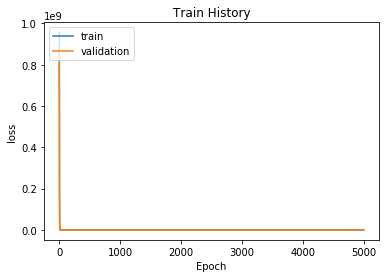

In [415]:
show_tarin_history(train_history,'loss','val_loss')

In [416]:
error=model.predict(XX_train).reshape([len(XX_train)])-np.array(YY_train)
np.average(error**2)**(1/2)

73.22756495118837

In [417]:
error=model.predict(XX_test).reshape([len(XX_test)])-np.array(YY_test)
np.average(error**2)**(1/2)

84.09143874143749

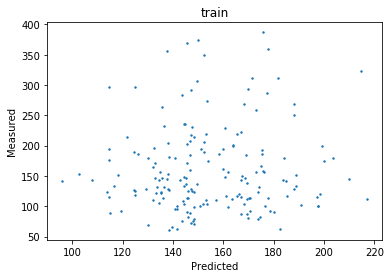

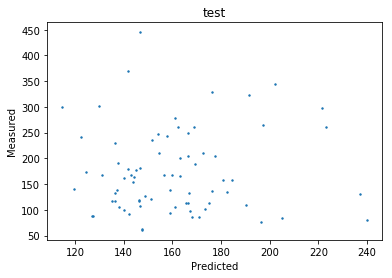

In [418]:
predict=model.predict(XX_train)
plotPaint(predict,YY_train,title="train")
predict=model.predict(XX_test)
plotPaint(predict,YY_test,title="test")

In [419]:
# predicted_sales = model.predict(newDataxxG)
# print("好店家預測")
# print(predicted_sales)
# predicted_sales = model.predict(newDataxxB)
# print("差店家預測")
# print(predicted_sales)
# predict=model.predict(newDataxxG)
# plotPaint(predict,YG,R=1)
# predict=model.predict(newDataxxB)
# plotPaint(predict,YB,R=1)

# 多層(DNN)

In [420]:
input_size=len(XX_train[0])#feature數量
batch_size=50#每批樣本大小
# epochs=5000#處理幾輪
epochs=1500#處理幾輪

model=Sequential()  #定義model
model.add(Dense(40,input_dim=input_size)) #加入層(緊密層) 產出個數40 輸入個數8 次元
model.add(Activation('relu')) #啟動函數
model.add(Dense(200)) 
model.add(Activation('relu')) 
model.add(Dense(200)) 
model.add(Dropout(0.3)) 
model.add(Activation('relu')) 
model.add(Dense(250)) 
model.add(Activation('relu')) 
for i in range(20):
    model.add(Dense(200-i*8)) 
    model.add(Activation('relu')) 
model.add(Dense(20)) 
# model.add(Dense(50)) 
model.add(Activation('relu'))
model.add(Dropout(0.2)) 

model.add(Dense(1))  
model.add(Activation('linear')) #啟動函數

In [421]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_214 (Dense)            (None, 40)                440       
_________________________________________________________________
activation_197 (Activation)  (None, 40)                0         
_________________________________________________________________
dense_215 (Dense)            (None, 200)               8200      
_________________________________________________________________
activation_198 (Activation)  (None, 200)               0         
_________________________________________________________________
dense_216 (Dense)            (None, 200)               40200     
_________________________________________________________________
dropout_42 (Dropout)         (None, 200)               0         
_________________________________________________________________
activation_199 (Activation)  (None, 200)               0         
__________

In [422]:
#loss成本函數mse(均方差)  optimizer最佳化工具adam(會自動調整學習速率、並繼承上一步的方法) metrics性能評估方法()
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
# model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
# model.compile(loss="MSE",metrics=['accuracy'],optimizer='sgd')

In [423]:
#訓練開始 xx為feature Y為label  batch_size為每次放多少進去 epochs為處理幾輪 validation_split為抽多少樣本來驗證 verbose=1為每次顯示
train_history=model.fit(XX_train,YY_train,batch_size=batch_size,epochs=epochs,validation_split=0.2,verbose=1)
# train_history=model.fit(xx,Y,batch_size=batch_size,epochs=epochs,verbose=1)

Train on 140 samples, validate on 35 samples
Epoch 1/1500
140/140 [==============================] - 4s 27ms/step - loss: 33299.4235 - mean_absolute_error: 167.5058 - val_loss: 19412.5215 - val_mean_absolute_error: 125.8797
Epoch 2/1500
140/140 [==============================] - 0s 321us/step - loss: 27037.4072 - mean_absolute_error: 134.7644 - val_loss: 7029.0474 - val_mean_absolute_error: 63.6326
Epoch 3/1500
140/140 [==============================] - 0s 307us/step - loss: 16904.8107 - mean_absolute_error: 106.4011 - val_loss: 16959.5723 - val_mean_absolute_error: 115.3203
Epoch 4/1500
140/140 [==============================] - 0s 307us/step - loss: 20628.6112 - mean_absolute_error: 123.1064 - val_loss: 12594.2451 - val_mean_absolute_error: 93.1589
Epoch 5/1500
140/140 [==============================] - 0s 286us/step - loss: 15907.4634 - mean_absolute_error: 101.8363 - val_loss: 8078.4150 - val_mean_absolute_error: 66.9648
Epoch 6/1500
140/140 [==============================] - 0s 30

Epoch 47/1500
140/140 [==============================] - 0s 271us/step - loss: 12507.1143 - mean_absolute_error: 87.2930 - val_loss: 7554.9097 - val_mean_absolute_error: 64.8671
Epoch 48/1500
140/140 [==============================] - 0s 279us/step - loss: 12182.9621 - mean_absolute_error: 86.9413 - val_loss: 7046.1587 - val_mean_absolute_error: 63.4822
Epoch 49/1500
140/140 [==============================] - 0s 286us/step - loss: 12948.5610 - mean_absolute_error: 87.7766 - val_loss: 7280.1172 - val_mean_absolute_error: 63.7694
Epoch 50/1500
140/140 [==============================] - 0s 286us/step - loss: 13046.2831 - mean_absolute_error: 90.5901 - val_loss: 9259.2812 - val_mean_absolute_error: 73.7775
Epoch 51/1500
140/140 [==============================] - 0s 279us/step - loss: 12425.6232 - mean_absolute_error: 87.1656 - val_loss: 7592.1509 - val_mean_absolute_error: 65.1538
Epoch 52/1500
140/140 [==============================] - 0s 279us/step - loss: 13523.8545 - mean_absolute_erro

140/140 [==============================] - 0s 271us/step - loss: 11942.3753 - mean_absolute_error: 85.4778 - val_loss: 7109.8184 - val_mean_absolute_error: 63.2374
Epoch 94/1500
140/140 [==============================] - 0s 286us/step - loss: 12019.7531 - mean_absolute_error: 86.4880 - val_loss: 7669.4858 - val_mean_absolute_error: 65.3173
Epoch 95/1500
140/140 [==============================] - 0s 279us/step - loss: 11529.2695 - mean_absolute_error: 83.9874 - val_loss: 6951.5420 - val_mean_absolute_error: 63.2315
Epoch 96/1500
140/140 [==============================] - 0s 286us/step - loss: 11896.6044 - mean_absolute_error: 87.7019 - val_loss: 7102.7451 - val_mean_absolute_error: 63.2248
Epoch 97/1500
140/140 [==============================] - 0s 286us/step - loss: 11912.3022 - mean_absolute_error: 86.4680 - val_loss: 8242.6787 - val_mean_absolute_error: 68.3535
Epoch 98/1500
140/140 [==============================] - 0s 293us/step - loss: 11549.6484 - mean_absolute_error: 82.7484 - v

Epoch 139/1500
140/140 [==============================] - 0s 286us/step - loss: 13466.3822 - mean_absolute_error: 90.7229 - val_loss: 10679.4990 - val_mean_absolute_error: 82.5129
Epoch 140/1500
140/140 [==============================] - 0s 279us/step - loss: 13492.5269 - mean_absolute_error: 90.3455 - val_loss: 7014.7476 - val_mean_absolute_error: 62.9589
Epoch 141/1500
140/140 [==============================] - 0s 279us/step - loss: 12868.5886 - mean_absolute_error: 89.0486 - val_loss: 7042.3291 - val_mean_absolute_error: 62.9476
Epoch 142/1500
140/140 [==============================] - 0s 286us/step - loss: 11391.2141 - mean_absolute_error: 83.9978 - val_loss: 8955.6445 - val_mean_absolute_error: 72.1963
Epoch 143/1500
140/140 [==============================] - 0s 286us/step - loss: 12545.2568 - mean_absolute_error: 86.9672 - val_loss: 6984.6133 - val_mean_absolute_error: 62.9368
Epoch 144/1500
140/140 [==============================] - 0s 286us/step - loss: 12517.5211 - mean_absolu

Epoch 185/1500
140/140 [==============================] - 0s 279us/step - loss: 12496.7580 - mean_absolute_error: 87.2041 - val_loss: 7740.1992 - val_mean_absolute_error: 65.7018
Epoch 186/1500
140/140 [==============================] - 0s 279us/step - loss: 13228.8567 - mean_absolute_error: 90.0629 - val_loss: 9532.6973 - val_mean_absolute_error: 75.5266
Epoch 187/1500
140/140 [==============================] - 0s 286us/step - loss: 13210.6387 - mean_absolute_error: 90.0388 - val_loss: 6849.1069 - val_mean_absolute_error: 62.6333
Epoch 188/1500
140/140 [==============================] - 0s 286us/step - loss: 11185.2341 - mean_absolute_error: 84.3145 - val_loss: 6964.9731 - val_mean_absolute_error: 62.6246
Epoch 189/1500
140/140 [==============================] - 0s 300us/step - loss: 12026.3050 - mean_absolute_error: 86.2005 - val_loss: 7471.0083 - val_mean_absolute_error: 64.3242
Epoch 190/1500
140/140 [==============================] - 0s 293us/step - loss: 10974.3291 - mean_absolut

Epoch 231/1500
140/140 [==============================] - 0s 293us/step - loss: 11461.4355 - mean_absolute_error: 83.0524 - val_loss: 6812.5186 - val_mean_absolute_error: 62.3387
Epoch 232/1500
140/140 [==============================] - 0s 279us/step - loss: 10469.1125 - mean_absolute_error: 81.9009 - val_loss: 6879.5049 - val_mean_absolute_error: 62.2184
Epoch 233/1500
140/140 [==============================] - 0s 286us/step - loss: 11851.2121 - mean_absolute_error: 85.5856 - val_loss: 7754.7007 - val_mean_absolute_error: 65.7813
Epoch 234/1500
140/140 [==============================] - 0s 300us/step - loss: 10927.8849 - mean_absolute_error: 81.4582 - val_loss: 6745.4072 - val_mean_absolute_error: 62.1922
Epoch 235/1500
140/140 [==============================] - 0s 293us/step - loss: 12091.8001 - mean_absolute_error: 86.0293 - val_loss: 7481.8560 - val_mean_absolute_error: 64.4344
Epoch 236/1500
140/140 [==============================] - 0s 307us/step - loss: 11947.3028 - mean_absolut

Epoch 277/1500
140/140 [==============================] - 0s 286us/step - loss: 11018.5348 - mean_absolute_error: 81.5544 - val_loss: 6857.1289 - val_mean_absolute_error: 61.5962
Epoch 278/1500
140/140 [==============================] - 0s 293us/step - loss: 11663.7930 - mean_absolute_error: 84.9452 - val_loss: 7760.1392 - val_mean_absolute_error: 65.8514
Epoch 279/1500
140/140 [==============================] - 0s 293us/step - loss: 11810.4566 - mean_absolute_error: 84.4035 - val_loss: 7924.1519 - val_mean_absolute_error: 66.7260
Epoch 280/1500
140/140 [==============================] - 0s 286us/step - loss: 11298.2296 - mean_absolute_error: 81.6431 - val_loss: 6692.5186 - val_mean_absolute_error: 61.6834
Epoch 281/1500
140/140 [==============================] - 0s 286us/step - loss: 11796.0723 - mean_absolute_error: 82.8052 - val_loss: 7581.4399 - val_mean_absolute_error: 64.9314
Epoch 282/1500
140/140 [==============================] - 0s 300us/step - loss: 11780.8495 - mean_absolut

Epoch 323/1500
140/140 [==============================] - 0s 279us/step - loss: 11177.6343 - mean_absolute_error: 82.1630 - val_loss: 6436.5361 - val_mean_absolute_error: 60.4301
Epoch 324/1500
140/140 [==============================] - 0s 286us/step - loss: 10289.7234 - mean_absolute_error: 80.5655 - val_loss: 6825.3164 - val_mean_absolute_error: 61.0369
Epoch 325/1500
140/140 [==============================] - 0s 279us/step - loss: 11190.9280 - mean_absolute_error: 81.9152 - val_loss: 6967.0117 - val_mean_absolute_error: 61.7603
Epoch 326/1500
140/140 [==============================] - 0s 300us/step - loss: 10428.6147 - mean_absolute_error: 78.8086 - val_loss: 6441.4805 - val_mean_absolute_error: 60.2994
Epoch 327/1500
140/140 [==============================] - 0s 286us/step - loss: 10111.8567 - mean_absolute_error: 75.8219 - val_loss: 6400.9199 - val_mean_absolute_error: 60.2525
Epoch 328/1500
140/140 [==============================] - 0s 300us/step - loss: 10605.1876 - mean_absolut

Epoch 369/1500
140/140 [==============================] - 0s 293us/step - loss: 10748.4380 - mean_absolute_error: 82.9249 - val_loss: 5918.3892 - val_mean_absolute_error: 56.0804
Epoch 370/1500
140/140 [==============================] - 0s 286us/step - loss: 10399.4304 - mean_absolute_error: 78.7631 - val_loss: 7015.9868 - val_mean_absolute_error: 61.7592
Epoch 371/1500
140/140 [==============================] - 0s 279us/step - loss: 10555.6122 - mean_absolute_error: 78.6892 - val_loss: 5635.7974 - val_mean_absolute_error: 55.5248
Epoch 372/1500
140/140 [==============================] - 0s 293us/step - loss: 9000.3418 - mean_absolute_error: 72.5210 - val_loss: 5734.9443 - val_mean_absolute_error: 55.2153
Epoch 373/1500
140/140 [==============================] - 0s 321us/step - loss: 10063.7460 - mean_absolute_error: 76.3008 - val_loss: 5719.7319 - val_mean_absolute_error: 54.9073
Epoch 374/1500
140/140 [==============================] - 0s 307us/step - loss: 9631.0290 - mean_absolute_

140/140 [==============================] - 0s 279us/step - loss: 6261.8955 - mean_absolute_error: 60.9497 - val_loss: 3613.0928 - val_mean_absolute_error: 52.1118
Epoch 416/1500
140/140 [==============================] - 0s 286us/step - loss: 5940.5983 - mean_absolute_error: 59.6103 - val_loss: 3540.8269 - val_mean_absolute_error: 50.2962
Epoch 417/1500
140/140 [==============================] - 0s 286us/step - loss: 6167.1079 - mean_absolute_error: 59.3827 - val_loss: 3521.4580 - val_mean_absolute_error: 49.8908
Epoch 418/1500
140/140 [==============================] - 0s 300us/step - loss: 6310.2420 - mean_absolute_error: 60.2055 - val_loss: 3649.3701 - val_mean_absolute_error: 52.7330
Epoch 419/1500
140/140 [==============================] - 0s 321us/step - loss: 6374.9013 - mean_absolute_error: 61.2269 - val_loss: 3632.3608 - val_mean_absolute_error: 52.5102
Epoch 420/1500
140/140 [==============================] - 0s 307us/step - loss: 6011.5315 - mean_absolute_error: 60.0975 - va

140/140 [==============================] - 0s 279us/step - loss: 6014.7067 - mean_absolute_error: 58.8058 - val_loss: 3526.7556 - val_mean_absolute_error: 49.2616
Epoch 462/1500
140/140 [==============================] - 0s 279us/step - loss: 5925.7228 - mean_absolute_error: 55.3457 - val_loss: 3529.7307 - val_mean_absolute_error: 49.7916
Epoch 463/1500
140/140 [==============================] - 0s 271us/step - loss: 6053.7844 - mean_absolute_error: 61.0107 - val_loss: 3568.1272 - val_mean_absolute_error: 51.1177
Epoch 464/1500
140/140 [==============================] - 0s 293us/step - loss: 5954.2592 - mean_absolute_error: 58.3881 - val_loss: 3581.2700 - val_mean_absolute_error: 51.4076
Epoch 465/1500
140/140 [==============================] - 0s 300us/step - loss: 6248.2486 - mean_absolute_error: 60.2847 - val_loss: 3591.0925 - val_mean_absolute_error: 51.6185
Epoch 466/1500
140/140 [==============================] - 0s 300us/step - loss: 5984.7175 - mean_absolute_error: 59.6857 - va

140/140 [==============================] - 0s 293us/step - loss: 6200.9837 - mean_absolute_error: 61.3320 - val_loss: 3612.2715 - val_mean_absolute_error: 52.0673
Epoch 508/1500
140/140 [==============================] - 0s 286us/step - loss: 5713.3348 - mean_absolute_error: 56.8699 - val_loss: 3583.0513 - val_mean_absolute_error: 51.4260
Epoch 509/1500
140/140 [==============================] - 0s 307us/step - loss: 6009.9599 - mean_absolute_error: 59.6389 - val_loss: 3539.8965 - val_mean_absolute_error: 50.1388
Epoch 510/1500
140/140 [==============================] - 0s 293us/step - loss: 5679.1719 - mean_absolute_error: 57.5918 - val_loss: 3537.6201 - val_mean_absolute_error: 49.9655
Epoch 511/1500
140/140 [==============================] - 0s 300us/step - loss: 6149.1862 - mean_absolute_error: 57.6990 - val_loss: 3545.9187 - val_mean_absolute_error: 50.2991
Epoch 512/1500
140/140 [==============================] - 0s 329us/step - loss: 6833.3929 - mean_absolute_error: 63.7819 - va

140/140 [==============================] - 0s 279us/step - loss: 5856.0251 - mean_absolute_error: 58.3548 - val_loss: 3551.5259 - val_mean_absolute_error: 50.4389
Epoch 554/1500
140/140 [==============================] - 0s 293us/step - loss: 6452.8418 - mean_absolute_error: 59.8346 - val_loss: 3594.1387 - val_mean_absolute_error: 51.6223
Epoch 555/1500
140/140 [==============================] - 0s 293us/step - loss: 7117.7532 - mean_absolute_error: 65.7874 - val_loss: 3649.5664 - val_mean_absolute_error: 52.7351
Epoch 556/1500
140/140 [==============================] - 0s 300us/step - loss: 5410.5797 - mean_absolute_error: 55.7634 - val_loss: 3593.4670 - val_mean_absolute_error: 51.6053
Epoch 557/1500
140/140 [==============================] - 0s 300us/step - loss: 5363.3757 - mean_absolute_error: 55.3123 - val_loss: 3574.2100 - val_mean_absolute_error: 51.0934
Epoch 558/1500
140/140 [==============================] - 0s 307us/step - loss: 5744.6038 - mean_absolute_error: 58.5229 - va

140/140 [==============================] - 0s 293us/step - loss: 5485.4393 - mean_absolute_error: 56.7837 - val_loss: 3615.8962 - val_mean_absolute_error: 52.1007
Epoch 600/1500
140/140 [==============================] - 0s 300us/step - loss: 6103.2016 - mean_absolute_error: 61.0421 - val_loss: 3680.1072 - val_mean_absolute_error: 53.2313
Epoch 601/1500
140/140 [==============================] - 0s 286us/step - loss: 5975.7644 - mean_absolute_error: 57.4728 - val_loss: 3606.8013 - val_mean_absolute_error: 51.9156
Epoch 602/1500
140/140 [==============================] - 0s 300us/step - loss: 5760.0649 - mean_absolute_error: 58.7158 - val_loss: 3555.7329 - val_mean_absolute_error: 50.5829
Epoch 603/1500
140/140 [==============================] - 0s 307us/step - loss: 6035.5863 - mean_absolute_error: 58.8233 - val_loss: 3538.4580 - val_mean_absolute_error: 49.9921
Epoch 604/1500
140/140 [==============================] - 0s 300us/step - loss: 6266.4130 - mean_absolute_error: 59.7792 - va

140/140 [==============================] - 0s 293us/step - loss: 6220.5523 - mean_absolute_error: 59.7844 - val_loss: 3530.4072 - val_mean_absolute_error: 49.2246
Epoch 646/1500
140/140 [==============================] - 0s 300us/step - loss: 6253.6453 - mean_absolute_error: 58.5982 - val_loss: 3530.5964 - val_mean_absolute_error: 49.7474
Epoch 647/1500
140/140 [==============================] - 0s 300us/step - loss: 5916.4720 - mean_absolute_error: 58.3582 - val_loss: 3553.6082 - val_mean_absolute_error: 50.6503
Epoch 648/1500
140/140 [==============================] - 0s 314us/step - loss: 5958.4286 - mean_absolute_error: 58.2507 - val_loss: 3596.4766 - val_mean_absolute_error: 51.8060
Epoch 649/1500
140/140 [==============================] - 0s 300us/step - loss: 6078.7204 - mean_absolute_error: 60.6410 - val_loss: 3603.3647 - val_mean_absolute_error: 51.9430
Epoch 650/1500
140/140 [==============================] - 0s 300us/step - loss: 6114.2046 - mean_absolute_error: 60.3363 - va

140/140 [==============================] - 0s 300us/step - loss: 6315.4851 - mean_absolute_error: 62.2584 - val_loss: 3650.9424 - val_mean_absolute_error: 52.7900
Epoch 692/1500
140/140 [==============================] - 0s 314us/step - loss: 5346.0638 - mean_absolute_error: 53.5166 - val_loss: 3557.4824 - val_mean_absolute_error: 50.6684
Epoch 693/1500
140/140 [==============================] - 0s 350us/step - loss: 6116.4296 - mean_absolute_error: 59.0228 - val_loss: 3550.2107 - val_mean_absolute_error: 50.4476
Epoch 694/1500
140/140 [==============================] - 0s 336us/step - loss: 6411.8762 - mean_absolute_error: 61.1920 - val_loss: 3547.7019 - val_mean_absolute_error: 50.3681
Epoch 695/1500
140/140 [==============================] - 0s 314us/step - loss: 6480.6924 - mean_absolute_error: 59.2809 - val_loss: 3558.8464 - val_mean_absolute_error: 50.7146
Epoch 696/1500
140/140 [==============================] - 0s 300us/step - loss: 5940.6575 - mean_absolute_error: 58.1676 - va

140/140 [==============================] - 0s 293us/step - loss: 6593.9887 - mean_absolute_error: 62.3396 - val_loss: 3584.0872 - val_mean_absolute_error: 51.4202
Epoch 738/1500
140/140 [==============================] - 0s 307us/step - loss: 5970.0797 - mean_absolute_error: 59.4820 - val_loss: 3557.8398 - val_mean_absolute_error: 50.6932
Epoch 739/1500
140/140 [==============================] - 0s 286us/step - loss: 5805.8439 - mean_absolute_error: 55.4804 - val_loss: 3548.7185 - val_mean_absolute_error: 50.4278
Epoch 740/1500
140/140 [==============================] - 0s 293us/step - loss: 5976.7994 - mean_absolute_error: 58.9771 - val_loss: 3557.0276 - val_mean_absolute_error: 50.7047
Epoch 741/1500
140/140 [==============================] - 0s 300us/step - loss: 5645.3356 - mean_absolute_error: 56.9199 - val_loss: 3587.7644 - val_mean_absolute_error: 51.5423
Epoch 742/1500
140/140 [==============================] - 0s 293us/step - loss: 6064.1828 - mean_absolute_error: 58.8823 - va

140/140 [==============================] - 0s 293us/step - loss: 6427.5529 - mean_absolute_error: 58.6705 - val_loss: 3537.1655 - val_mean_absolute_error: 49.9776
Epoch 784/1500
140/140 [==============================] - 0s 300us/step - loss: 6110.9424 - mean_absolute_error: 57.2529 - val_loss: 3550.7122 - val_mean_absolute_error: 50.4802
Epoch 785/1500
140/140 [==============================] - 0s 314us/step - loss: 6116.2752 - mean_absolute_error: 60.1986 - val_loss: 3577.4756 - val_mean_absolute_error: 51.2526
Epoch 786/1500
140/140 [==============================] - 0s 286us/step - loss: 5956.1325 - mean_absolute_error: 59.1190 - val_loss: 3628.3801 - val_mean_absolute_error: 52.3949
Epoch 787/1500
140/140 [==============================] - 0s 314us/step - loss: 5595.5067 - mean_absolute_error: 56.4532 - val_loss: 3584.4956 - val_mean_absolute_error: 51.4483
Epoch 788/1500
140/140 [==============================] - 0s 293us/step - loss: 5825.4563 - mean_absolute_error: 59.1322 - va

140/140 [==============================] - 0s 314us/step - loss: 6328.1052 - mean_absolute_error: 59.6569 - val_loss: 3535.3062 - val_mean_absolute_error: 49.9312
Epoch 830/1500
140/140 [==============================] - 0s 286us/step - loss: 5679.4859 - mean_absolute_error: 57.2351 - val_loss: 3558.0588 - val_mean_absolute_error: 50.7092
Epoch 831/1500
140/140 [==============================] - 0s 293us/step - loss: 6238.1795 - mean_absolute_error: 60.8500 - val_loss: 3572.8096 - val_mean_absolute_error: 51.1389
Epoch 832/1500
140/140 [==============================] - 0s 307us/step - loss: 6017.3286 - mean_absolute_error: 57.9595 - val_loss: 3609.7598 - val_mean_absolute_error: 52.0202
Epoch 833/1500
140/140 [==============================] - 0s 300us/step - loss: 6578.8647 - mean_absolute_error: 63.6789 - val_loss: 3590.4473 - val_mean_absolute_error: 51.5923
Epoch 834/1500
140/140 [==============================] - 0s 300us/step - loss: 5939.1042 - mean_absolute_error: 59.0125 - va

140/140 [==============================] - 0s 314us/step - loss: 6222.9963 - mean_absolute_error: 59.1116 - val_loss: 3570.6755 - val_mean_absolute_error: 51.1437
Epoch 876/1500
140/140 [==============================] - 0s 293us/step - loss: 6187.1504 - mean_absolute_error: 59.7312 - val_loss: 3660.8342 - val_mean_absolute_error: 52.9333
Epoch 877/1500
140/140 [==============================] - 0s 307us/step - loss: 6057.4556 - mean_absolute_error: 60.5218 - val_loss: 3673.8745 - val_mean_absolute_error: 53.1417
Epoch 878/1500
140/140 [==============================] - 0s 307us/step - loss: 5868.6680 - mean_absolute_error: 60.1015 - val_loss: 3559.3203 - val_mean_absolute_error: 50.6948
Epoch 879/1500
140/140 [==============================] - 0s 286us/step - loss: 5930.5489 - mean_absolute_error: 57.1495 - val_loss: 3537.1008 - val_mean_absolute_error: 49.8183
Epoch 880/1500
140/140 [==============================] - 0s 329us/step - loss: 5881.5745 - mean_absolute_error: 58.0951 - va

140/140 [==============================] - 0s 293us/step - loss: 5913.7464 - mean_absolute_error: 59.1697 - val_loss: 3611.3643 - val_mean_absolute_error: 52.0771
Epoch 922/1500
140/140 [==============================] - 0s 300us/step - loss: 5755.0840 - mean_absolute_error: 58.4622 - val_loss: 3618.0051 - val_mean_absolute_error: 52.2172
Epoch 923/1500
140/140 [==============================] - 0s 293us/step - loss: 6024.9925 - mean_absolute_error: 59.0302 - val_loss: 3602.8525 - val_mean_absolute_error: 51.9187
Epoch 924/1500
140/140 [==============================] - 0s 307us/step - loss: 6435.9654 - mean_absolute_error: 61.1494 - val_loss: 3544.9463 - val_mean_absolute_error: 50.3439
Epoch 925/1500
140/140 [==============================] - 0s 314us/step - loss: 6408.9626 - mean_absolute_error: 60.9557 - val_loss: 3535.4746 - val_mean_absolute_error: 49.9460
Epoch 926/1500
140/140 [==============================] - 0s 300us/step - loss: 5577.5517 - mean_absolute_error: 53.4749 - va

140/140 [==============================] - 0s 307us/step - loss: 5618.8168 - mean_absolute_error: 58.0581 - val_loss: 3562.1953 - val_mean_absolute_error: 50.8302
Epoch 968/1500
140/140 [==============================] - 0s 293us/step - loss: 6051.9159 - mean_absolute_error: 59.1563 - val_loss: 3556.2622 - val_mean_absolute_error: 50.6626
Epoch 969/1500
140/140 [==============================] - 0s 286us/step - loss: 6353.2552 - mean_absolute_error: 58.9477 - val_loss: 3612.2166 - val_mean_absolute_error: 52.0886
Epoch 970/1500
140/140 [==============================] - 0s 321us/step - loss: 6023.6145 - mean_absolute_error: 59.3908 - val_loss: 3646.2126 - val_mean_absolute_error: 52.7204
Epoch 971/1500
140/140 [==============================] - 0s 286us/step - loss: 6118.3257 - mean_absolute_error: 61.8517 - val_loss: 3633.6086 - val_mean_absolute_error: 52.4947
Epoch 972/1500
140/140 [==============================] - 0s 300us/step - loss: 5870.6864 - mean_absolute_error: 59.2612 - va

140/140 [==============================] - 0s 300us/step - loss: 6079.3924 - mean_absolute_error: 60.2099 - val_loss: 3599.2512 - val_mean_absolute_error: 51.7965
Epoch 1014/1500
140/140 [==============================] - 0s 293us/step - loss: 5933.8111 - mean_absolute_error: 58.3330 - val_loss: 3667.1750 - val_mean_absolute_error: 53.0568
Epoch 1015/1500
140/140 [==============================] - 0s 286us/step - loss: 5835.6151 - mean_absolute_error: 58.6557 - val_loss: 3669.0747 - val_mean_absolute_error: 53.0847
Epoch 1016/1500
140/140 [==============================] - 0s 293us/step - loss: 6131.9362 - mean_absolute_error: 59.5962 - val_loss: 3629.9866 - val_mean_absolute_error: 52.4113
Epoch 1017/1500
140/140 [==============================] - 0s 300us/step - loss: 5499.8631 - mean_absolute_error: 56.0570 - val_loss: 3545.9114 - val_mean_absolute_error: 50.3022
Epoch 1018/1500
140/140 [==============================] - 0s 321us/step - loss: 6081.2974 - mean_absolute_error: 59.6071

Epoch 1059/1500
140/140 [==============================] - 0s 300us/step - loss: 6072.5258 - mean_absolute_error: 58.4575 - val_loss: 3568.1199 - val_mean_absolute_error: 50.9441
Epoch 1060/1500
140/140 [==============================] - 0s 307us/step - loss: 5983.4120 - mean_absolute_error: 58.0998 - val_loss: 3582.1809 - val_mean_absolute_error: 51.3500
Epoch 1061/1500
140/140 [==============================] - 0s 300us/step - loss: 5705.6509 - mean_absolute_error: 56.2408 - val_loss: 3565.3335 - val_mean_absolute_error: 50.8643
Epoch 1062/1500
140/140 [==============================] - 0s 293us/step - loss: 6190.7171 - mean_absolute_error: 60.0490 - val_loss: 3566.2043 - val_mean_absolute_error: 50.8943
Epoch 1063/1500
140/140 [==============================] - 0s 314us/step - loss: 6600.8337 - mean_absolute_error: 61.3794 - val_loss: 3549.1475 - val_mean_absolute_error: 50.3939
Epoch 1064/1500
140/140 [==============================] - 0s 293us/step - loss: 5574.7256 - mean_absolut

Epoch 1105/1500
140/140 [==============================] - 0s 300us/step - loss: 5923.3138 - mean_absolute_error: 57.9152 - val_loss: 3548.7556 - val_mean_absolute_error: 50.4250
Epoch 1106/1500
140/140 [==============================] - 0s 293us/step - loss: 5715.2007 - mean_absolute_error: 56.5211 - val_loss: 3553.7510 - val_mean_absolute_error: 50.5687
Epoch 1107/1500
140/140 [==============================] - 0s 321us/step - loss: 6155.5462 - mean_absolute_error: 59.5246 - val_loss: 3574.2478 - val_mean_absolute_error: 51.1788
Epoch 1108/1500
140/140 [==============================] - 0s 307us/step - loss: 6150.5492 - mean_absolute_error: 57.1445 - val_loss: 3634.9265 - val_mean_absolute_error: 52.5121
Epoch 1109/1500
140/140 [==============================] - 0s 314us/step - loss: 6097.1335 - mean_absolute_error: 59.7358 - val_loss: 3675.7695 - val_mean_absolute_error: 53.1909
Epoch 1110/1500
140/140 [==============================] - 0s 307us/step - loss: 5946.3517 - mean_absolut

Epoch 1151/1500
140/140 [==============================] - 0s 300us/step - loss: 6438.6917 - mean_absolute_error: 59.4061 - val_loss: 3569.5144 - val_mean_absolute_error: 51.0566
Epoch 1152/1500
140/140 [==============================] - 0s 293us/step - loss: 6118.0376 - mean_absolute_error: 58.3114 - val_loss: 3611.8755 - val_mean_absolute_error: 52.0800
Epoch 1153/1500
140/140 [==============================] - 0s 293us/step - loss: 5985.1620 - mean_absolute_error: 59.7593 - val_loss: 3599.7776 - val_mean_absolute_error: 51.8230
Epoch 1154/1500
140/140 [==============================] - 0s 307us/step - loss: 5259.6076 - mean_absolute_error: 54.6132 - val_loss: 3586.8552 - val_mean_absolute_error: 51.5240
Epoch 1155/1500
140/140 [==============================] - 0s 307us/step - loss: 5908.8959 - mean_absolute_error: 58.1535 - val_loss: 3632.7122 - val_mean_absolute_error: 52.4838
Epoch 1156/1500
140/140 [==============================] - 0s 293us/step - loss: 6426.1823 - mean_absolut

Epoch 1197/1500
140/140 [==============================] - 0s 300us/step - loss: 5660.4504 - mean_absolute_error: 57.5334 - val_loss: 3546.8647 - val_mean_absolute_error: 50.3835
Epoch 1198/1500
140/140 [==============================] - 0s 307us/step - loss: 5731.6933 - mean_absolute_error: 57.5406 - val_loss: 3554.2263 - val_mean_absolute_error: 50.6016
Epoch 1199/1500
140/140 [==============================] - 0s 286us/step - loss: 6163.7255 - mean_absolute_error: 60.9199 - val_loss: 3563.1658 - val_mean_absolute_error: 50.8635
Epoch 1200/1500
140/140 [==============================] - 0s 307us/step - loss: 6184.0137 - mean_absolute_error: 59.1255 - val_loss: 3579.8643 - val_mean_absolute_error: 51.3377
Epoch 1201/1500
140/140 [==============================] - 0s 321us/step - loss: 5956.9623 - mean_absolute_error: 59.8220 - val_loss: 3609.1838 - val_mean_absolute_error: 52.0190
Epoch 1202/1500
140/140 [==============================] - 0s 286us/step - loss: 5663.1610 - mean_absolut

Epoch 1243/1500
140/140 [==============================] - 0s 293us/step - loss: 5878.2431 - mean_absolute_error: 56.2364 - val_loss: 3580.9678 - val_mean_absolute_error: 51.3656
Epoch 1244/1500
140/140 [==============================] - 0s 314us/step - loss: 5834.4293 - mean_absolute_error: 56.9223 - val_loss: 3773.1897 - val_mean_absolute_error: 54.5075
Epoch 1245/1500
140/140 [==============================] - 0s 293us/step - loss: 6140.5561 - mean_absolute_error: 60.5886 - val_loss: 3745.3032 - val_mean_absolute_error: 54.1650
Epoch 1246/1500
140/140 [==============================] - 0s 293us/step - loss: 5430.6292 - mean_absolute_error: 58.2036 - val_loss: 3601.8542 - val_mean_absolute_error: 51.8576
Epoch 1247/1500
140/140 [==============================] - 0s 307us/step - loss: 5863.5324 - mean_absolute_error: 58.4116 - val_loss: 3538.3789 - val_mean_absolute_error: 50.0596
Epoch 1248/1500
140/140 [==============================] - 0s 293us/step - loss: 5942.0360 - mean_absolut

Epoch 1289/1500
140/140 [==============================] - 0s 286us/step - loss: 5985.0035 - mean_absolute_error: 57.9069 - val_loss: 3550.9294 - val_mean_absolute_error: 50.5083
Epoch 1290/1500
140/140 [==============================] - 0s 321us/step - loss: 6103.3550 - mean_absolute_error: 58.7768 - val_loss: 3555.4285 - val_mean_absolute_error: 50.6392
Epoch 1291/1500
140/140 [==============================] - 0s 293us/step - loss: 5727.7052 - mean_absolute_error: 57.7688 - val_loss: 3585.7212 - val_mean_absolute_error: 51.4889
Epoch 1292/1500
140/140 [==============================] - 0s 307us/step - loss: 6258.1712 - mean_absolute_error: 62.2334 - val_loss: 3597.3113 - val_mean_absolute_error: 51.7646
Epoch 1293/1500
140/140 [==============================] - 0s 286us/step - loss: 6497.9829 - mean_absolute_error: 61.0573 - val_loss: 3576.6948 - val_mean_absolute_error: 51.2543
Epoch 1294/1500
140/140 [==============================] - 0s 314us/step - loss: 5761.6331 - mean_absolut

Epoch 1335/1500
140/140 [==============================] - 0s 314us/step - loss: 5574.2235 - mean_absolute_error: 57.4576 - val_loss: 3614.9607 - val_mean_absolute_error: 52.1460
Epoch 1336/1500
140/140 [==============================] - 0s 307us/step - loss: 6288.0472 - mean_absolute_error: 60.4603 - val_loss: 3584.6069 - val_mean_absolute_error: 51.4693
Epoch 1337/1500
140/140 [==============================] - 0s 336us/step - loss: 5378.8159 - mean_absolute_error: 55.5611 - val_loss: 3576.1418 - val_mean_absolute_error: 51.2507
Epoch 1338/1500
140/140 [==============================] - 0s 307us/step - loss: 6430.2696 - mean_absolute_error: 62.6016 - val_loss: 3640.7695 - val_mean_absolute_error: 52.6354
Epoch 1339/1500
140/140 [==============================] - 0s 314us/step - loss: 5671.9093 - mean_absolute_error: 58.0984 - val_loss: 3606.4075 - val_mean_absolute_error: 51.9746
Epoch 1340/1500
140/140 [==============================] - 0s 336us/step - loss: 5611.2388 - mean_absolut

Epoch 1381/1500
140/140 [==============================] - 0s 314us/step - loss: 5864.9060 - mean_absolute_error: 58.9252 - val_loss: 3542.8691 - val_mean_absolute_error: 50.3196
Epoch 1382/1500
140/140 [==============================] - 0s 300us/step - loss: 6041.3533 - mean_absolute_error: 55.7653 - val_loss: 3576.3809 - val_mean_absolute_error: 51.2991
Epoch 1383/1500
140/140 [==============================] - 0s 293us/step - loss: 6784.3365 - mean_absolute_error: 61.2784 - val_loss: 3585.1741 - val_mean_absolute_error: 51.5233
Epoch 1384/1500
140/140 [==============================] - 0s 321us/step - loss: 5797.2138 - mean_absolute_error: 58.6359 - val_loss: 3576.2493 - val_mean_absolute_error: 51.2978
Epoch 1385/1500
140/140 [==============================] - 0s 293us/step - loss: 5505.3288 - mean_absolute_error: 54.6712 - val_loss: 3586.0054 - val_mean_absolute_error: 51.5433
Epoch 1386/1500
140/140 [==============================] - 0s 300us/step - loss: 6077.4899 - mean_absolut

Epoch 1427/1500
140/140 [==============================] - 0s 286us/step - loss: 5542.8379 - mean_absolute_error: 56.2558 - val_loss: 3603.0190 - val_mean_absolute_error: 51.9097
Epoch 1428/1500
140/140 [==============================] - 0s 300us/step - loss: 5888.7251 - mean_absolute_error: 58.2326 - val_loss: 3639.1477 - val_mean_absolute_error: 52.6122
Epoch 1429/1500
140/140 [==============================] - 0s 300us/step - loss: 5509.8932 - mean_absolute_error: 55.8573 - val_loss: 3633.4023 - val_mean_absolute_error: 52.5104
Epoch 1430/1500
140/140 [==============================] - 0s 314us/step - loss: 5929.3275 - mean_absolute_error: 60.9719 - val_loss: 3625.7512 - val_mean_absolute_error: 52.3706
Epoch 1431/1500
140/140 [==============================] - 0s 314us/step - loss: 6126.7787 - mean_absolute_error: 60.2777 - val_loss: 3573.3867 - val_mean_absolute_error: 51.1955
Epoch 1432/1500
140/140 [==============================] - 0s 300us/step - loss: 5653.3810 - mean_absolut

Epoch 1473/1500
140/140 [==============================] - 0s 293us/step - loss: 6712.3219 - mean_absolute_error: 60.7857 - val_loss: 3543.0784 - val_mean_absolute_error: 50.3177
Epoch 1474/1500
140/140 [==============================] - 0s 286us/step - loss: 6285.3874 - mean_absolute_error: 60.4343 - val_loss: 3549.5093 - val_mean_absolute_error: 50.5084
Epoch 1475/1500
140/140 [==============================] - 0s 307us/step - loss: 5655.7313 - mean_absolute_error: 54.8293 - val_loss: 3590.0095 - val_mean_absolute_error: 51.6378
Epoch 1476/1500
140/140 [==============================] - 0s 307us/step - loss: 5556.8721 - mean_absolute_error: 55.5852 - val_loss: 3628.1580 - val_mean_absolute_error: 52.4260
Epoch 1477/1500
140/140 [==============================] - 0s 329us/step - loss: 5517.2311 - mean_absolute_error: 59.6650 - val_loss: 3674.4109 - val_mean_absolute_error: 53.1999
Epoch 1478/1500
140/140 [==============================] - 0s 307us/step - loss: 6374.2784 - mean_absolut

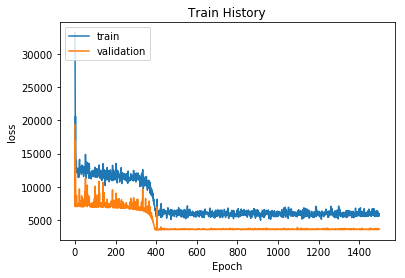

In [424]:
#劃出準確度歷程
import matplotlib.pyplot as plt
def show_tarin_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel("Epoch")
    plt.legend(['train','validation'],loc="upper left")
    plt.show()
show_tarin_history(train_history,'loss','val_loss')
# show_tarin_history(train_history,'loss','loss')

In [425]:
error=model.predict(XX_train).reshape([len(XX_train)])-np.array(YY_train)
np.average(error**2)**(1/2)

70.46314229700307

In [426]:
error=model.predict(XX_test).reshape([len(XX_test)])-np.array(YY_test)
np.average(error**2)**(1/2)

81.0539332034563

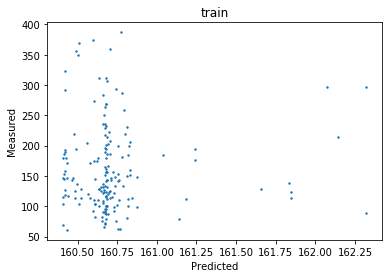

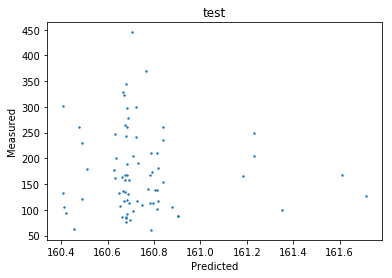

In [427]:
predict=model.predict(XX_train)
plotPaint(predict,YY_train,title="train")
predict=model.predict(XX_test)
plotPaint(predict,YY_test,title="test")

In [428]:
# predict=model.predict(newDataxxG)
# plotPaint(predict,YG,R=1)
# predict=model.predict(newDataxxB)
# plotPaint(predict,YB,R=1)

In [429]:
# predicted_sales = model.predict(newDataxxG)
# predicted_sales

In [430]:
# predicted_sales = model.predict(newDataxxB)
# predicted_sales

# ====================預測類型===================

# 試跑SKLEARN

In [431]:
# 直接將資料分7成訓練集、3成測試集

In [432]:
from sklearn.cross_validation import train_test_split
#將資料分成訓練、測試集 其中測試集佔三成
xx_train, xx_test, Y_train, Y_test =train_test_split(xx,typeY,test_size=0.3,random_state=1)

In [433]:
print(xx_train.shape,xx_test.shape,Y_train.shape,Y_test.shape)

(175, 10) (75, 10) (175,) (75,)


In [434]:
#正確率function
def GorB(someModel,xx_train=xx_train,Y_train=Y_train,xx_test=xx_test,Y_test=Y_test):
    predicted = someModel((xx_train)) #預測結果
    accuracy=list(predicted==Y_train)#回傳true or false的list
    print("訓練集正確率：{}".format(accuracy.count(True)/len(accuracy))) #看正確率


    predicted = someModel((xx_test)) #預測結果
    accuracy=list(predicted==Y_test)#回傳true or false的list
    print("測試集正確率：{}".format(accuracy.count(True)/len(accuracy))) #看正確率

# 線性分類器

In [435]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf1 = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto').fit(xx_train, Y_train)

# predicted = clf1.predict((xx_train)) #預測結果
# accuracy=list(predicted==Y_train)#回傳true or false的list
# print("訓練集正確率：{}".format(accuracy.count(True)/len(accuracy))) #看正確率


# predicted = clf1.predict((xx_test)) #預測結果
# accuracy=list(predicted==Y_test)#回傳true or false的list
# print("測試集正確率：{}".format(accuracy.count(True)/len(accuracy))) #看正確率

GorB(clf1.predict)

訓練集正確率：0.49142857142857144
測試集正確率：0.4266666666666667


# 高斯單純貝氏分類

In [436]:
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB().fit(xx_train, Y_train)
GorB(clf.predict)

訓練集正確率：0.37714285714285717
測試集正確率：0.37333333333333335


# KNN

In [437]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier().fit(xx_train, Y_train)
GorB(clf.predict)

訓練集正確率：0.5542857142857143
測試集正確率：0.41333333333333333


# 隨機森林

In [438]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier().fit(xx_train, Y_train)
GorB(clf.predict)

訓練集正確率：0.9371428571428572
測試集正確率：0.49333333333333335


# SVM分類

In [439]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics

# 產生SVC分類器
classifier = svm.SVC(gamma=2, C=1,kernel="rbf")
#訓練
classifier.fit(xx_train, Y_train)
GorB(classifier.predict)

# predicted = classifier.predict((xx_train)) #預測結果
# accuracy=list(predicted==Y_train)#回傳true or false的list
# print("訓練集正確率：{}".format(accuracy.count(True)/len(accuracy))) #看正確率


# predicted = classifier.predict((xx_test)) #預測結果
# accuracy=list(predicted==Y_test)#回傳true or false的list
# print("測試集正確率：{}".format(accuracy.count(True)/len(accuracy))) #看正確率

訓練集正確率：0.8914285714285715
測試集正確率：0.44


# DNN分類

In [440]:
from sklearn.neural_network.multilayer_perceptron import MLPClassifier

In [441]:
#多層類神經網路分類器 ()
    #random_state=1初始亂數值設定永遠相同 
    #hidden_layer_sizes=(200,100)有兩層隱藏層，分別有200跟100個神經元 預設單層100
    #activation='identity', 'logistic', 'tanh', 'relu' 啟動函數有四種 預設為'relu'
        #'relu'預設，f(x)=max(0,x) 79.8%
        #'logistic'f(x)=1/(1+exp(x)) 對事件的機率有興趣時使用 46%
        #'identity'f(x)=x 48% 
        #'tanh'??? 46%
    #max_iter=500跌代次數，重複訓練的次數 預設為200
# mlp=MLPClassifier(random_state=1,hidden_layer_sizes=(200,500,300),activation="relu",max_iter=500)
mlp=MLPClassifier(random_state=1,hidden_layer_sizes=(300,500,700,300,500),activation="relu",max_iter=1000)
mlp.fit(xx_train,Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(300, 500, 700, 300, 500),
       learning_rate='constant', learning_rate_init=0.001, max_iter=1000,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5, random_state=1,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [442]:
print("訓練集",len([i for i in mlp.predict(xx_train)==Y_train if i==True])/len(Y_train))
print("測試集",len([i for i in mlp.predict(xx_test)==Y_test if i==True])/len(Y_test))

訓練集 0.9485714285714286
測試集 0.38666666666666666


# 試跑Keras DNN分類

In [443]:
classes=3
#one-hot
Y_trainO=np_utils.to_categorical(Y_train,classes)
Y_testO=np_utils.to_categorical(Y_test,classes)


In [444]:
Y_trainO[:5],Y_testO[:5]

(array([[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]]), array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.]]))

In [445]:
model=Sequential()  #定義model
input_size=len(xx_train[0])#feature數量
batch_size=50#每批樣本大小
epochs=2000#處理幾輪

model.add(Dense(100,input_dim=input_size)) 
model.add(Activation('relu')) #啟動函數
model.add(Dropout(0.2))
model.add(Dense(200)) 
model.add(Activation('relu')) #啟動函數
model.add(Dropout(0.2))
model.add(Dense(200)) 
model.add(Activation('relu')) #啟動函數
model.add(Dropout(0.2))
model.add(Dense(100)) 
model.add(Activation('relu')) #啟動函數
model.add(Dropout(0.2))

# for i in range(5):
#     model.add(Dense(100-i*10)) 
#     model.add(Activation('relu')) #啟動函數


# model.add(Dense(20)) 
# model.add(Activation('relu')) #啟動函數
model.add(Dropout(0.3))


model.add(Dense(10,activation="sigmoid")) 
# model.add(Dense(10,activation="sigmoid")) 

model.add(Dense(3))  #加入層(緊密層) 產出個數10.輸入個數100 次元
model.add(Activation("softmax"))

In [446]:
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

#optimizer最佳化工具sgd(隨機梯度下降法) loss成本函數(交叉熵)   metrics性能評估方法()


model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
# model.compile(optimizer="rmsprop", loss='categorical_crossentropy', metrics=['acc'])
# model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['acc'])
# model.compile(loss="MSE",metrics=['accuracy'],optimizer='sgd')

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_240 (Dense)            (None, 100)               1100      
_________________________________________________________________
activation_223 (Activation)  (None, 100)               0         
_________________________________________________________________
dropout_44 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_241 (Dense)            (None, 200)               20200     
_________________________________________________________________
activation_224 (Activation)  (None, 200)               0         
_________________________________________________________________
dropout_45 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_242 (Dense)            (None, 200)               40200     
__________

In [447]:
#訓練開始 xx為feature Y為label  batch_size為每次放多少進去 epochs為處理幾輪 validation_split為抽多少樣本來驗證 verbose=1為每次顯示
train_history=model.fit(xx_train,Y_trainO,batch_size=batch_size,epochs=epochs,validation_split=0.1,verbose=1)
# train_history=model.fit(xx,Y,batch_size=batch_size,epochs=epochs,verbose=1)



Train on 157 samples, validate on 18 samples
Epoch 1/2000
157/157 [==============================] - 2s 12ms/step - loss: 1.0708 - acc: 0.4395 - val_loss: 1.0452 - val_acc: 0.5556
Epoch 2/2000
157/157 [==============================] - 0s 153us/step - loss: 1.0645 - acc: 0.4459 - val_loss: 1.0379 - val_acc: 0.5556
Epoch 3/2000
157/157 [==============================] - 0s 185us/step - loss: 1.0664 - acc: 0.4459 - val_loss: 1.0280 - val_acc: 0.5556
Epoch 4/2000
157/157 [==============================] - 0s 147us/step - loss: 1.0613 - acc: 0.4459 - val_loss: 1.0221 - val_acc: 0.5556
Epoch 5/2000
157/157 [==============================] - 0s 153us/step - loss: 1.0621 - acc: 0.4459 - val_loss: 1.0207 - val_acc: 0.5556
Epoch 6/2000
157/157 [==============================] - 0s 178us/step - loss: 1.0704 - acc: 0.4522 - val_loss: 1.0228 - val_acc: 0.5556
Epoch 7/2000
157/157 [==============================] - 0s 166us/step - loss: 1.0704 - acc: 0.4522 - val_loss: 1.0316 - val_acc: 0.5556
Epoc

Epoch 60/2000
157/157 [==============================] - 0s 159us/step - loss: 1.0254 - acc: 0.4586 - val_loss: 1.0414 - val_acc: 0.5000
Epoch 61/2000
157/157 [==============================] - 0s 147us/step - loss: 1.0386 - acc: 0.4904 - val_loss: 1.0413 - val_acc: 0.5000
Epoch 62/2000
157/157 [==============================] - 0s 140us/step - loss: 1.0323 - acc: 0.4713 - val_loss: 1.0343 - val_acc: 0.5000
Epoch 63/2000
157/157 [==============================] - 0s 140us/step - loss: 1.0320 - acc: 0.4650 - val_loss: 1.0297 - val_acc: 0.5000
Epoch 64/2000
157/157 [==============================] - 0s 153us/step - loss: 1.0376 - acc: 0.4904 - val_loss: 1.0280 - val_acc: 0.5000
Epoch 65/2000
157/157 [==============================] - 0s 147us/step - loss: 1.0333 - acc: 0.4841 - val_loss: 1.0268 - val_acc: 0.5556
Epoch 66/2000
157/157 [==============================] - 0s 166us/step - loss: 1.0287 - acc: 0.4586 - val_loss: 1.0283 - val_acc: 0.5000
Epoch 67/2000
157/157 [==================

157/157 [==============================] - 0s 140us/step - loss: 1.0009 - acc: 0.5414 - val_loss: 1.1049 - val_acc: 0.5000
Epoch 120/2000
157/157 [==============================] - 0s 147us/step - loss: 0.9580 - acc: 0.5478 - val_loss: 1.0973 - val_acc: 0.4444
Epoch 121/2000
157/157 [==============================] - 0s 166us/step - loss: 0.9560 - acc: 0.5350 - val_loss: 1.0991 - val_acc: 0.3889
Epoch 122/2000
157/157 [==============================] - 0s 147us/step - loss: 0.9457 - acc: 0.5732 - val_loss: 1.0913 - val_acc: 0.4444
Epoch 123/2000
157/157 [==============================] - 0s 159us/step - loss: 0.9558 - acc: 0.5605 - val_loss: 1.0798 - val_acc: 0.5000
Epoch 124/2000
157/157 [==============================] - 0s 147us/step - loss: 0.9685 - acc: 0.5605 - val_loss: 1.0796 - val_acc: 0.5556
Epoch 125/2000
157/157 [==============================] - 0s 153us/step - loss: 0.9679 - acc: 0.5541 - val_loss: 1.0859 - val_acc: 0.5556
Epoch 126/2000
157/157 [=========================

157/157 [==============================] - 0s 159us/step - loss: 0.8632 - acc: 0.6051 - val_loss: 1.1533 - val_acc: 0.3889
Epoch 179/2000
157/157 [==============================] - 0s 147us/step - loss: 0.9103 - acc: 0.5669 - val_loss: 1.1678 - val_acc: 0.4444
Epoch 180/2000
157/157 [==============================] - 0s 147us/step - loss: 0.9250 - acc: 0.5860 - val_loss: 1.1374 - val_acc: 0.4444
Epoch 181/2000
157/157 [==============================] - 0s 153us/step - loss: 0.8740 - acc: 0.5987 - val_loss: 1.1073 - val_acc: 0.5000
Epoch 182/2000
157/157 [==============================] - 0s 140us/step - loss: 0.8628 - acc: 0.6242 - val_loss: 1.1078 - val_acc: 0.5000
Epoch 183/2000
157/157 [==============================] - 0s 159us/step - loss: 0.8824 - acc: 0.6115 - val_loss: 1.1263 - val_acc: 0.4444
Epoch 184/2000
157/157 [==============================] - 0s 140us/step - loss: 0.8739 - acc: 0.6306 - val_loss: 1.1561 - val_acc: 0.4444
Epoch 185/2000
157/157 [=========================

157/157 [==============================] - 0s 159us/step - loss: 0.8353 - acc: 0.6369 - val_loss: 1.3498 - val_acc: 0.5000
Epoch 238/2000
157/157 [==============================] - 0s 153us/step - loss: 0.7984 - acc: 0.6369 - val_loss: 1.3651 - val_acc: 0.3889
Epoch 239/2000
157/157 [==============================] - 0s 159us/step - loss: 0.7901 - acc: 0.6688 - val_loss: 1.3178 - val_acc: 0.3889
Epoch 240/2000
157/157 [==============================] - 0s 140us/step - loss: 0.8043 - acc: 0.6051 - val_loss: 1.3201 - val_acc: 0.3889
Epoch 241/2000
157/157 [==============================] - 0s 153us/step - loss: 0.7708 - acc: 0.6624 - val_loss: 1.3107 - val_acc: 0.3333
Epoch 242/2000
157/157 [==============================] - 0s 140us/step - loss: 0.7876 - acc: 0.6433 - val_loss: 1.3104 - val_acc: 0.3333
Epoch 243/2000
157/157 [==============================] - 0s 159us/step - loss: 0.7197 - acc: 0.6752 - val_loss: 1.3527 - val_acc: 0.2778
Epoch 244/2000
157/157 [=========================

157/157 [==============================] - 0s 159us/step - loss: 0.6843 - acc: 0.6943 - val_loss: 1.3579 - val_acc: 0.3889
Epoch 297/2000
157/157 [==============================] - 0s 147us/step - loss: 0.6465 - acc: 0.7006 - val_loss: 1.3668 - val_acc: 0.4444
Epoch 298/2000
157/157 [==============================] - 0s 153us/step - loss: 0.6888 - acc: 0.7006 - val_loss: 1.3573 - val_acc: 0.3889
Epoch 299/2000
157/157 [==============================] - 0s 153us/step - loss: 0.6513 - acc: 0.7580 - val_loss: 1.4248 - val_acc: 0.3889
Epoch 300/2000
157/157 [==============================] - 0s 159us/step - loss: 0.6734 - acc: 0.7389 - val_loss: 1.4682 - val_acc: 0.3889
Epoch 301/2000
157/157 [==============================] - 0s 166us/step - loss: 0.6772 - acc: 0.6943 - val_loss: 1.4331 - val_acc: 0.3889
Epoch 302/2000
157/157 [==============================] - 0s 166us/step - loss: 0.6105 - acc: 0.7389 - val_loss: 1.3658 - val_acc: 0.4444
Epoch 303/2000
157/157 [=========================

Epoch 355/2000
157/157 [==============================] - 0s 147us/step - loss: 0.5986 - acc: 0.7643 - val_loss: 1.5086 - val_acc: 0.3889
Epoch 356/2000
157/157 [==============================] - 0s 153us/step - loss: 0.5566 - acc: 0.7834 - val_loss: 1.5492 - val_acc: 0.4444
Epoch 357/2000
157/157 [==============================] - 0s 153us/step - loss: 0.5568 - acc: 0.7070 - val_loss: 1.5799 - val_acc: 0.4444
Epoch 358/2000
157/157 [==============================] - 0s 153us/step - loss: 0.5482 - acc: 0.7834 - val_loss: 1.6250 - val_acc: 0.4444
Epoch 359/2000
157/157 [==============================] - 0s 166us/step - loss: 0.5581 - acc: 0.7643 - val_loss: 1.5922 - val_acc: 0.4444
Epoch 360/2000
157/157 [==============================] - 0s 159us/step - loss: 0.5214 - acc: 0.8025 - val_loss: 1.5813 - val_acc: 0.4444
Epoch 361/2000
157/157 [==============================] - 0s 159us/step - loss: 0.4972 - acc: 0.8025 - val_loss: 1.5367 - val_acc: 0.4444
Epoch 362/2000
157/157 [==========

Epoch 414/2000
157/157 [==============================] - 0s 153us/step - loss: 0.4989 - acc: 0.7834 - val_loss: 1.6847 - val_acc: 0.5000
Epoch 415/2000
157/157 [==============================] - 0s 166us/step - loss: 0.4626 - acc: 0.8025 - val_loss: 1.7864 - val_acc: 0.5000
Epoch 416/2000
157/157 [==============================] - 0s 159us/step - loss: 0.4635 - acc: 0.8089 - val_loss: 1.8658 - val_acc: 0.4444
Epoch 417/2000
157/157 [==============================] - 0s 159us/step - loss: 0.5335 - acc: 0.7771 - val_loss: 1.7296 - val_acc: 0.4444
Epoch 418/2000
157/157 [==============================] - 0s 159us/step - loss: 0.4847 - acc: 0.8025 - val_loss: 1.6450 - val_acc: 0.5000
Epoch 419/2000
157/157 [==============================] - 0s 159us/step - loss: 0.5519 - acc: 0.7452 - val_loss: 1.6066 - val_acc: 0.5000
Epoch 420/2000
157/157 [==============================] - 0s 166us/step - loss: 0.5161 - acc: 0.8089 - val_loss: 1.6178 - val_acc: 0.5000
Epoch 421/2000
157/157 [==========

Epoch 473/2000
157/157 [==============================] - 0s 153us/step - loss: 0.4390 - acc: 0.8089 - val_loss: 1.9106 - val_acc: 0.5000
Epoch 474/2000
157/157 [==============================] - 0s 140us/step - loss: 0.3990 - acc: 0.8599 - val_loss: 1.9099 - val_acc: 0.5000
Epoch 475/2000
157/157 [==============================] - 0s 140us/step - loss: 0.4392 - acc: 0.8344 - val_loss: 1.8701 - val_acc: 0.4444
Epoch 476/2000
157/157 [==============================] - 0s 147us/step - loss: 0.4523 - acc: 0.8153 - val_loss: 1.8078 - val_acc: 0.5000
Epoch 477/2000
157/157 [==============================] - 0s 153us/step - loss: 0.4146 - acc: 0.8408 - val_loss: 1.8772 - val_acc: 0.5000
Epoch 478/2000
157/157 [==============================] - ETA: 0s - loss: 0.4792 - acc: 0.860 - 0s 172us/step - loss: 0.4862 - acc: 0.8344 - val_loss: 1.9563 - val_acc: 0.5000
Epoch 479/2000
157/157 [==============================] - 0s 153us/step - loss: 0.4631 - acc: 0.7962 - val_loss: 1.9891 - val_acc: 0.5

Epoch 532/2000
157/157 [==============================] - 0s 147us/step - loss: 0.3482 - acc: 0.8726 - val_loss: 1.9912 - val_acc: 0.5556
Epoch 533/2000
157/157 [==============================] - 0s 140us/step - loss: 0.3833 - acc: 0.8280 - val_loss: 1.9974 - val_acc: 0.5556
Epoch 534/2000
157/157 [==============================] - 0s 147us/step - loss: 0.3948 - acc: 0.8217 - val_loss: 1.9733 - val_acc: 0.5556
Epoch 535/2000
157/157 [==============================] - 0s 147us/step - loss: 0.4152 - acc: 0.8089 - val_loss: 1.9546 - val_acc: 0.5556
Epoch 536/2000
157/157 [==============================] - 0s 147us/step - loss: 0.4024 - acc: 0.8153 - val_loss: 1.9469 - val_acc: 0.5556
Epoch 537/2000
157/157 [==============================] - 0s 153us/step - loss: 0.4381 - acc: 0.8153 - val_loss: 2.0459 - val_acc: 0.5000
Epoch 538/2000
157/157 [==============================] - 0s 153us/step - loss: 0.3979 - acc: 0.8344 - val_loss: 2.0201 - val_acc: 0.5000
Epoch 539/2000
157/157 [==========

157/157 [==============================] - 0s 140us/step - loss: 0.3695 - acc: 0.8344 - val_loss: 2.2460 - val_acc: 0.5000
Epoch 592/2000
157/157 [==============================] - 0s 147us/step - loss: 0.4111 - acc: 0.8408 - val_loss: 2.2519 - val_acc: 0.4444
Epoch 593/2000
157/157 [==============================] - 0s 147us/step - loss: 0.3994 - acc: 0.8089 - val_loss: 2.2277 - val_acc: 0.4444
Epoch 594/2000
157/157 [==============================] - 0s 147us/step - loss: 0.3463 - acc: 0.8662 - val_loss: 2.2153 - val_acc: 0.5000
Epoch 595/2000
157/157 [==============================] - 0s 147us/step - loss: 0.3502 - acc: 0.8535 - val_loss: 2.2425 - val_acc: 0.4444
Epoch 596/2000
157/157 [==============================] - 0s 153us/step - loss: 0.3126 - acc: 0.8726 - val_loss: 2.2886 - val_acc: 0.5000
Epoch 597/2000
157/157 [==============================] - 0s 166us/step - loss: 0.3091 - acc: 0.8981 - val_loss: 2.2308 - val_acc: 0.5000
Epoch 598/2000
157/157 [=========================

157/157 [==============================] - 0s 147us/step - loss: 0.2727 - acc: 0.8917 - val_loss: 2.1745 - val_acc: 0.5000
Epoch 651/2000
157/157 [==============================] - 0s 153us/step - loss: 0.2861 - acc: 0.8726 - val_loss: 2.2001 - val_acc: 0.5000
Epoch 652/2000
157/157 [==============================] - 0s 140us/step - loss: 0.2549 - acc: 0.8917 - val_loss: 2.2483 - val_acc: 0.5000
Epoch 653/2000
157/157 [==============================] - 0s 147us/step - loss: 0.2937 - acc: 0.8599 - val_loss: 2.2520 - val_acc: 0.5000
Epoch 654/2000
157/157 [==============================] - 0s 153us/step - loss: 0.3663 - acc: 0.8662 - val_loss: 2.1809 - val_acc: 0.5000
Epoch 655/2000
157/157 [==============================] - 0s 153us/step - loss: 0.2901 - acc: 0.8854 - val_loss: 2.1354 - val_acc: 0.5000
Epoch 656/2000
157/157 [==============================] - 0s 147us/step - loss: 0.3027 - acc: 0.8599 - val_loss: 2.0778 - val_acc: 0.5000
Epoch 657/2000
157/157 [=========================

Epoch 709/2000
157/157 [==============================] - 0s 147us/step - loss: 0.2776 - acc: 0.8917 - val_loss: 2.3187 - val_acc: 0.4444
Epoch 710/2000
157/157 [==============================] - 0s 147us/step - loss: 0.2797 - acc: 0.8535 - val_loss: 2.2511 - val_acc: 0.4444
Epoch 711/2000
157/157 [==============================] - 0s 166us/step - loss: 0.2716 - acc: 0.8790 - val_loss: 2.2627 - val_acc: 0.4444
Epoch 712/2000
157/157 [==============================] - 0s 140us/step - loss: 0.3406 - acc: 0.8471 - val_loss: 2.2208 - val_acc: 0.4444
Epoch 713/2000
157/157 [==============================] - 0s 147us/step - loss: 0.3231 - acc: 0.8599 - val_loss: 2.2304 - val_acc: 0.4444
Epoch 714/2000
157/157 [==============================] - 0s 159us/step - loss: 0.2642 - acc: 0.8917 - val_loss: 2.2506 - val_acc: 0.4444
Epoch 715/2000
157/157 [==============================] - 0s 147us/step - loss: 0.2492 - acc: 0.9172 - val_loss: 2.2132 - val_acc: 0.5000
Epoch 716/2000
157/157 [==========

157/157 [==============================] - 0s 140us/step - loss: 0.2686 - acc: 0.8917 - val_loss: 2.4543 - val_acc: 0.4444
Epoch 769/2000
157/157 [==============================] - 0s 140us/step - loss: 0.2715 - acc: 0.8981 - val_loss: 2.4061 - val_acc: 0.5000
Epoch 770/2000
157/157 [==============================] - 0s 147us/step - loss: 0.2813 - acc: 0.8662 - val_loss: 2.3449 - val_acc: 0.5000
Epoch 771/2000
157/157 [==============================] - 0s 147us/step - loss: 0.2571 - acc: 0.8981 - val_loss: 2.3939 - val_acc: 0.4444
Epoch 772/2000
157/157 [==============================] - 0s 147us/step - loss: 0.2227 - acc: 0.9045 - val_loss: 2.4777 - val_acc: 0.4444
Epoch 773/2000
157/157 [==============================] - 0s 147us/step - loss: 0.2781 - acc: 0.8854 - val_loss: 2.3843 - val_acc: 0.5000
Epoch 774/2000
157/157 [==============================] - 0s 140us/step - loss: 0.2388 - acc: 0.8981 - val_loss: 2.3779 - val_acc: 0.5000
Epoch 775/2000
157/157 [=========================

Epoch 827/2000
157/157 [==============================] - 0s 159us/step - loss: 0.2297 - acc: 0.9045 - val_loss: 2.4208 - val_acc: 0.5000
Epoch 828/2000
157/157 [==============================] - 0s 153us/step - loss: 0.2320 - acc: 0.9172 - val_loss: 2.5055 - val_acc: 0.5000
Epoch 829/2000
157/157 [==============================] - 0s 159us/step - loss: 0.3350 - acc: 0.8599 - val_loss: 2.5940 - val_acc: 0.5000
Epoch 830/2000
157/157 [==============================] - 0s 159us/step - loss: 0.2536 - acc: 0.8854 - val_loss: 2.5906 - val_acc: 0.5000
Epoch 831/2000
157/157 [==============================] - 0s 159us/step - loss: 0.2544 - acc: 0.9108 - val_loss: 2.5187 - val_acc: 0.5000
Epoch 832/2000
157/157 [==============================] - 0s 153us/step - loss: 0.1952 - acc: 0.9363 - val_loss: 2.4295 - val_acc: 0.5000
Epoch 833/2000
157/157 [==============================] - 0s 147us/step - loss: 0.2362 - acc: 0.8790 - val_loss: 2.4000 - val_acc: 0.5000
Epoch 834/2000
157/157 [==========

157/157 [==============================] - 0s 153us/step - loss: 0.2194 - acc: 0.9108 - val_loss: 2.4159 - val_acc: 0.5000
Epoch 887/2000
157/157 [==============================] - 0s 153us/step - loss: 0.2730 - acc: 0.8726 - val_loss: 2.4582 - val_acc: 0.5000
Epoch 888/2000
157/157 [==============================] - 0s 166us/step - loss: 0.2677 - acc: 0.8790 - val_loss: 2.5428 - val_acc: 0.4444
Epoch 889/2000
157/157 [==============================] - 0s 159us/step - loss: 0.2685 - acc: 0.8726 - val_loss: 2.4580 - val_acc: 0.5000
Epoch 890/2000
157/157 [==============================] - 0s 159us/step - loss: 0.2628 - acc: 0.8790 - val_loss: 2.4746 - val_acc: 0.5000
Epoch 891/2000
157/157 [==============================] - 0s 153us/step - loss: 0.3026 - acc: 0.9045 - val_loss: 2.5352 - val_acc: 0.5000
Epoch 892/2000
157/157 [==============================] - 0s 159us/step - loss: 0.2293 - acc: 0.9045 - val_loss: 2.5652 - val_acc: 0.5000
Epoch 893/2000
157/157 [=========================

157/157 [==============================] - 0s 153us/step - loss: 0.1487 - acc: 0.9299 - val_loss: 2.5602 - val_acc: 0.5000
Epoch 946/2000
157/157 [==============================] - 0s 153us/step - loss: 0.1926 - acc: 0.9236 - val_loss: 2.6148 - val_acc: 0.5000
Epoch 947/2000
157/157 [==============================] - 0s 159us/step - loss: 0.2264 - acc: 0.8917 - val_loss: 2.6838 - val_acc: 0.5000
Epoch 948/2000
157/157 [==============================] - 0s 147us/step - loss: 0.1850 - acc: 0.9108 - val_loss: 2.7480 - val_acc: 0.5000
Epoch 949/2000
157/157 [==============================] - 0s 159us/step - loss: 0.1967 - acc: 0.9236 - val_loss: 2.7492 - val_acc: 0.5000
Epoch 950/2000
157/157 [==============================] - 0s 153us/step - loss: 0.2276 - acc: 0.9045 - val_loss: 2.7087 - val_acc: 0.5000
Epoch 951/2000
157/157 [==============================] - 0s 159us/step - loss: 0.1917 - acc: 0.9236 - val_loss: 2.6989 - val_acc: 0.5000
Epoch 952/2000
157/157 [=========================

Epoch 1004/2000
157/157 [==============================] - 0s 147us/step - loss: 0.2001 - acc: 0.9299 - val_loss: 2.7437 - val_acc: 0.4444
Epoch 1005/2000
157/157 [==============================] - 0s 166us/step - loss: 0.1887 - acc: 0.9299 - val_loss: 2.7383 - val_acc: 0.4444
Epoch 1006/2000
157/157 [==============================] - 0s 166us/step - loss: 0.1625 - acc: 0.9236 - val_loss: 2.7580 - val_acc: 0.4444
Epoch 1007/2000
157/157 [==============================] - 0s 166us/step - loss: 0.2488 - acc: 0.9108 - val_loss: 2.7419 - val_acc: 0.5000
Epoch 1008/2000
157/157 [==============================] - 0s 153us/step - loss: 0.2919 - acc: 0.8790 - val_loss: 2.6668 - val_acc: 0.5000
Epoch 1009/2000
157/157 [==============================] - 0s 153us/step - loss: 0.2953 - acc: 0.9236 - val_loss: 2.6863 - val_acc: 0.4444
Epoch 1010/2000
157/157 [==============================] - 0s 153us/step - loss: 0.3711 - acc: 0.8280 - val_loss: 2.7574 - val_acc: 0.4444
Epoch 1011/2000
157/157 [==

Epoch 1063/2000
157/157 [==============================] - 0s 140us/step - loss: 0.1556 - acc: 0.9427 - val_loss: 2.8995 - val_acc: 0.4444
Epoch 1064/2000
157/157 [==============================] - 0s 140us/step - loss: 0.2261 - acc: 0.9108 - val_loss: 2.8267 - val_acc: 0.4444
Epoch 1065/2000
157/157 [==============================] - 0s 147us/step - loss: 0.1876 - acc: 0.9108 - val_loss: 2.7387 - val_acc: 0.4444
Epoch 1066/2000
157/157 [==============================] - 0s 153us/step - loss: 0.1645 - acc: 0.9236 - val_loss: 2.6933 - val_acc: 0.5000
Epoch 1067/2000
157/157 [==============================] - 0s 153us/step - loss: 0.1938 - acc: 0.9108 - val_loss: 2.5515 - val_acc: 0.4444
Epoch 1068/2000
157/157 [==============================] - 0s 153us/step - loss: 0.1697 - acc: 0.9236 - val_loss: 2.4527 - val_acc: 0.5000
Epoch 1069/2000
157/157 [==============================] - 0s 166us/step - loss: 0.1796 - acc: 0.9299 - val_loss: 2.4557 - val_acc: 0.5000
Epoch 1070/2000
157/157 [==

157/157 [==============================] - 0s 140us/step - loss: 0.2266 - acc: 0.8917 - val_loss: 2.6728 - val_acc: 0.5000
Epoch 1122/2000
157/157 [==============================] - 0s 147us/step - loss: 0.2207 - acc: 0.9236 - val_loss: 2.5919 - val_acc: 0.5000
Epoch 1123/2000
157/157 [==============================] - 0s 153us/step - loss: 0.2861 - acc: 0.8662 - val_loss: 2.3327 - val_acc: 0.5000
Epoch 1124/2000
157/157 [==============================] - 0s 147us/step - loss: 0.3125 - acc: 0.8599 - val_loss: 2.2551 - val_acc: 0.5000
Epoch 1125/2000
157/157 [==============================] - 0s 147us/step - loss: 0.2145 - acc: 0.9172 - val_loss: 2.1913 - val_acc: 0.5556
Epoch 1126/2000
157/157 [==============================] - 0s 159us/step - loss: 0.2189 - acc: 0.9108 - val_loss: 2.1465 - val_acc: 0.5556
Epoch 1127/2000
157/157 [==============================] - 0s 153us/step - loss: 0.2568 - acc: 0.8917 - val_loss: 2.1726 - val_acc: 0.5556
Epoch 1128/2000
157/157 [==================

157/157 [==============================] - 0s 147us/step - loss: 0.2565 - acc: 0.8854 - val_loss: 2.4090 - val_acc: 0.5000
Epoch 1180/2000
157/157 [==============================] - 0s 153us/step - loss: 0.2527 - acc: 0.8790 - val_loss: 2.4997 - val_acc: 0.5000
Epoch 1181/2000
157/157 [==============================] - 0s 147us/step - loss: 0.2687 - acc: 0.9045 - val_loss: 2.5762 - val_acc: 0.5000
Epoch 1182/2000
157/157 [==============================] - 0s 147us/step - loss: 0.2620 - acc: 0.8854 - val_loss: 2.6112 - val_acc: 0.5000
Epoch 1183/2000
157/157 [==============================] - 0s 166us/step - loss: 0.2807 - acc: 0.8790 - val_loss: 2.5909 - val_acc: 0.5000
Epoch 1184/2000
157/157 [==============================] - 0s 147us/step - loss: 0.2269 - acc: 0.8854 - val_loss: 2.5234 - val_acc: 0.5000
Epoch 1185/2000
157/157 [==============================] - 0s 153us/step - loss: 0.1877 - acc: 0.8981 - val_loss: 2.4663 - val_acc: 0.5000
Epoch 1186/2000
157/157 [==================

157/157 [==============================] - 0s 153us/step - loss: 0.1707 - acc: 0.9682 - val_loss: 2.8809 - val_acc: 0.4444
Epoch 1239/2000
157/157 [==============================] - 0s 153us/step - loss: 0.1526 - acc: 0.9236 - val_loss: 2.9513 - val_acc: 0.4444
Epoch 1240/2000
157/157 [==============================] - 0s 147us/step - loss: 0.1651 - acc: 0.9363 - val_loss: 3.0027 - val_acc: 0.4444
Epoch 1241/2000
157/157 [==============================] - 0s 166us/step - loss: 0.2036 - acc: 0.8981 - val_loss: 2.9694 - val_acc: 0.4444
Epoch 1242/2000
157/157 [==============================] - 0s 147us/step - loss: 0.1726 - acc: 0.9172 - val_loss: 2.9823 - val_acc: 0.4444
Epoch 1243/2000
157/157 [==============================] - 0s 147us/step - loss: 0.2061 - acc: 0.9299 - val_loss: 2.9496 - val_acc: 0.4444
Epoch 1244/2000
157/157 [==============================] - 0s 153us/step - loss: 0.1425 - acc: 0.9554 - val_loss: 2.9757 - val_acc: 0.4444
Epoch 1245/2000
157/157 [==================

157/157 [==============================] - 0s 140us/step - loss: 0.1454 - acc: 0.9363 - val_loss: 2.6260 - val_acc: 0.4444
Epoch 1297/2000
157/157 [==============================] - 0s 134us/step - loss: 0.1456 - acc: 0.9299 - val_loss: 2.5551 - val_acc: 0.4444
Epoch 1298/2000
157/157 [==============================] - 0s 147us/step - loss: 0.1712 - acc: 0.9172 - val_loss: 2.5681 - val_acc: 0.4444
Epoch 1299/2000
157/157 [==============================] - 0s 153us/step - loss: 0.1661 - acc: 0.9363 - val_loss: 2.5621 - val_acc: 0.5000
Epoch 1300/2000
157/157 [==============================] - 0s 147us/step - loss: 0.1565 - acc: 0.9427 - val_loss: 2.5233 - val_acc: 0.5000
Epoch 1301/2000
157/157 [==============================] - 0s 147us/step - loss: 0.1813 - acc: 0.9172 - val_loss: 2.5428 - val_acc: 0.5000
Epoch 1302/2000
157/157 [==============================] - 0s 166us/step - loss: 0.1738 - acc: 0.9427 - val_loss: 2.5142 - val_acc: 0.5000
Epoch 1303/2000
157/157 [==================

157/157 [==============================] - 0s 172us/step - loss: 0.1035 - acc: 0.9490 - val_loss: 2.9630 - val_acc: 0.5000
Epoch 1356/2000
157/157 [==============================] - 0s 153us/step - loss: 0.1279 - acc: 0.9427 - val_loss: 2.9502 - val_acc: 0.5000
Epoch 1357/2000
157/157 [==============================] - 0s 159us/step - loss: 0.1390 - acc: 0.9427 - val_loss: 2.9686 - val_acc: 0.5000
Epoch 1358/2000
157/157 [==============================] - 0s 153us/step - loss: 0.1689 - acc: 0.9236 - val_loss: 3.0451 - val_acc: 0.5000
Epoch 1359/2000
157/157 [==============================] - 0s 159us/step - loss: 0.1705 - acc: 0.9554 - val_loss: 3.0627 - val_acc: 0.5000
Epoch 1360/2000
157/157 [==============================] - 0s 153us/step - loss: 0.2842 - acc: 0.9172 - val_loss: 3.1109 - val_acc: 0.5000
Epoch 1361/2000
157/157 [==============================] - 0s 153us/step - loss: 0.2265 - acc: 0.9045 - val_loss: 3.1632 - val_acc: 0.4444
Epoch 1362/2000
157/157 [==================

Epoch 1414/2000
157/157 [==============================] - 0s 178us/step - loss: 0.1205 - acc: 0.9427 - val_loss: 2.8085 - val_acc: 0.5000
Epoch 1415/2000
157/157 [==============================] - 0s 166us/step - loss: 0.2303 - acc: 0.9236 - val_loss: 2.8286 - val_acc: 0.5000
Epoch 1416/2000
157/157 [==============================] - 0s 178us/step - loss: 0.1535 - acc: 0.9299 - val_loss: 2.8184 - val_acc: 0.5000
Epoch 1417/2000
157/157 [==============================] - 0s 191us/step - loss: 0.1173 - acc: 0.9363 - val_loss: 2.7842 - val_acc: 0.5000
Epoch 1418/2000
157/157 [==============================] - 0s 178us/step - loss: 0.1302 - acc: 0.9299 - val_loss: 2.7501 - val_acc: 0.5000
Epoch 1419/2000
157/157 [==============================] - 0s 178us/step - loss: 0.1489 - acc: 0.9363 - val_loss: 2.7212 - val_acc: 0.5000
Epoch 1420/2000
157/157 [==============================] - 0s 172us/step - loss: 0.1211 - acc: 0.9299 - val_loss: 2.6962 - val_acc: 0.5000
Epoch 1421/2000
157/157 [==

Epoch 1473/2000
157/157 [==============================] - 0s 147us/step - loss: 0.1804 - acc: 0.9045 - val_loss: 2.9978 - val_acc: 0.4444
Epoch 1474/2000
157/157 [==============================] - 0s 153us/step - loss: 0.2424 - acc: 0.9108 - val_loss: 3.0536 - val_acc: 0.4444
Epoch 1475/2000
157/157 [==============================] - 0s 166us/step - loss: 0.2519 - acc: 0.8981 - val_loss: 3.0294 - val_acc: 0.4444
Epoch 1476/2000
157/157 [==============================] - 0s 159us/step - loss: 0.1223 - acc: 0.9490 - val_loss: 3.0211 - val_acc: 0.4444
Epoch 1477/2000
157/157 [==============================] - 0s 159us/step - loss: 0.1219 - acc: 0.9427 - val_loss: 2.9889 - val_acc: 0.4444
Epoch 1478/2000
157/157 [==============================] - 0s 159us/step - loss: 0.1390 - acc: 0.9427 - val_loss: 2.9511 - val_acc: 0.4444
Epoch 1479/2000
157/157 [==============================] - 0s 153us/step - loss: 0.1323 - acc: 0.9682 - val_loss: 2.9330 - val_acc: 0.4444
Epoch 1480/2000
157/157 [==

Epoch 1532/2000
157/157 [==============================] - 0s 172us/step - loss: 0.1212 - acc: 0.9427 - val_loss: 2.9678 - val_acc: 0.5000
Epoch 1533/2000
157/157 [==============================] - 0s 153us/step - loss: 0.1308 - acc: 0.9490 - val_loss: 2.9993 - val_acc: 0.5000
Epoch 1534/2000
157/157 [==============================] - 0s 172us/step - loss: 0.1719 - acc: 0.8917 - val_loss: 2.9806 - val_acc: 0.5000
Epoch 1535/2000
157/157 [==============================] - 0s 159us/step - loss: 0.1677 - acc: 0.9427 - val_loss: 2.9929 - val_acc: 0.5000
Epoch 1536/2000
157/157 [==============================] - 0s 153us/step - loss: 0.1337 - acc: 0.9554 - val_loss: 2.9861 - val_acc: 0.5000
Epoch 1537/2000
157/157 [==============================] - 0s 153us/step - loss: 0.1255 - acc: 0.9363 - val_loss: 3.0051 - val_acc: 0.5000
Epoch 1538/2000
157/157 [==============================] - 0s 166us/step - loss: 0.0941 - acc: 0.9554 - val_loss: 2.9938 - val_acc: 0.5000
Epoch 1539/2000
157/157 [==

Epoch 1591/2000
157/157 [==============================] - 0s 140us/step - loss: 0.2321 - acc: 0.9299 - val_loss: 2.9742 - val_acc: 0.4444
Epoch 1592/2000
157/157 [==============================] - 0s 166us/step - loss: 0.2242 - acc: 0.9045 - val_loss: 2.9730 - val_acc: 0.4444
Epoch 1593/2000
157/157 [==============================] - 0s 159us/step - loss: 0.2008 - acc: 0.9236 - val_loss: 2.9953 - val_acc: 0.5000
Epoch 1594/2000
157/157 [==============================] - 0s 172us/step - loss: 0.1210 - acc: 0.9618 - val_loss: 3.0439 - val_acc: 0.5000
Epoch 1595/2000
157/157 [==============================] - 0s 159us/step - loss: 0.1625 - acc: 0.9363 - val_loss: 3.0459 - val_acc: 0.5000
Epoch 1596/2000
157/157 [==============================] - 0s 159us/step - loss: 0.1572 - acc: 0.9363 - val_loss: 3.0204 - val_acc: 0.5000
Epoch 1597/2000
157/157 [==============================] - 0s 166us/step - loss: 0.1428 - acc: 0.9490 - val_loss: 3.0019 - val_acc: 0.5000
Epoch 1598/2000
157/157 [==

157/157 [==============================] - 0s 147us/step - loss: 0.1296 - acc: 0.9554 - val_loss: 3.0475 - val_acc: 0.4444
Epoch 1650/2000
157/157 [==============================] - 0s 147us/step - loss: 0.1450 - acc: 0.9299 - val_loss: 3.0387 - val_acc: 0.4444
Epoch 1651/2000
157/157 [==============================] - 0s 147us/step - loss: 0.1792 - acc: 0.9172 - val_loss: 2.9686 - val_acc: 0.4444
Epoch 1652/2000
157/157 [==============================] - 0s 147us/step - loss: 0.1415 - acc: 0.9299 - val_loss: 2.8243 - val_acc: 0.4444
Epoch 1653/2000
157/157 [==============================] - 0s 159us/step - loss: 0.1252 - acc: 0.9427 - val_loss: 2.6941 - val_acc: 0.4444
Epoch 1654/2000
157/157 [==============================] - 0s 153us/step - loss: 0.1022 - acc: 0.9490 - val_loss: 2.5785 - val_acc: 0.5000
Epoch 1655/2000
157/157 [==============================] - 0s 159us/step - loss: 0.1356 - acc: 0.9045 - val_loss: 2.5654 - val_acc: 0.5000
Epoch 1656/2000
157/157 [==================

Epoch 1708/2000
157/157 [==============================] - 0s 153us/step - loss: 0.1275 - acc: 0.9363 - val_loss: 3.1585 - val_acc: 0.4444
Epoch 1709/2000
157/157 [==============================] - 0s 140us/step - loss: 0.1419 - acc: 0.9427 - val_loss: 3.1405 - val_acc: 0.4444
Epoch 1710/2000
157/157 [==============================] - 0s 147us/step - loss: 0.1453 - acc: 0.9554 - val_loss: 3.0982 - val_acc: 0.4444
Epoch 1711/2000
157/157 [==============================] - ETA: 0s - loss: 0.0384 - acc: 1.000 - 0s 166us/step - loss: 0.0841 - acc: 0.9554 - val_loss: 3.0666 - val_acc: 0.4444
Epoch 1712/2000
157/157 [==============================] - 0s 147us/step - loss: 0.1172 - acc: 0.9554 - val_loss: 3.0424 - val_acc: 0.5000
Epoch 1713/2000
157/157 [==============================] - 0s 147us/step - loss: 0.1511 - acc: 0.9363 - val_loss: 3.0358 - val_acc: 0.5000
Epoch 1714/2000
157/157 [==============================] - 0s 153us/step - loss: 0.0857 - acc: 0.9490 - val_loss: 3.0487 - val_a

157/157 [==============================] - 0s 159us/step - loss: 0.1446 - acc: 0.9363 - val_loss: 2.6990 - val_acc: 0.4444
Epoch 1767/2000
157/157 [==============================] - 0s 147us/step - loss: 0.1585 - acc: 0.9363 - val_loss: 2.7302 - val_acc: 0.4444
Epoch 1768/2000
157/157 [==============================] - 0s 147us/step - loss: 0.1724 - acc: 0.9108 - val_loss: 2.7267 - val_acc: 0.4444
Epoch 1769/2000
157/157 [==============================] - 0s 147us/step - loss: 0.1925 - acc: 0.9299 - val_loss: 2.7103 - val_acc: 0.4444
Epoch 1770/2000
157/157 [==============================] - 0s 153us/step - loss: 0.1187 - acc: 0.9299 - val_loss: 2.7022 - val_acc: 0.4444
Epoch 1771/2000
157/157 [==============================] - 0s 153us/step - loss: 0.1185 - acc: 0.9427 - val_loss: 2.7526 - val_acc: 0.4444
Epoch 1772/2000
157/157 [==============================] - 0s 153us/step - loss: 0.1819 - acc: 0.9299 - val_loss: 2.8299 - val_acc: 0.4444
Epoch 1773/2000
157/157 [==================

Epoch 1825/2000
157/157 [==============================] - 0s 153us/step - loss: 0.1169 - acc: 0.9618 - val_loss: 3.0739 - val_acc: 0.4444
Epoch 1826/2000
157/157 [==============================] - 0s 147us/step - loss: 0.1366 - acc: 0.9490 - val_loss: 3.1379 - val_acc: 0.4444
Epoch 1827/2000
157/157 [==============================] - 0s 166us/step - loss: 0.1392 - acc: 0.9554 - val_loss: 3.1665 - val_acc: 0.4444
Epoch 1828/2000
157/157 [==============================] - 0s 159us/step - loss: 0.1115 - acc: 0.9618 - val_loss: 3.1720 - val_acc: 0.4444
Epoch 1829/2000
157/157 [==============================] - 0s 147us/step - loss: 0.1079 - acc: 0.9363 - val_loss: 3.1954 - val_acc: 0.4444
Epoch 1830/2000
157/157 [==============================] - 0s 147us/step - loss: 0.1270 - acc: 0.9299 - val_loss: 3.2090 - val_acc: 0.4444
Epoch 1831/2000
157/157 [==============================] - 0s 159us/step - loss: 0.1736 - acc: 0.9108 - val_loss: 3.2760 - val_acc: 0.4444
Epoch 1832/2000
157/157 [==

Epoch 1884/2000
157/157 [==============================] - 0s 147us/step - loss: 0.2378 - acc: 0.8790 - val_loss: 2.5935 - val_acc: 0.5000
Epoch 1885/2000
157/157 [==============================] - 0s 147us/step - loss: 0.2861 - acc: 0.8854 - val_loss: 2.6134 - val_acc: 0.4444
Epoch 1886/2000
157/157 [==============================] - 0s 147us/step - loss: 0.2824 - acc: 0.8917 - val_loss: 2.6468 - val_acc: 0.5000
Epoch 1887/2000
157/157 [==============================] - 0s 153us/step - loss: 0.2351 - acc: 0.9172 - val_loss: 2.6196 - val_acc: 0.5556
Epoch 1888/2000
157/157 [==============================] - 0s 147us/step - loss: 0.2090 - acc: 0.9172 - val_loss: 2.6197 - val_acc: 0.5000
Epoch 1889/2000
157/157 [==============================] - 0s 147us/step - loss: 0.1795 - acc: 0.9172 - val_loss: 2.6167 - val_acc: 0.4444
Epoch 1890/2000
157/157 [==============================] - ETA: 0s - loss: 0.3648 - acc: 0.880 - 0s 147us/step - loss: 0.2629 - acc: 0.8917 - val_loss: 2.6270 - val_a

157/157 [==============================] - 0s 159us/step - loss: 0.1026 - acc: 0.9618 - val_loss: 2.8666 - val_acc: 0.5000
Epoch 1943/2000
157/157 [==============================] - 0s 159us/step - loss: 0.1129 - acc: 0.9490 - val_loss: 2.9316 - val_acc: 0.5000
Epoch 1944/2000
157/157 [==============================] - 0s 147us/step - loss: 0.1089 - acc: 0.9363 - val_loss: 2.9612 - val_acc: 0.5000
Epoch 1945/2000
157/157 [==============================] - 0s 147us/step - loss: 0.1616 - acc: 0.9108 - val_loss: 2.8874 - val_acc: 0.5000
Epoch 1946/2000
157/157 [==============================] - 0s 153us/step - loss: 0.0893 - acc: 0.9554 - val_loss: 2.8453 - val_acc: 0.4444
Epoch 1947/2000
157/157 [==============================] - 0s 147us/step - loss: 0.1602 - acc: 0.9363 - val_loss: 2.8007 - val_acc: 0.4444
Epoch 1948/2000
157/157 [==============================] - 0s 153us/step - loss: 0.1253 - acc: 0.9363 - val_loss: 2.7492 - val_acc: 0.4444
Epoch 1949/2000
157/157 [==================

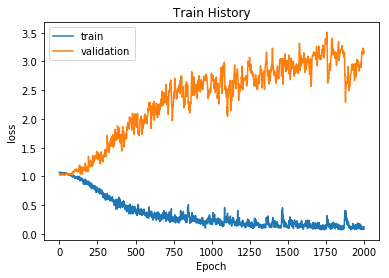

In [448]:
#劃出準確度歷程
import matplotlib.pyplot as plt
def show_tarin_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel("Epoch")
    plt.legend(['train','validation'],loc="upper left")
    plt.show()
show_tarin_history(train_history,'loss','val_loss')
# show_tarin_history(train_history,'loss','loss')

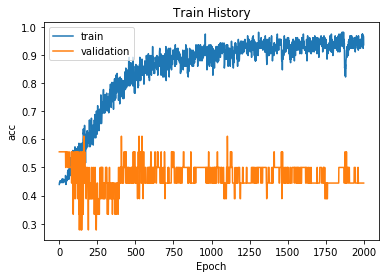

In [449]:
show_tarin_history(train_history,'acc','val_acc')

In [450]:
score=model.evaluate(xx_train,Y_trainO,verbose=1)
print('Train accuracy:',score[1])
score=model.evaluate(xx_test,Y_testO,verbose=1)
print('Test accuracy:',score[1])

175/175 [==============================] - 0s 91us/step
Train accuracy: 0.9142857147966112
75/75 [==============================] - 0s 93us/step
Test accuracy: 0.3866666678587596


In [451]:
list(model.predict_classes(xx_test)==Y_test).count(True)/len(Y_test)

0.38666666666666666

In [452]:
model.predict_classes(xx_test)

array([0, 0, 1, 2, 1, 1, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 1, 1, 2, 0, 2, 0,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 0, 2,
       1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 1, 2, 1, 1, 0, 2, 0, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 0, 1], dtype=int64)